# **House Prices Prediction**


---



 <h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨💻Author: Irfan Ullah Khan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/programmarself)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/programmarself)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/irfan-ullah-khan-4a2871208/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@irfanullahkhan7748)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:programmarself@gmail.com)
[![Website](https://img.shields.io/badge/Website-Contact%20Me-red?style=for-the-badge&logo=website)](https://datasciencetoyou.odoo.com)


![](https://i.imgur.com/3sw1fY9.jpg)

<div class="alert alert-block alert-info" style='color:black;'>
    <h2>Introduction</h2>
   Predicting the selling price of a home is an important topic in real estate. There are several elements that influence the price of a home. Some factors may produce an increase in price, others may cause a fall, and yet others are reliant on one or more factors, i.e. their combination with other factors determines whether they will increase or decrease the price. To assist us in determining the relationship between these attributes and sale prices, we have data from 1460 residences (sold). The dataset covers nearly all of the elements that influence a house's sales price, including overall quality, neighborhood, the presence of a basement and/or garage, and so on, in addition to the sale price.
    The aim is to, perform exploratory data analysis for finding out which factors affect the most. We will be using of multiple
    machine learning algorithms and choose the one which has the highest accuracy. Then training, evaluating and tuning the model with
    appropriate parameter values, we will try to keep the RMSE minimum. I will also create a web application having user frinedly
    interfece where one can easily get the sale price of their house just by giving the different attributes of the house as an input.
</div>

In [13]:
#filtering the warnings to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

# 1. Loading and Exploring Data

In [14]:
import pandas as pd
import numpy as np
#showing max rows
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [15]:
prices_df = pd.read_csv('/content/train.csv')
prices_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [16]:
prices_df.shape

(1460, 81)

Let's explore the columns and data types within the dataset.

In [17]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [93]:
#Statistical Information of the Numeric Columns with Transpose method
prices_df.describe().T

count           mean           std           min  \
Id             1460.0     730.500000    421.610009      1.000000   
MSSubClass     1460.0      56.897260     42.300571     20.000000   
LotFrontage    1201.0       4.207109      0.346228      3.091042   
LotArea        1460.0       9.110966      0.517369      7.170888   
OverallQual    1460.0       6.099315      1.382997      1.000000   
OverallCond    1460.0       5.575342      1.112799      1.000000   
YearBuilt      1460.0       7.586821      0.015389      7.535297   
YearRemodAdd   1460.0       7.593756      0.010424      7.576097   
MasVnrArea     1452.0       2.131946      2.631265      0.000000   
BsmtFinSF1     1460.0       4.229731      2.992052      0.000000   
BsmtFinSF2     1460.0       0.655398      1.845045      0.000000   
BsmtUnfSF      1460.0       5.648378      1.854020      0.000000   
TotalBsmtSF    1460.0       6.750560      1.145712      0.000000   
1stFlrSF       1460.0       7.008452      0.317431      5.814131   
2ndFlrSF       1460.0       2.864586      3.293311      0.000000   
LowQualFinSF   1460.0       0.099814      0.747354      0.000000   
GrLivArea      1460.0       7.268512      0.333303      5.814131   
BsmtFullBath   1460.0       0.425342      0.518911      0.000000   
BsmtHalfBath   1460.0       0.057534      0.238753      0.000000   
FullBath       1460.0       1.565068      0.550916      0.000000   
HalfBath       1460.0       0.382877      0.502885      0.000000   
BedroomAbvGr   1460.0       2.866438      0.815778      0.000000   
KitchenAbvGr   1460.0       1.046575      0.220338      0.000000   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.000000   
Fireplaces     1460.0       0.613014      0.644666      0.000000   
GarageYrBlt    1379.0       7.590525      0.012525      7.550135   
GarageCars     1460.0       1.767123      0.747315      0.000000   
GarageArea     1460.0       5.808156      1.455118      0.000000   
WoodDeckSF     1460.0       2.457206      2.596435      0.000000   
OpenPorchSF    1460.0       2.308541      2.152387      0.000000   
EnclosedPorch  1460.0       0.698019      1.727317      0.000000   
3SsnPorch      1460.0       0.085679      0.666876      0.000000   
ScreenPorch    1460.0       0.410671      1.403194      0.000000   
PoolArea       1460.0       0.030431      0.438685      0.000000   
MiscVal        1460.0       0.233456      1.226030      0.000000   
MoSold         1460.0       6.321918      2.703626      1.000000   
YrSold         1460.0    2007.815753      1.328095   2006.000000   
SalePrice      1460.0  180921.195890  79442.502883  34900.000000   

                         25%            50%            75%            max  
Id                365.750000     730.500000    1095.250000    1460.000000  
MSSubClass         20.000000      50.000000      70.000000     190.000000  
LotFrontage         4.094345       4.248495       4.394449       5.749393  
LotArea             8.929898       9.156887       9.358976      12.279537  
OverallQual         5.000000       6.000000       7.000000      10.000000  
OverallCond         5.000000       5.000000       6.000000       9.000000  
YearBuilt           7.578145       7.587817       7.601402       7.606387  
YearRemodAdd        7.584773       7.598399       7.603399       7.606387  
MasVnrArea          0.000000       0.000000       5.117994       7.378384  
BsmtFinSF1          0.000000       5.951943       6.569832       8.638525  
BsmtFinSF2          0.000000       0.000000       0.000000       7.296413  
BsmtUnfSF           5.411646       6.170651       6.695799       7.756623  
TotalBsmtSF         6.680541       6.900227       7.169542       8.717846  
1stFlrSF            6.783325       6.992096       7.238676       8.453827  
2ndFlrSF            0.000000       0.000000       6.591674       7.633370  
LowQualFinSF        0.000000       0.000000       0.000000       6.350886  
GrLivArea           7.030415       7.289611       7.483104       8.6381

In [19]:
#Statistical Information of the Categorical Columns
prices_df.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

#### Visualizing the dataset

In [20]:
#importing the dependencies for visualization
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#setting the style and background
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Sales Prices

In [98]:
px.histogram(prices_df, x='SalePrice', title='Distribution of Sales Price', color='SaleCondition')

In [22]:
px.histogram(x=np.log(prices_df['SalePrice']), title='Logarithmic Distribution of Sales Price').update_layout(
    xaxis_title="Logarithmic SalePrice")

<div class="alert alert-block alert-info" style='color:black;'>
    Majority of the data points lie in the range of 100k-300k and as we move further the number of expensive properties sold
    decreases. However the logarithmic distribution of sale prices appears to be normal.
</div>

#### Year Built and Year Sold

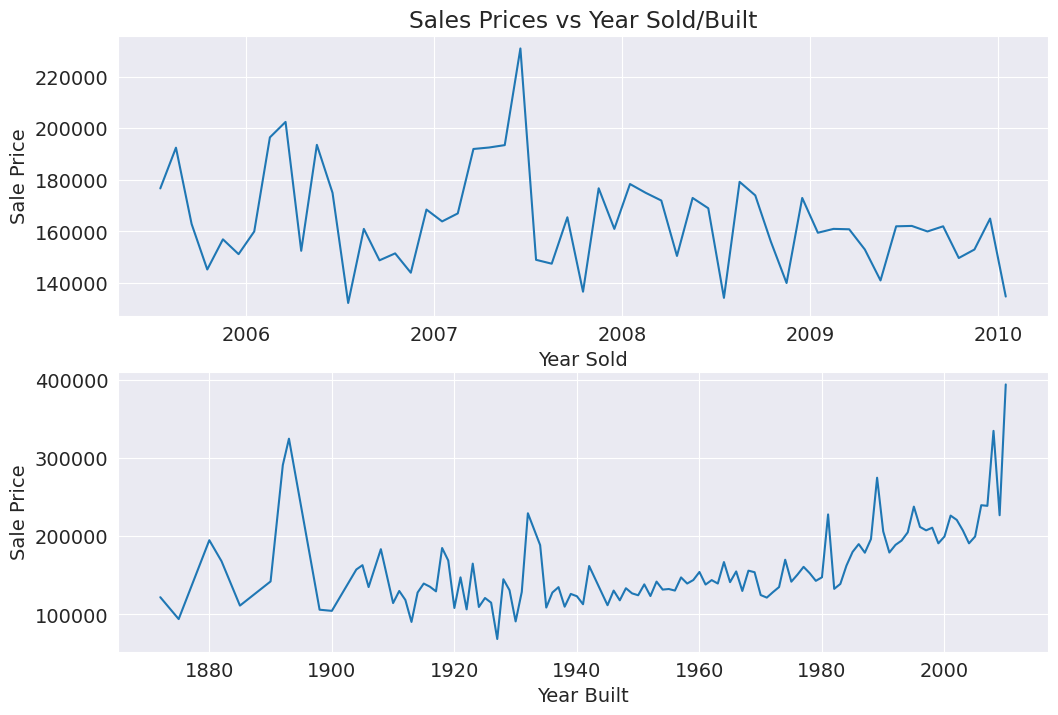

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].set_title('Sales Prices vs Year Sold/Built')

xdmd=prices_df.groupby(['YrSold', 'MoSold'], as_index=False)['SalePrice'].median()
axes[0].plot(xdmd.index, xdmd.SalePrice)
axes[0].set_xlabel('Year Sold')
axes[0].set_ylabel('Sale Price')
axes[0].set_xticks([5.5, 17.5, 29.5, 41.5, 53.5])
axes[0].set_xticklabels([2006, 2007, 2008, 2009, 2010])


xdmdb=prices_df.groupby('YearBuilt')['SalePrice'].median()
axes[1].plot(xdmdb.index,xdmdb)
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Sale Price');

<div class="alert alert-block alert-info" style='color:black;'>
    1. The sales prices are seem to be increasing from the end of the 2006 to till end of the 2007 with the a spike in Dec, 2022. Then
    they show sudden decrease in Jan 2008 and do not show much variation in the prices afterwards. The reasons behind this sudden fall
    were low interest rates, easy credit, insufficient regulation, and toxic subprime mortgages. You can read more about it over here
    : https://financialcomplete.com/why-did-house-prices-fall-in-2008. <br>
    2. After 1925, the sale price appears to be propotional to the year when the house was built i.e. old houses are sold for the
    lesser price than the new houses. The reason behind this could be the condition of houses getting bad over the period of time.
</div>

#### Overall Quality of the Houses

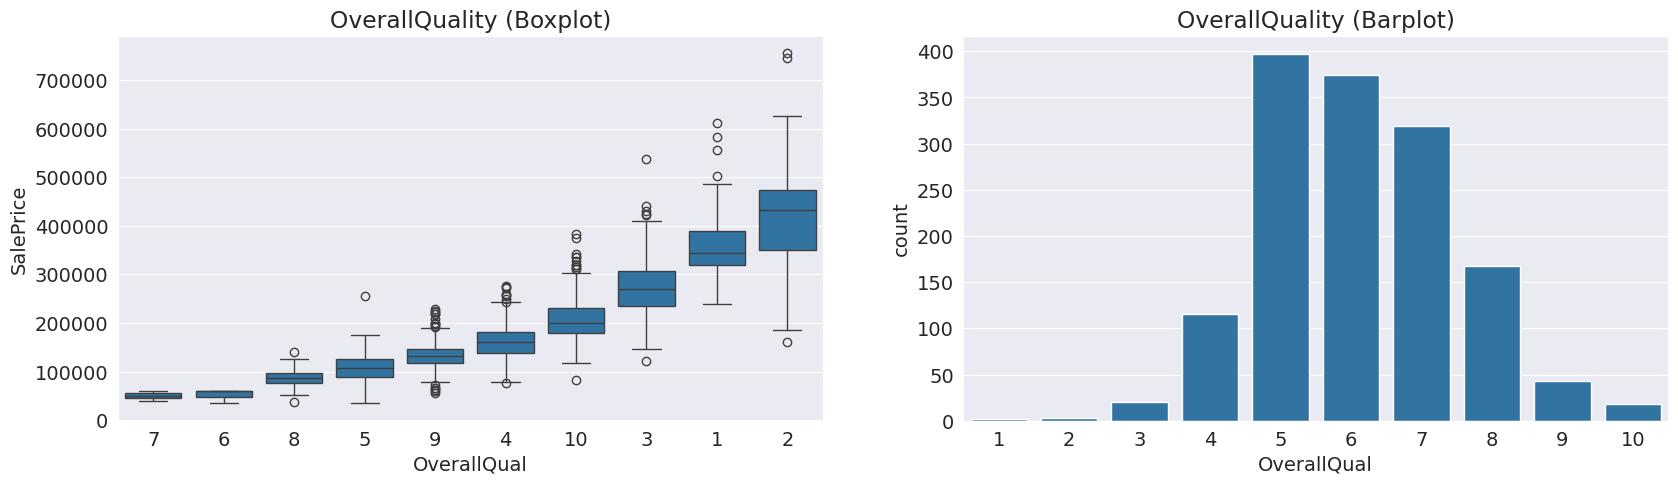

In [24]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('OverallQuality (Boxplot)')
axes[0].set_xticklabels(labels=prices_df['OverallQual'].unique().tolist())
sns.boxplot(y=prices_df['SalePrice'], x=prices_df['OverallQual'], ax=axes[0])
axes[1].set_title('OverallQuality (Barplot)')
sns.countplot(x=prices_df['OverallQual'], ax=axes[1]);

<div class="alert alert-block alert-info" style='color:black;'>
    Sale price is increasing with over all quality which is no surprise. However most houses sold have average (5-6) overall
    condition.
</div>

#### Quality, Condition and Year Built

In [25]:
px.scatter_3d(prices_df, x='OverallQual', y='OverallCond', z='YearBuilt',
              title='Relation between Quality, Condition and Year Built')

<div class="alert alert-block alert-info" style='color:black;'>
    1. The relationship between over all quality and over all condition isn't linear (as someone might expect). It appears that houses
    can be in good condition even though their over all quality is poor.<br>
    2. The over all quality of house built between 1900 to 1960, falls below average whereas it's above average for houses built after
    1960. And it's average for houses built before 1900.<br>
    3. The houses having over all condition below average were mostly built between 1900-1980.
</div>

#### Overall Condition of the Houses

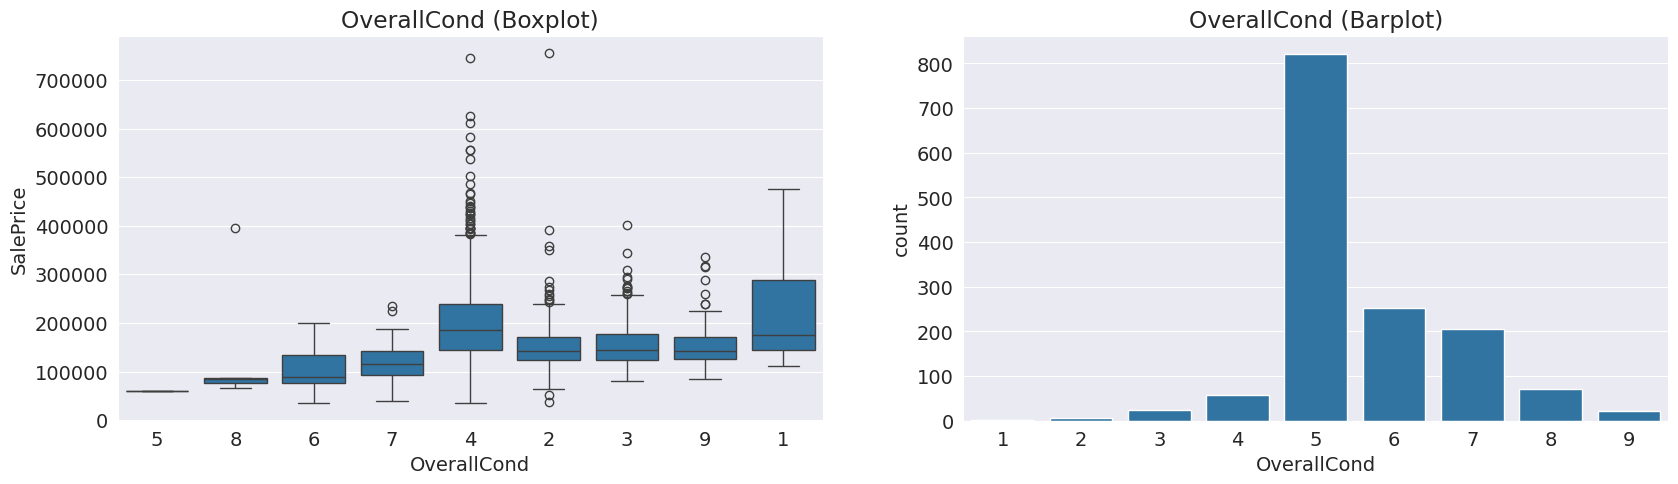

In [26]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('OverallCond (Boxplot)')
axes[0].set_xticklabels(labels=prices_df['OverallCond'].unique().tolist())
sns.boxplot(y=prices_df['SalePrice'], x=prices_df['OverallCond'], ax=axes[0])
axes[1].set_title('OverallCond (Barplot)')
sns.countplot(x=prices_df['OverallCond'], ax=axes[1]);

<div class="alert alert-block alert-info" style='color:black;'>
    It doesn't show linear increment in sale price with the over all condtion as we have already seen that good condition doesn't
    imply good quality (and this is the reason sales price isn't significantly increasing with overall condition rating getting
    increased from 6 to 7 till 8).  The above graphs shows large variation in the sale price of the houses having average over all
    condition and also number of houses sold in that category are larger.
</div>

#### Streets and Allies

In [27]:
xdf=prices_df.groupby(['Street','Alley','MSZoning','Neighborhood'], as_index=False, dropna=False)['Id'].count()
xdf.fillna('NA', inplace=True)
xdf.rename(columns={'Id':'Number of Houses'}, inplace=True)
px.sunburst(xdf,path=['Street','Alley','MSZoning','Neighborhood'], values='Number of Houses', color='Number of Houses')

<div class="alert alert-block alert-info" style='color:black;'>
    The above sunburst classifies the number of houses based on the `Street, Alley, MSZoning` and `Neighbourhood`. We can draw mainly
    two conclusions from this.<br>
    1. Almost all the streets are `Paved`(only six are `Gravel`) <br>
    2. Majority of the houses don't have alley access (indicated by `NA`)
</div>

#### Neighbourhood

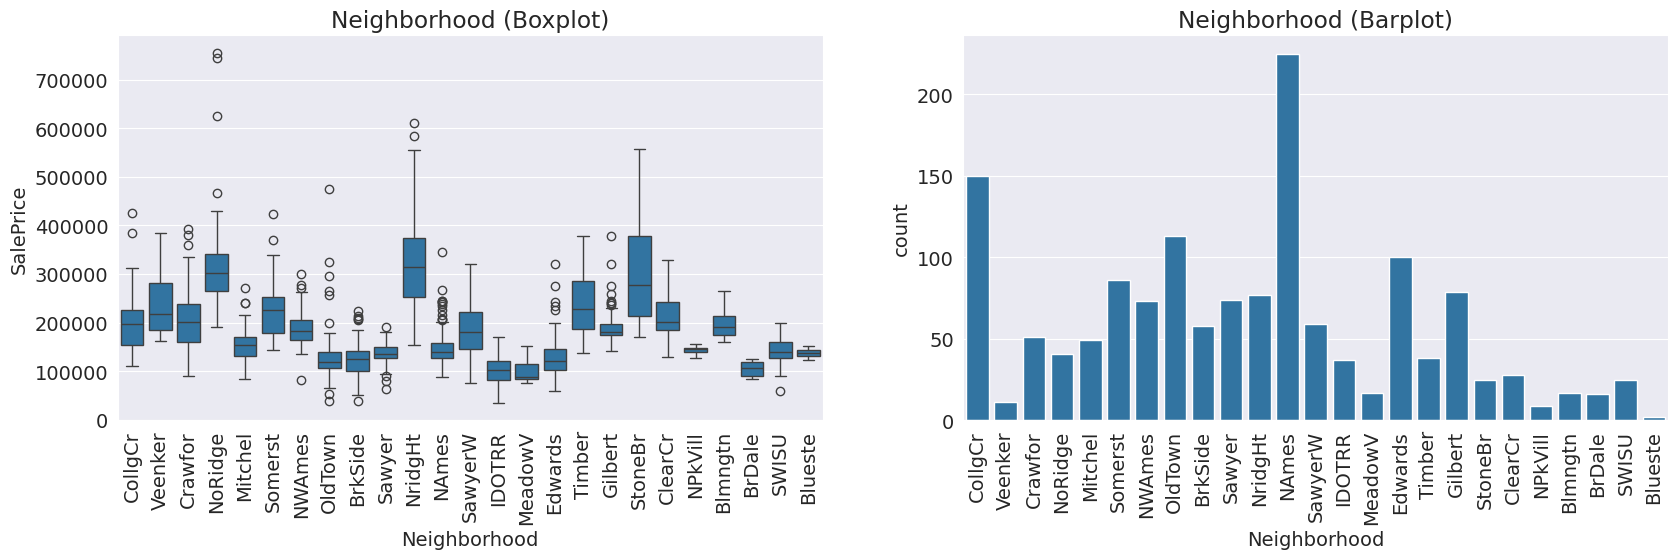

In [28]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('Neighborhood (Boxplot)')
axes[0].set_xticklabels(labels=prices_df['Neighborhood'].unique().tolist(),rotation=90)
sns.boxplot(y=prices_df['SalePrice'], x=prices_df['Neighborhood'], ax=axes[0])
axes[1].set_title('Neighborhood (Barplot)')
sns.countplot(x=prices_df['Neighborhood'], ax=axes[1])
plt.xticks(rotation=90);

<div class="alert alert-block alert-info" style='color:black;'>
    The houses from neighbourhoods `NridgHt (Northridge Heights)` and `StoneBr (Stone Brook)` show large variation in the `SalePrice`.
    The `SalePrice` is in the `NoRidge (Northridge)` neighbourhood. However the maximum numbers of houses are sold in `NAmes (North
    Ames)` neighbourhood followed by `CollgCr (College Creek)` and the least number of houses are sold in `Blueste (Bluestem)`
    followed by `NPkVill (Northpark Villa)`. You may notice that the sale prices from `NAmes` neighbourhood do not vary much and are
    below average that could be the reason they are among the most sold houses.
</div>

##### Let's explore the North Ames neighbourhood some more

In [29]:
NAmes_df=prices_df[prices_df['Neighborhood']=='NAmes']
NAmes_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
26         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
28         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
14       Norm     1Fam     1Story            6            5       1960   
16       Norm     1Fam     1Story            6            7       1970   
19       Norm     1Fam     1Story            5            6       1958   
26       Norm     1Fam     1Story            5            7       1951   
28       Norm     1Fam     1Story            5            6       1957   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
14          1960       Hip  CompShg     MetalSd     MetalSd    BrkFace   
16          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
19          1965       Hip  CompShg     BrkFace     Plywood       None   
26          2000     Gable  CompShg     Wd Sdng     Wd Sdng       None   
28          1997     Gable  CompShg     MetalSd     MetalSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
14       212.0        TA        TA     CBlock       TA       TA           No   
16       180.0        TA        TA     CBlock       TA       TA           No   
19         0.0        TA        TA     CBlock       TA       TA           No   
26         0.0        TA        TA     CBlock       TA       TA           Mn   
28         0.0        TA        TA     CBlock       TA       TA           Gd   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
14          BLQ         733          Unf           0        520         1253   
16          ALQ         578          Unf           0        426         1004   
19          LwQ         504          Unf           0        525         1029   
26          BLQ         234          Rec         486        180          900   
28          BLQ        1277          Unf           0        207         1484   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
14    GasA        TA          Y      SBrkr      1253         0             0   
16    GasA        Ex          Y      SBrkr      1004         0             0   
19    GasA        TA          Y      SBrkr      1339         0             0   
26    GasA        TA          Y      SBrkr       900         0             0   
28    GasA        TA          Y      SBrkr      1600         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
14       1253             1             0         1         1             2   
16       1004             1             0         1         0             2   
19       1339             0             0         1         0             3   
26        900             0             1         1         0             3   
28       1600             1             0         1         0             2   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
14             1          TA             5        Typ           1          Fa   
16             1          TA             5        Typ           1          TA   
19             1          TA             6       Min1           0    

In [30]:
NAmes_df['SalePrice'].median(), prices_df['SalePrice'].median()

(140000.0, 163000.0)

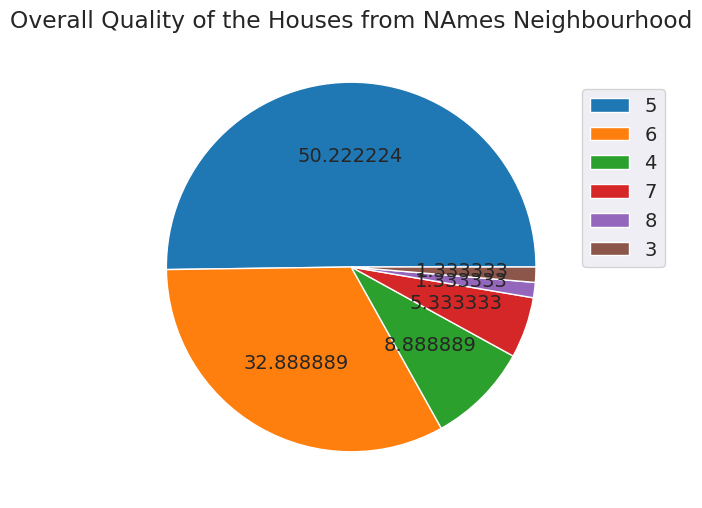

In [31]:
NAmes_OverallQual=NAmes_df['OverallQual'].value_counts()/len(NAmes_df['OverallQual'])
plt.pie(NAmes_OverallQual, autopct='%f')
plt.legend(NAmes_OverallQual.index, loc=(1,0.5))
plt.title('Overall Quality of the Houses from NAmes Neighbourhood');

<div class="alert alert-block alert-info" style='color:black;'>
    See that the average sale price in the `NAmes` neighbourhood is below average of the whole dataset. Most of the houses (nearly
    82%) have average(5-6) overall quality that's what makes them affordable.
</div>

##### We can similiary use loop through all the other categorical variables and discrete variables to obtain their relationship with `SalePrice` using boxplot.

In [32]:
discrete = ['MSSubClass','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'MoSold','YrSold']
categorical=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition1', 'Condition2','HouseStyle', 'RoofStyle',
 'RoofMatl', 'Exterior1st', 'Exterior2nd','BldgType','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

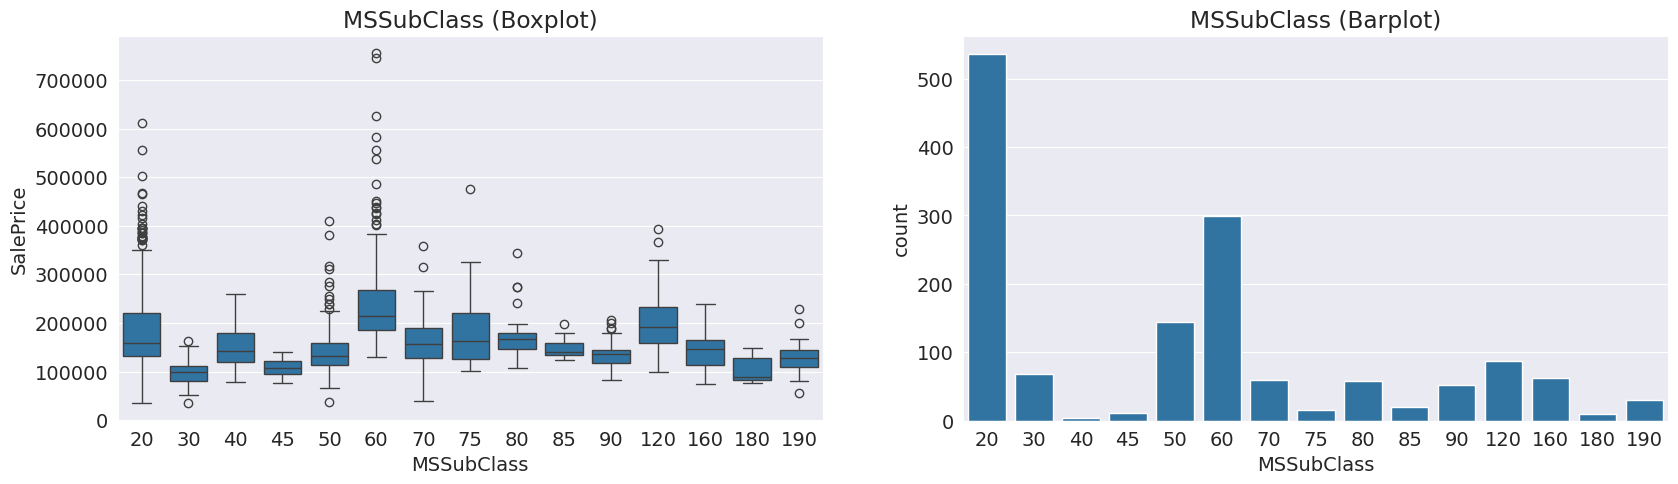

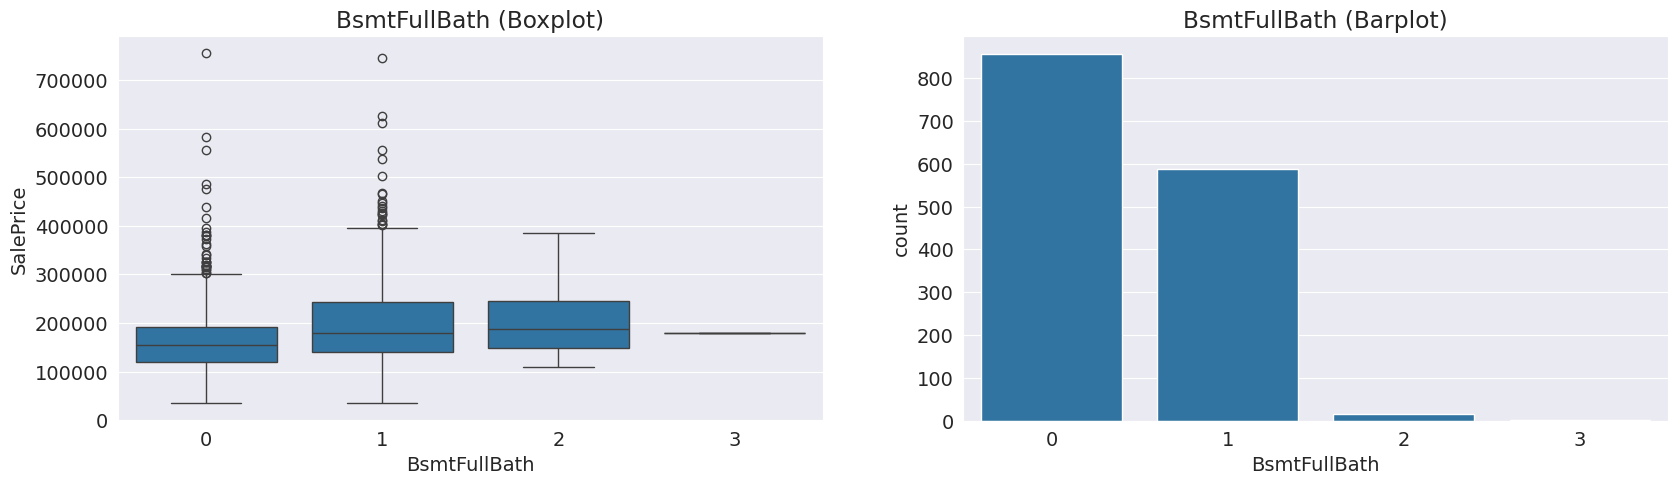

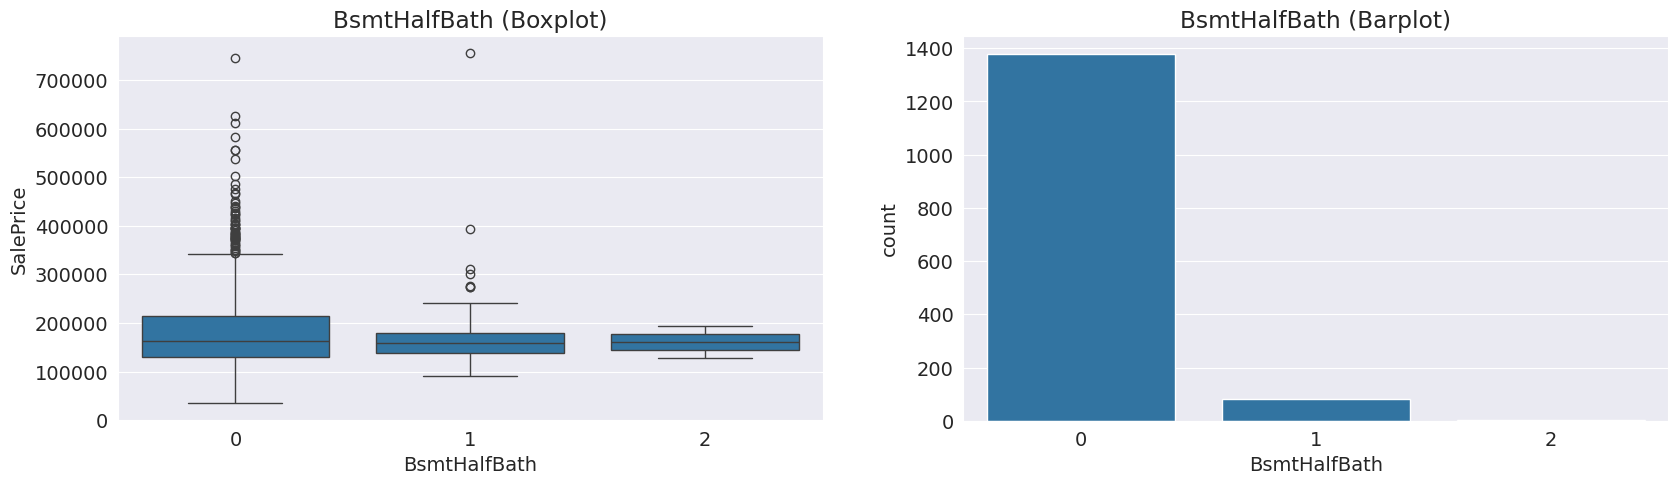

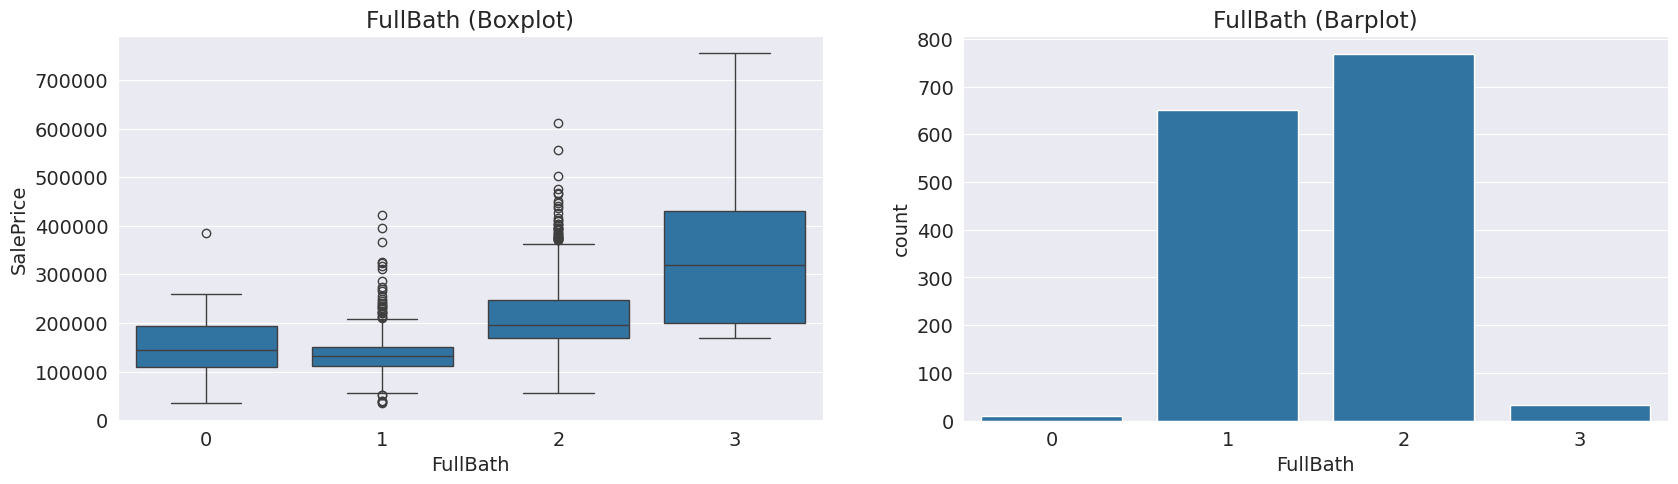

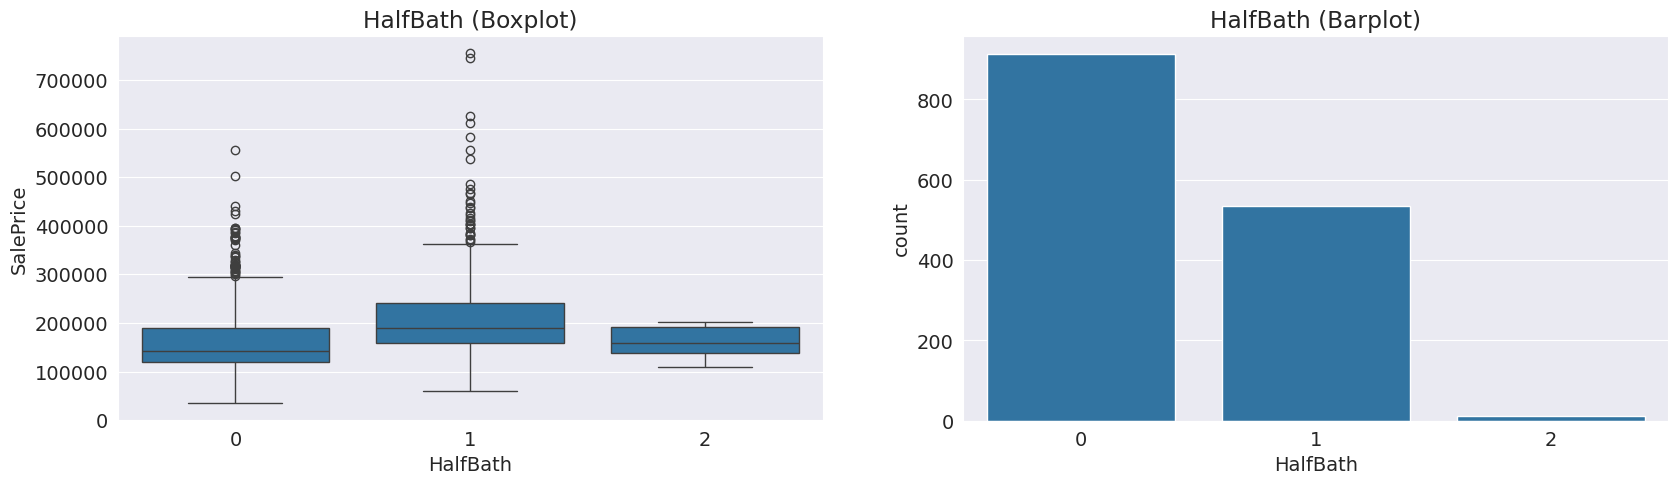

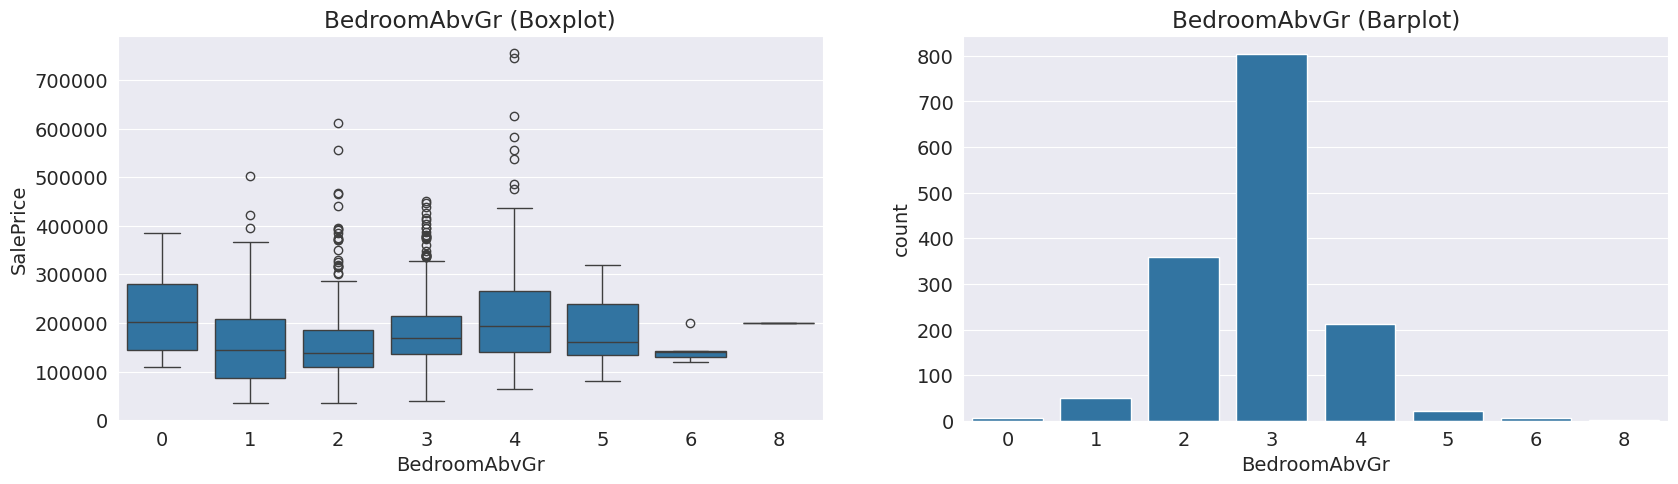

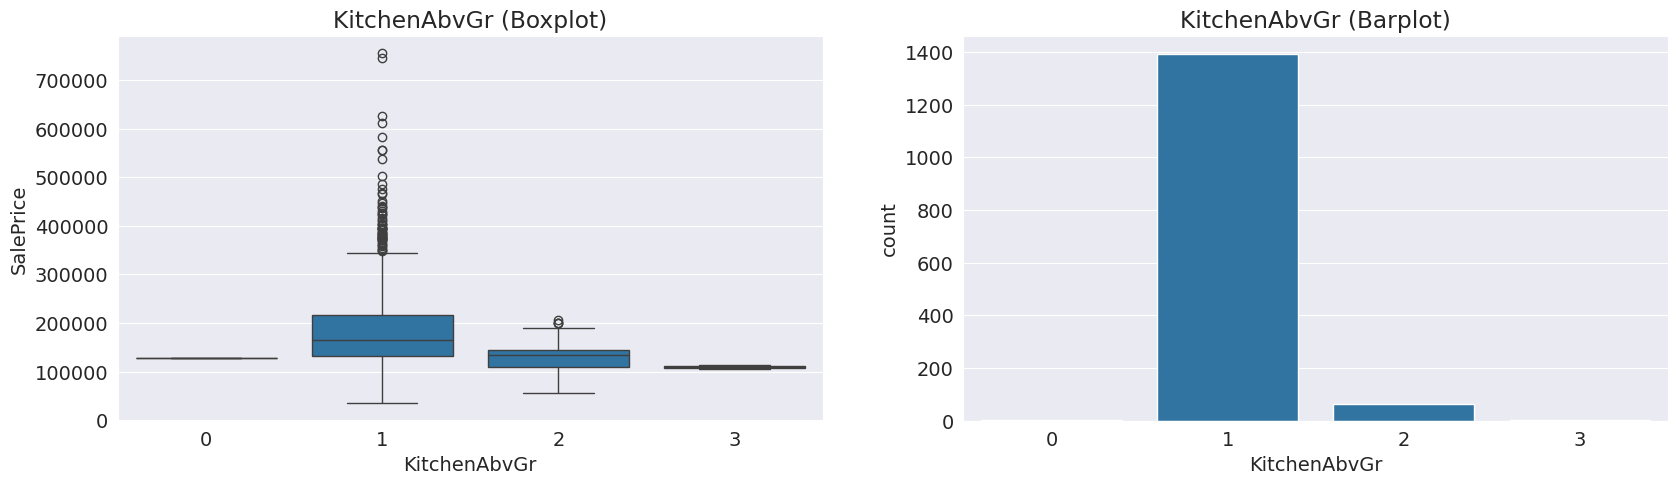

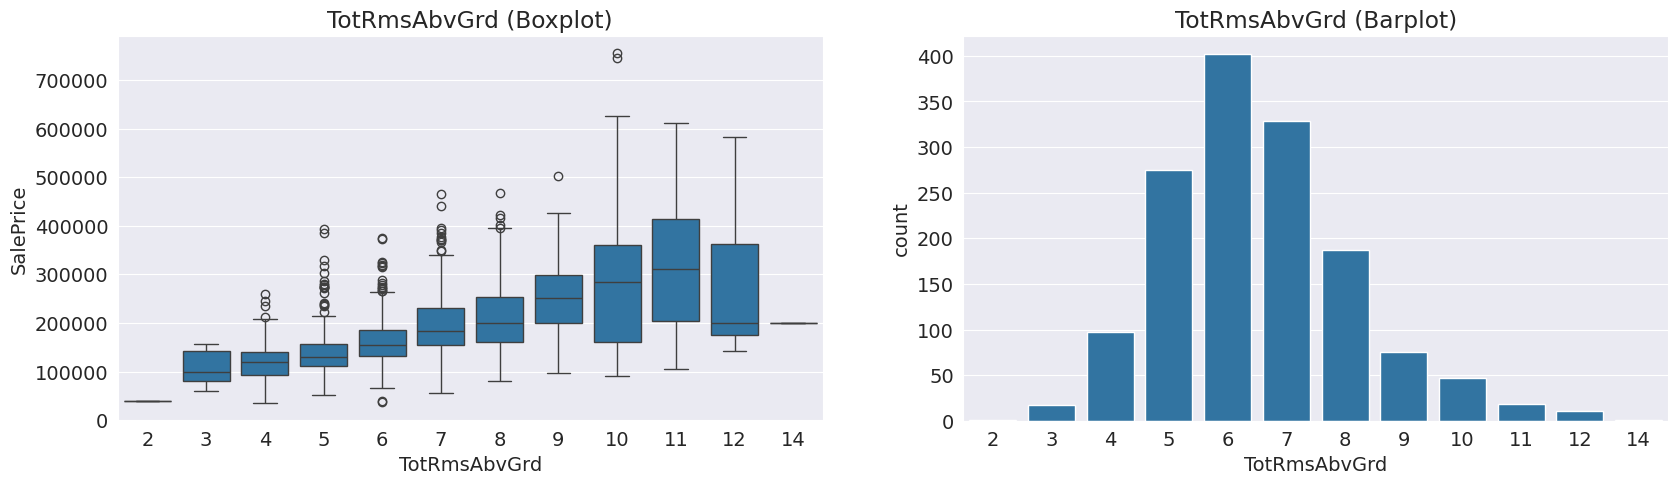

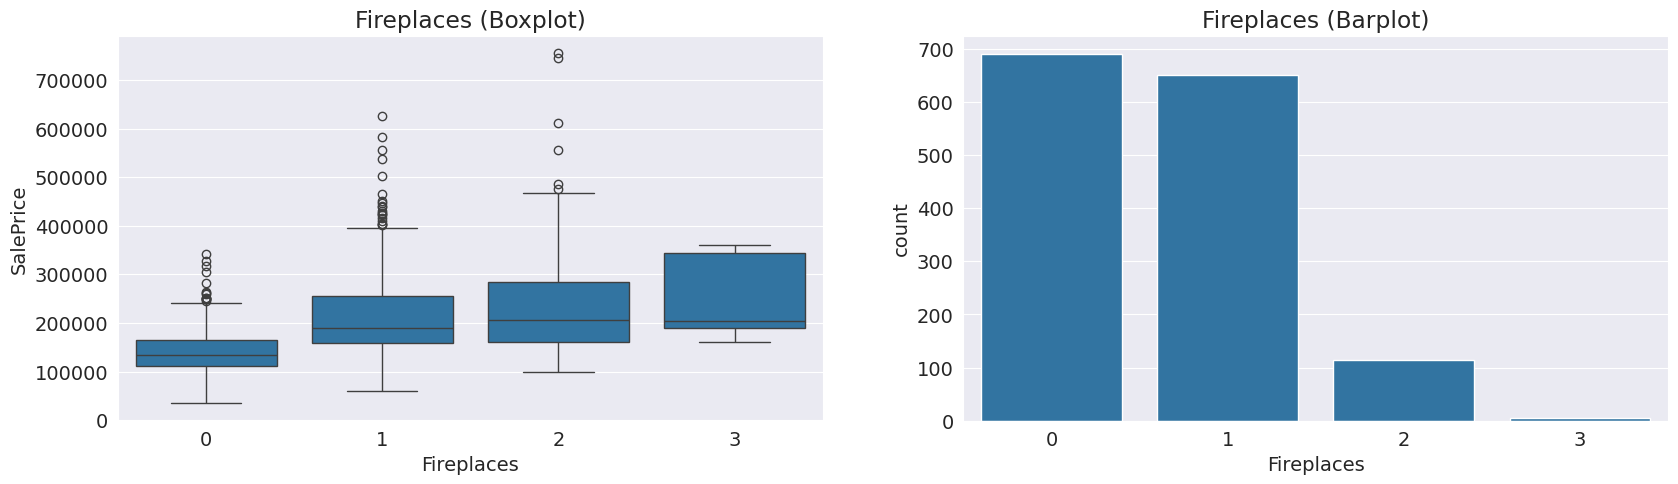

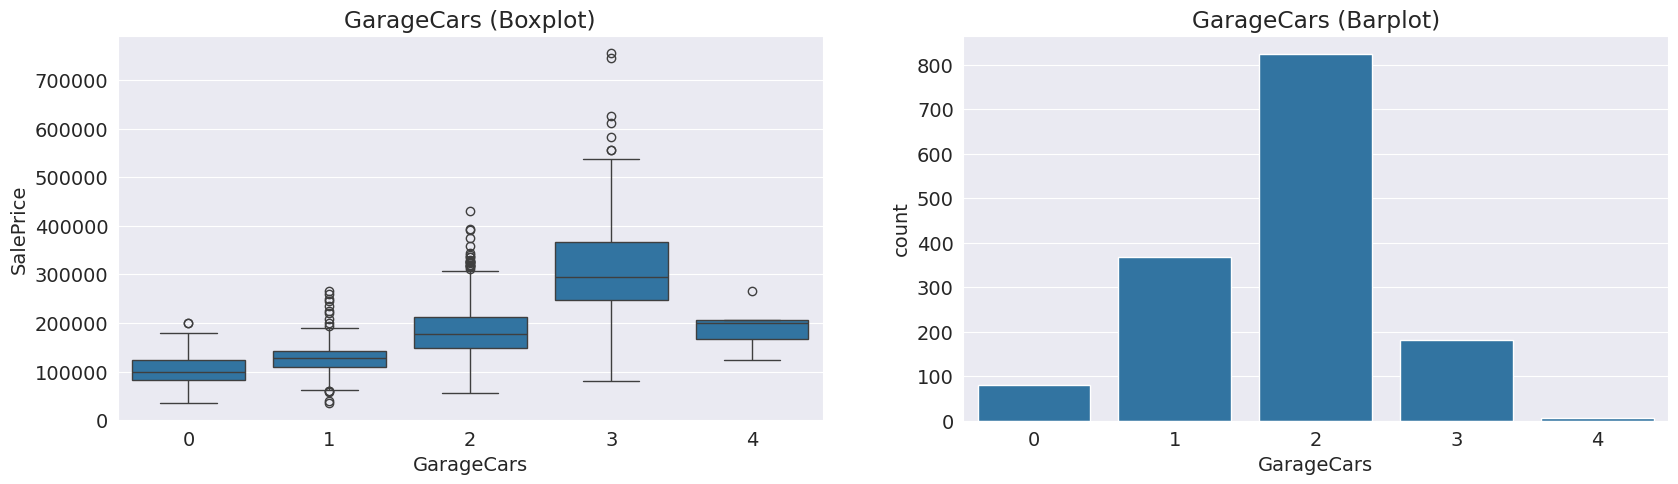

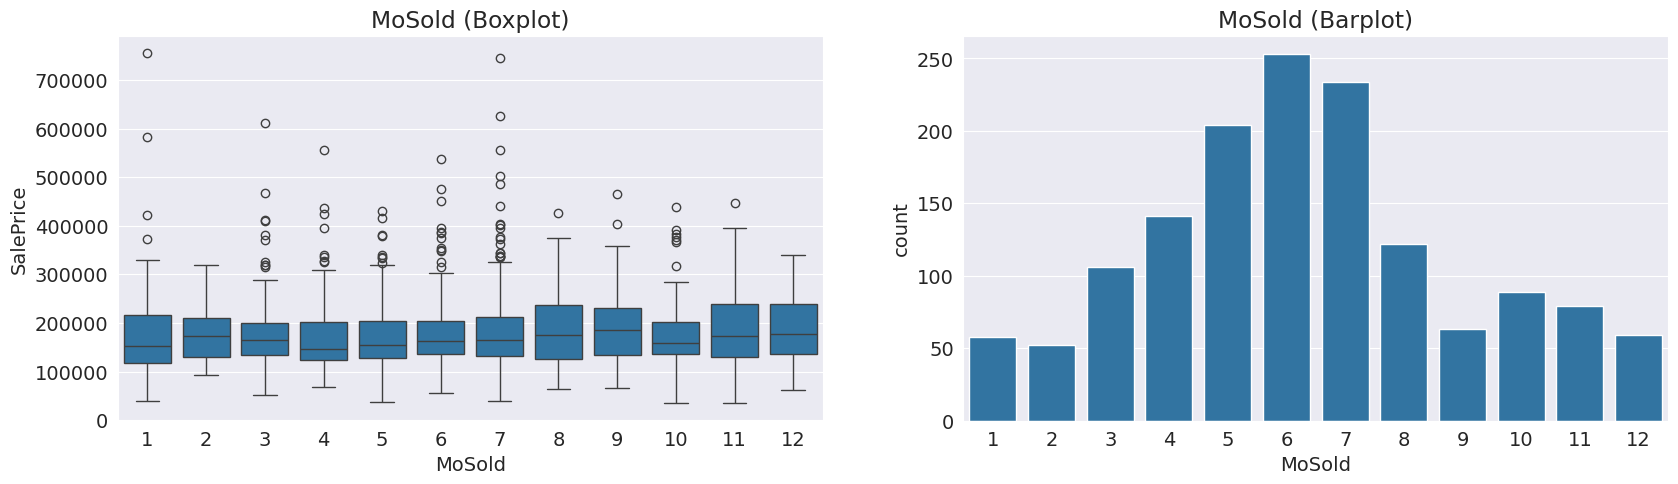

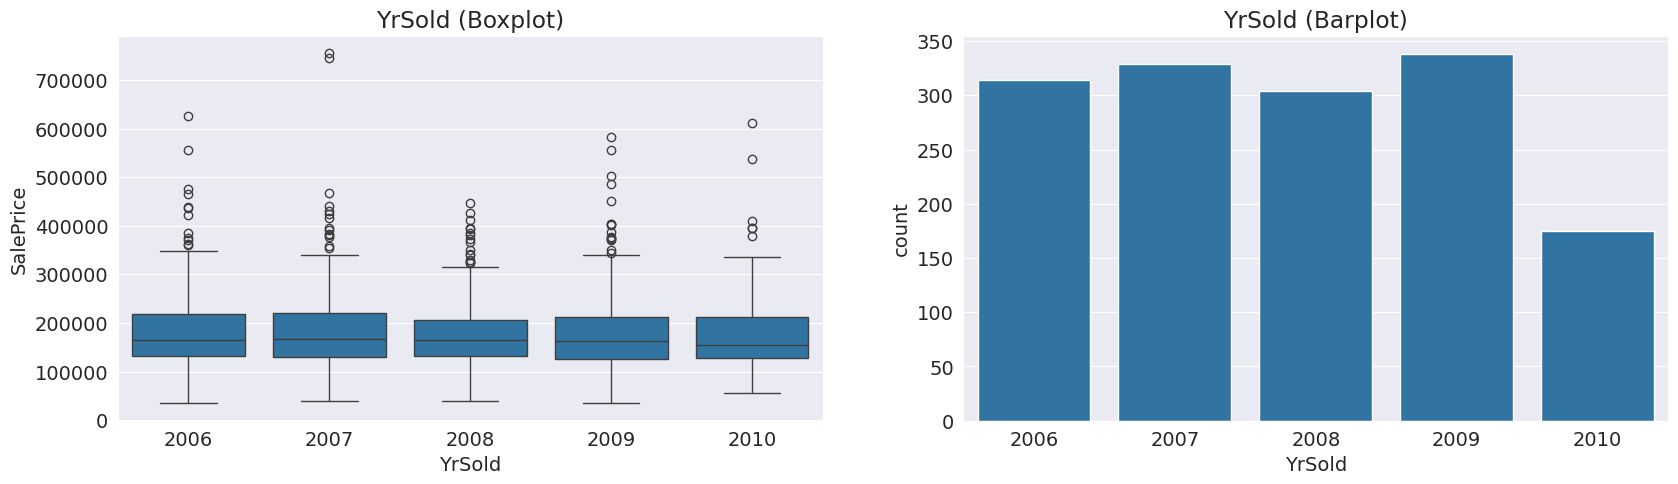

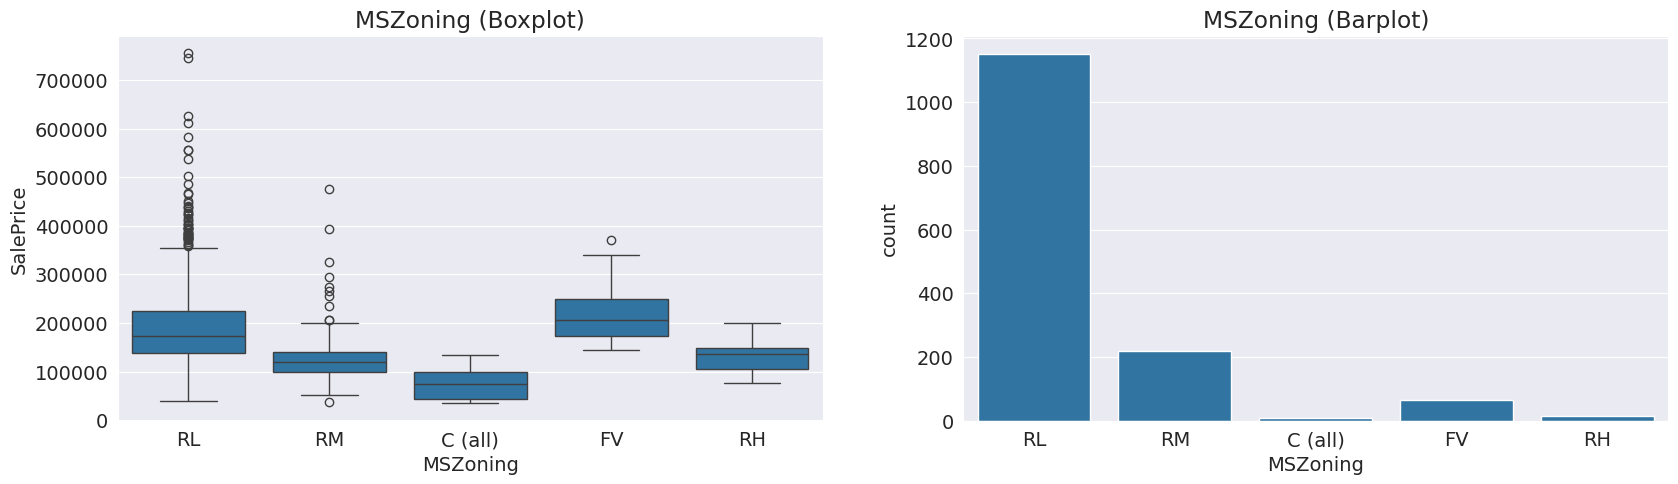

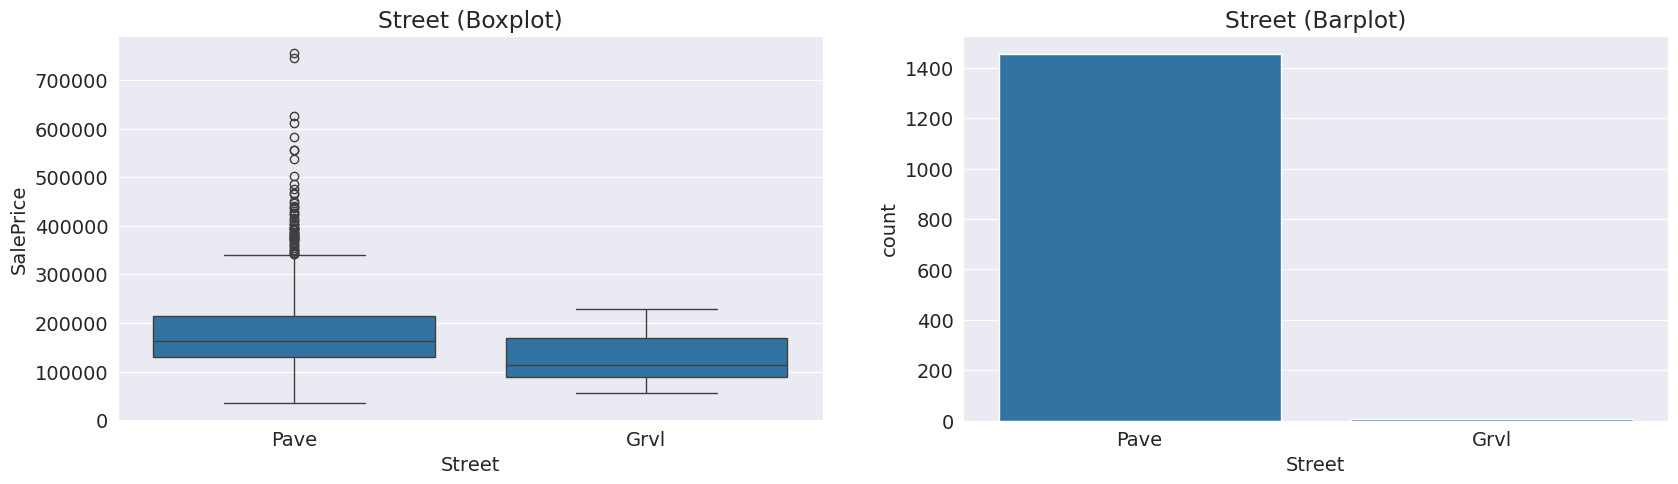

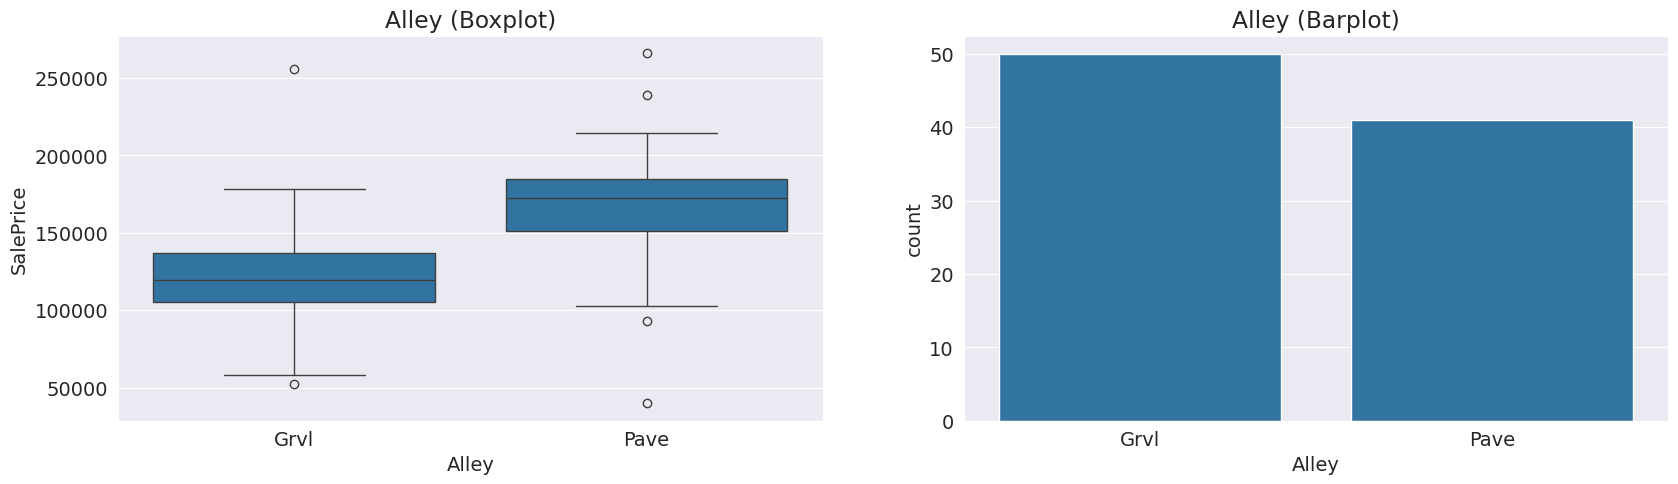

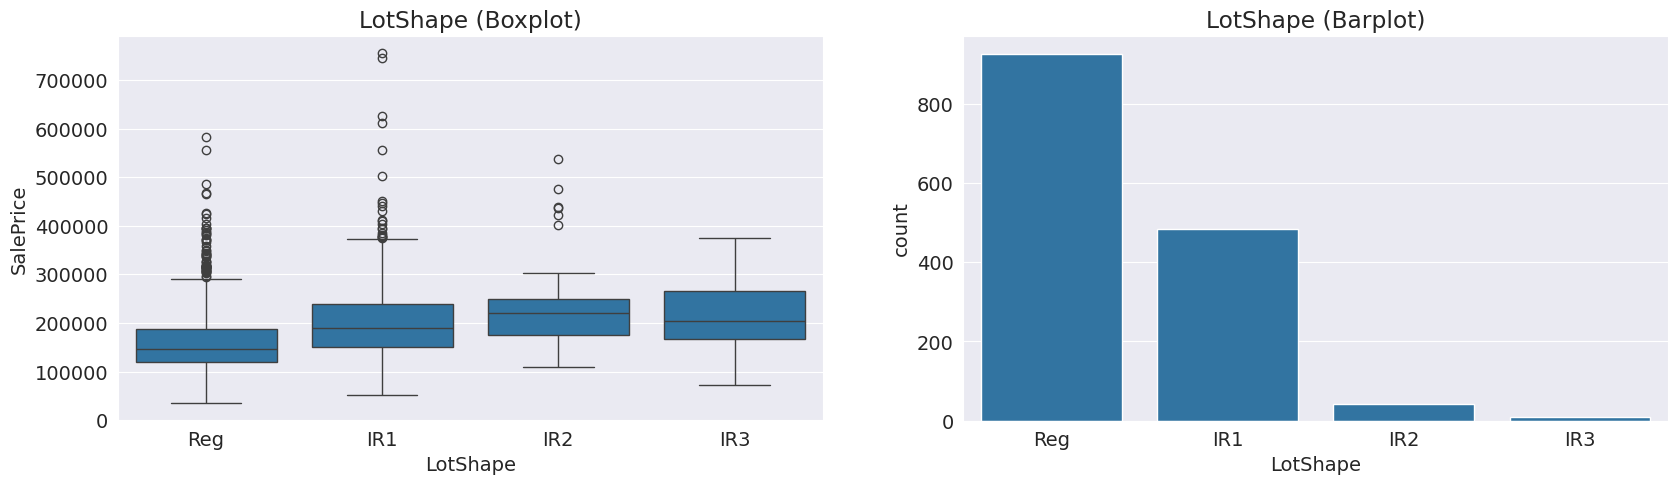

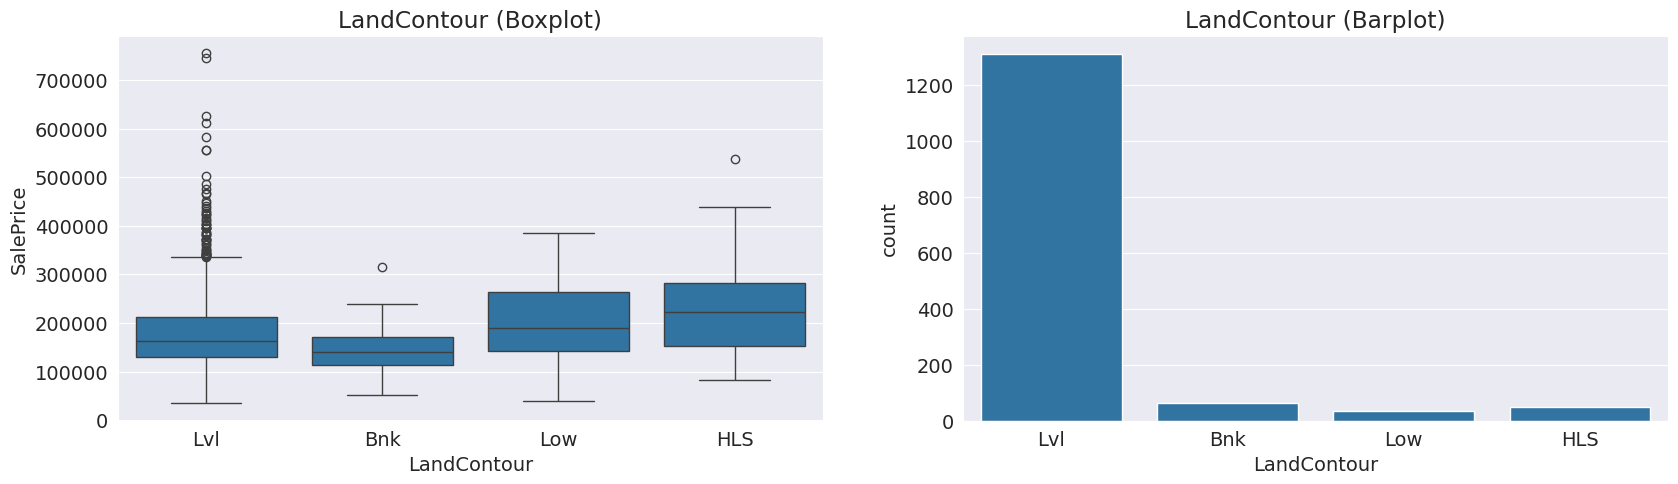

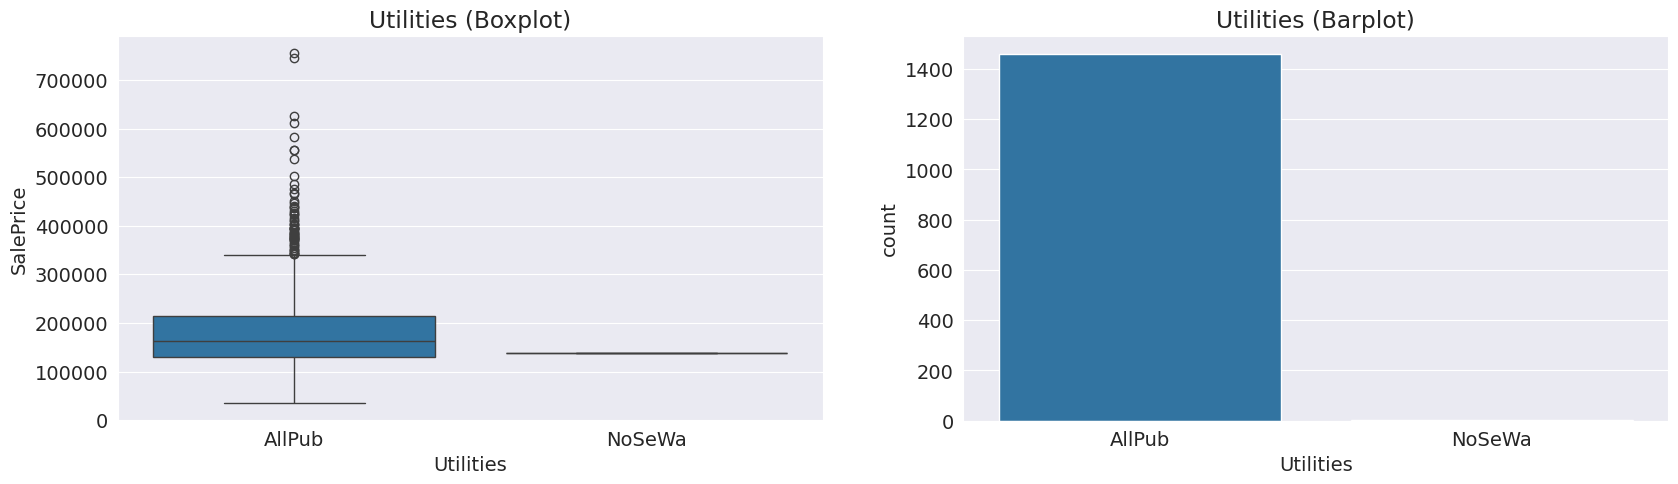

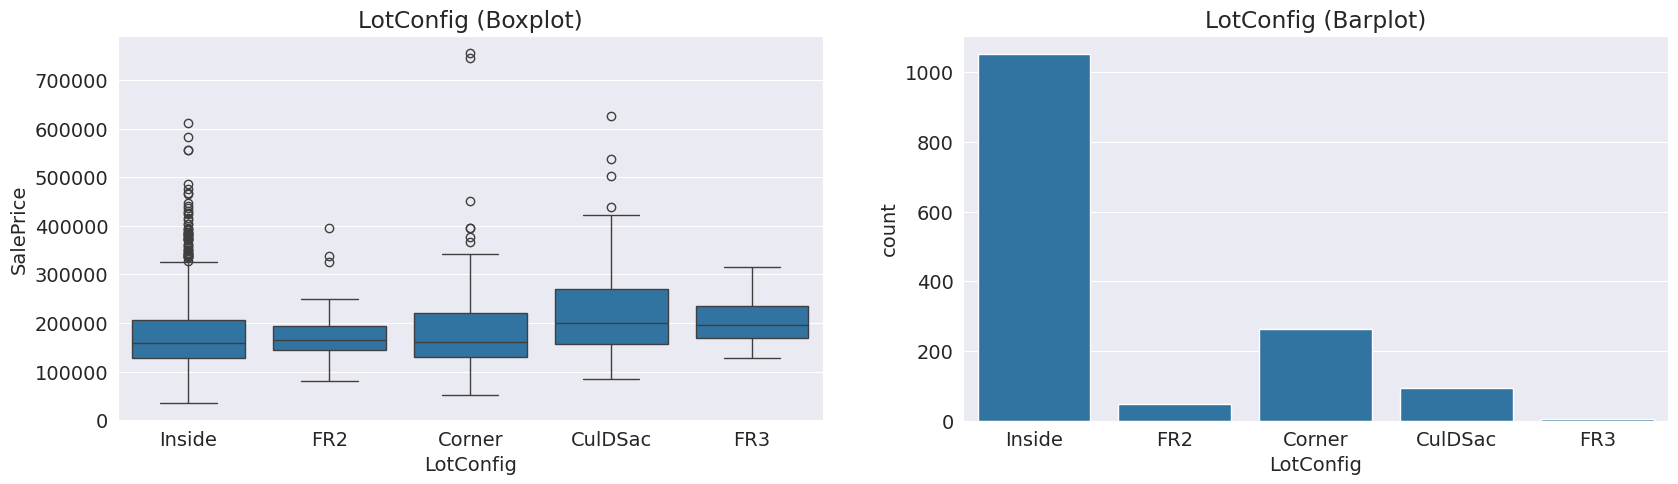

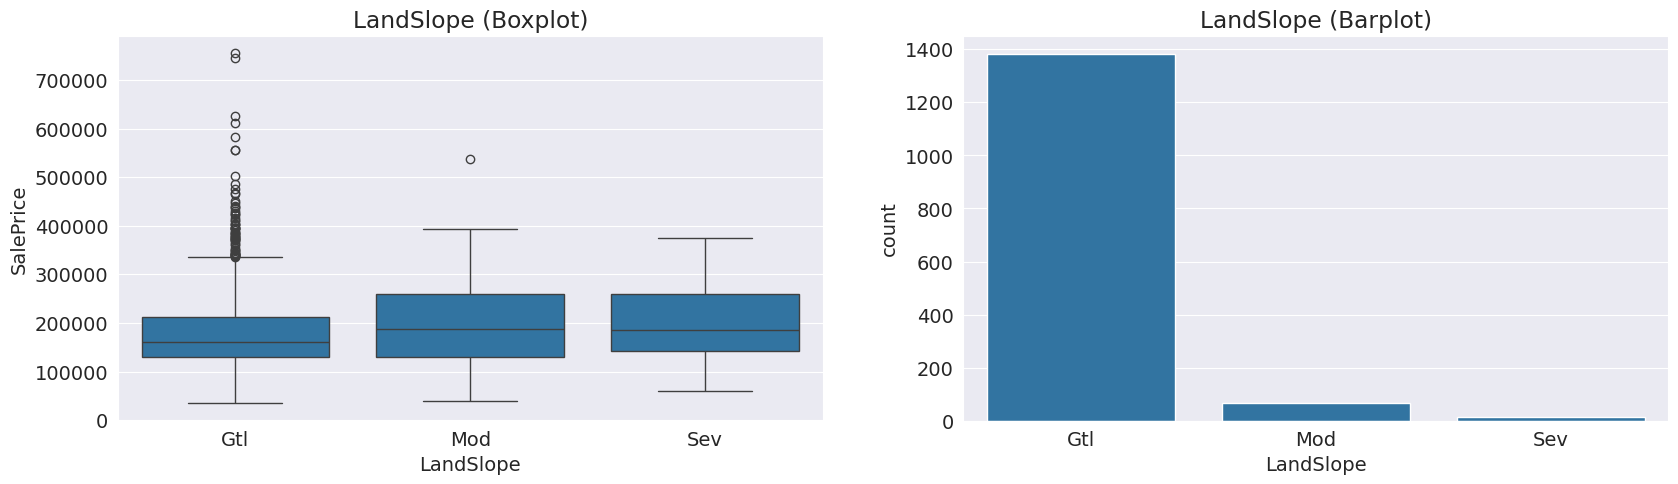

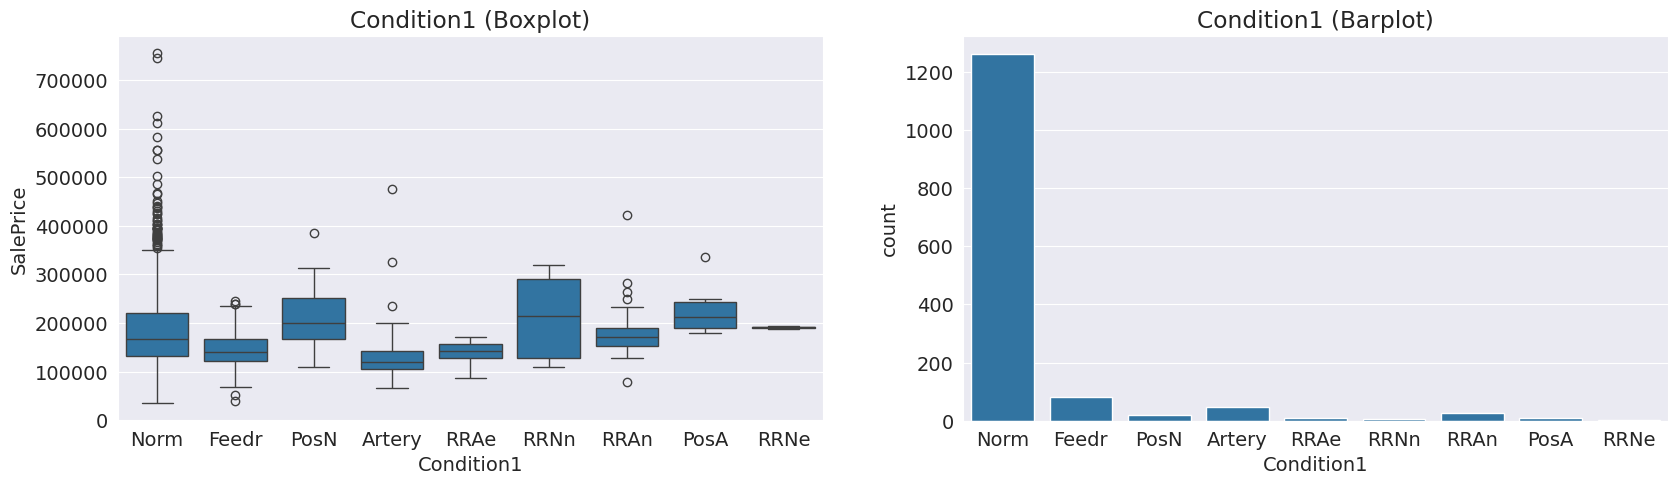

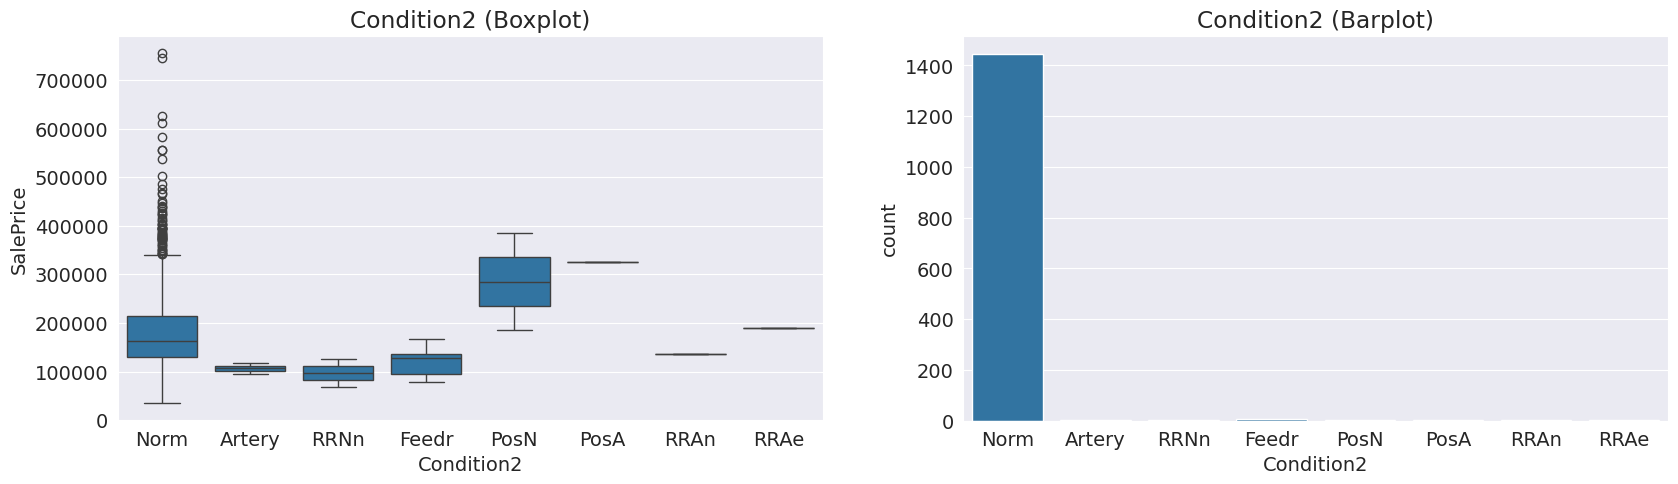

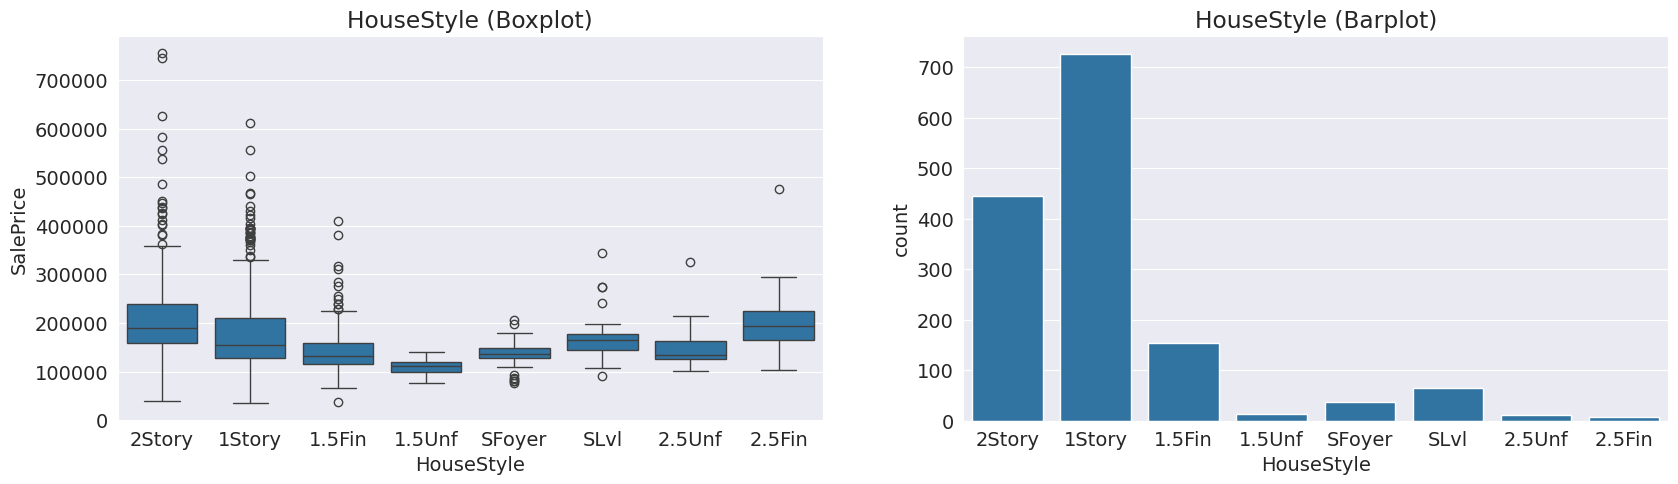

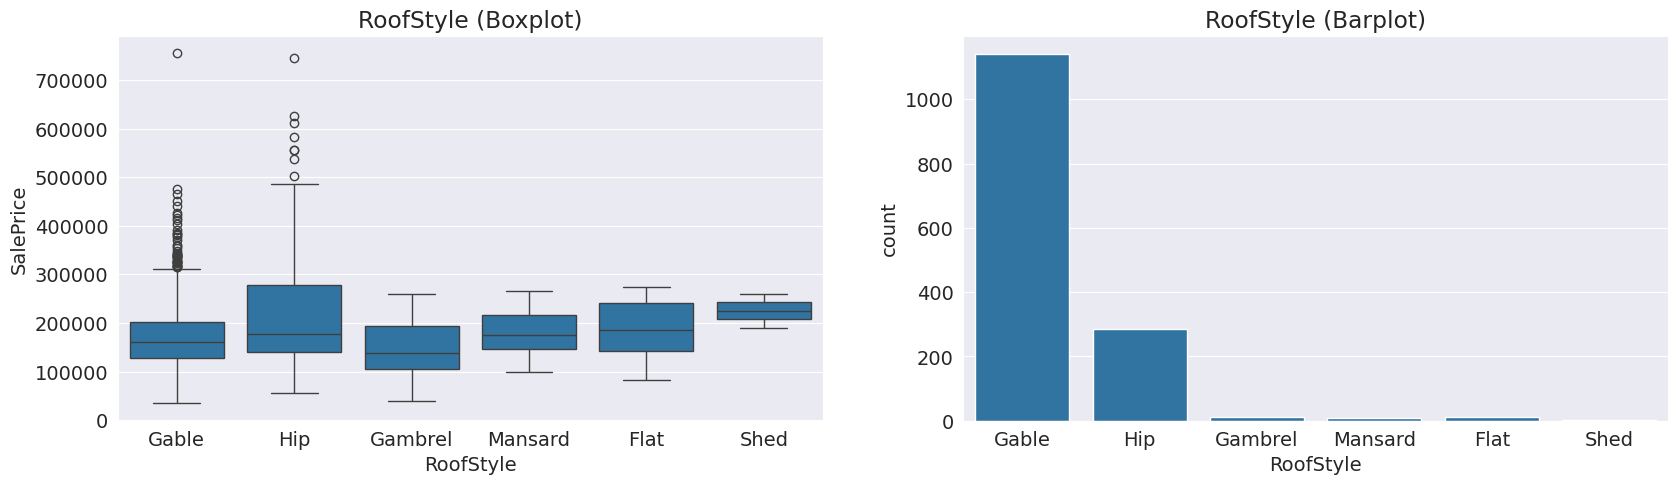

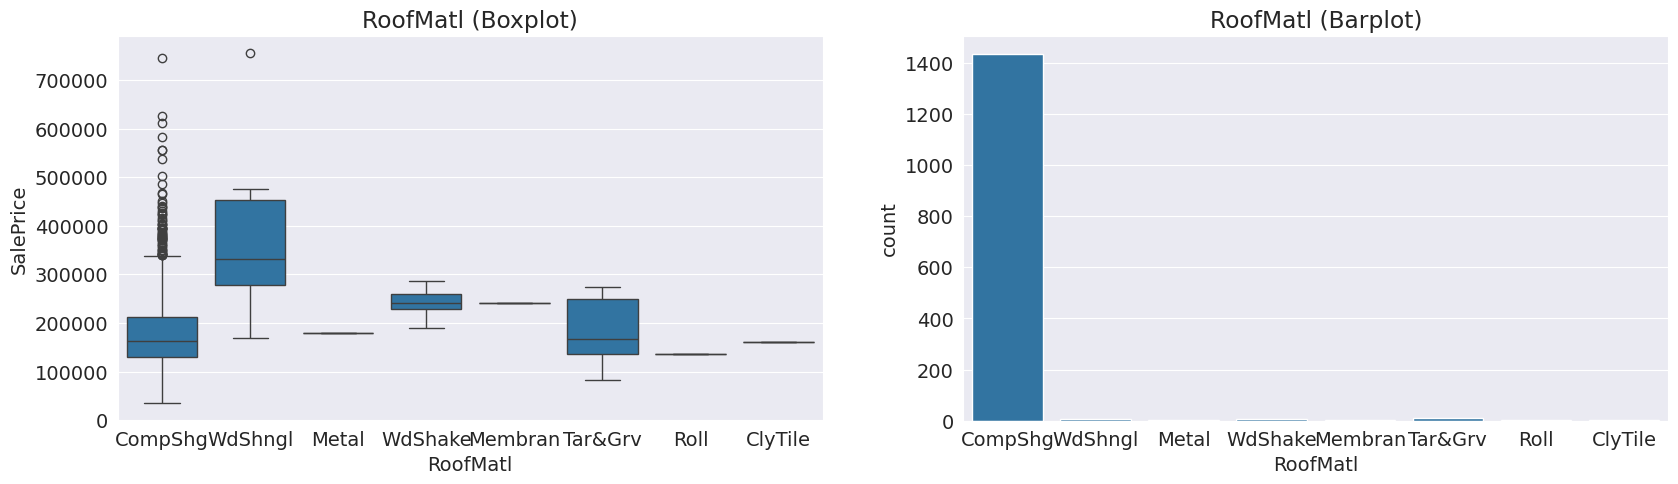

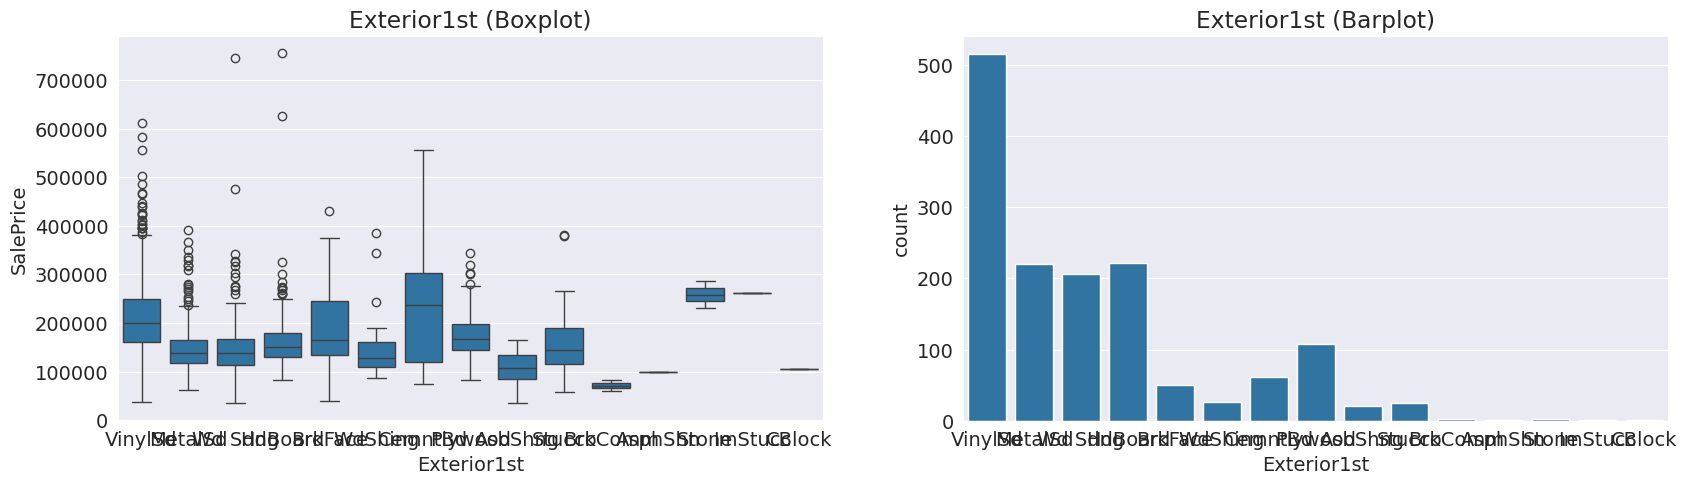

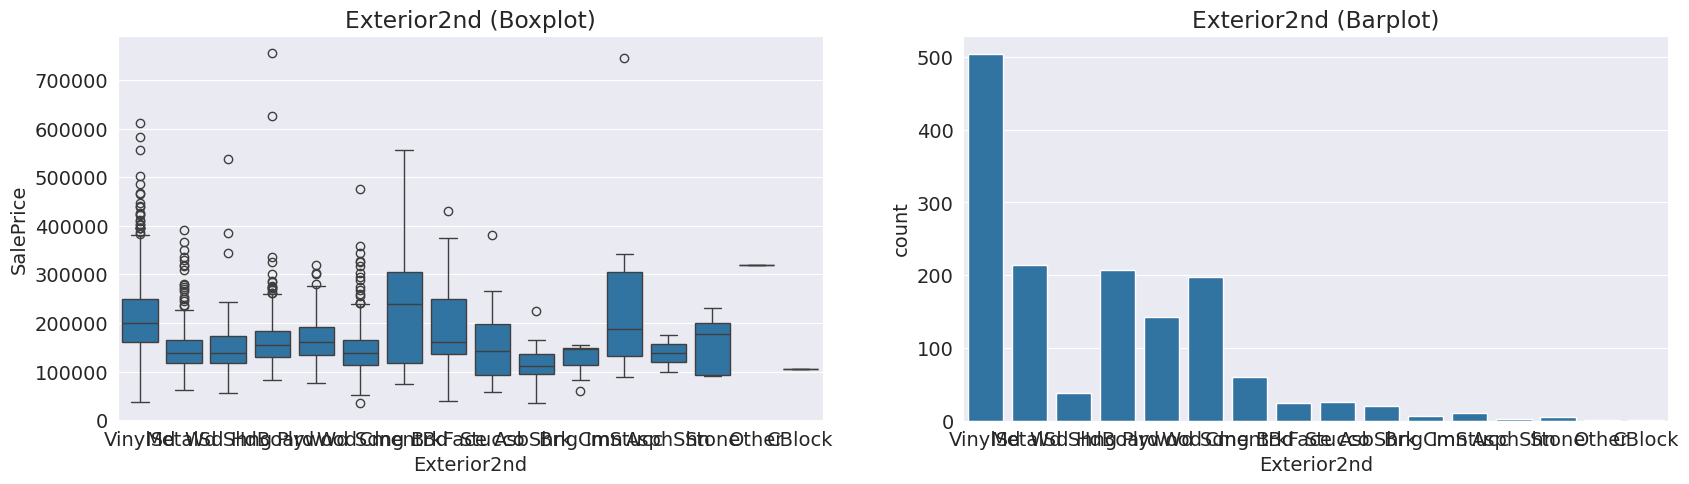

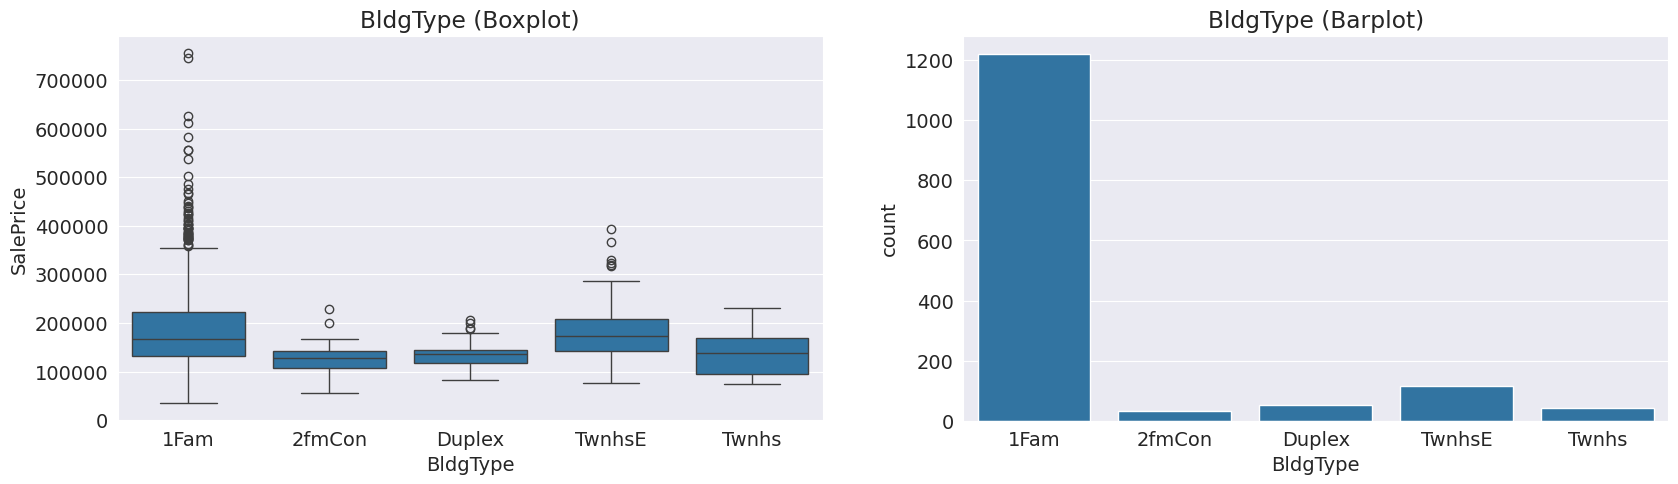

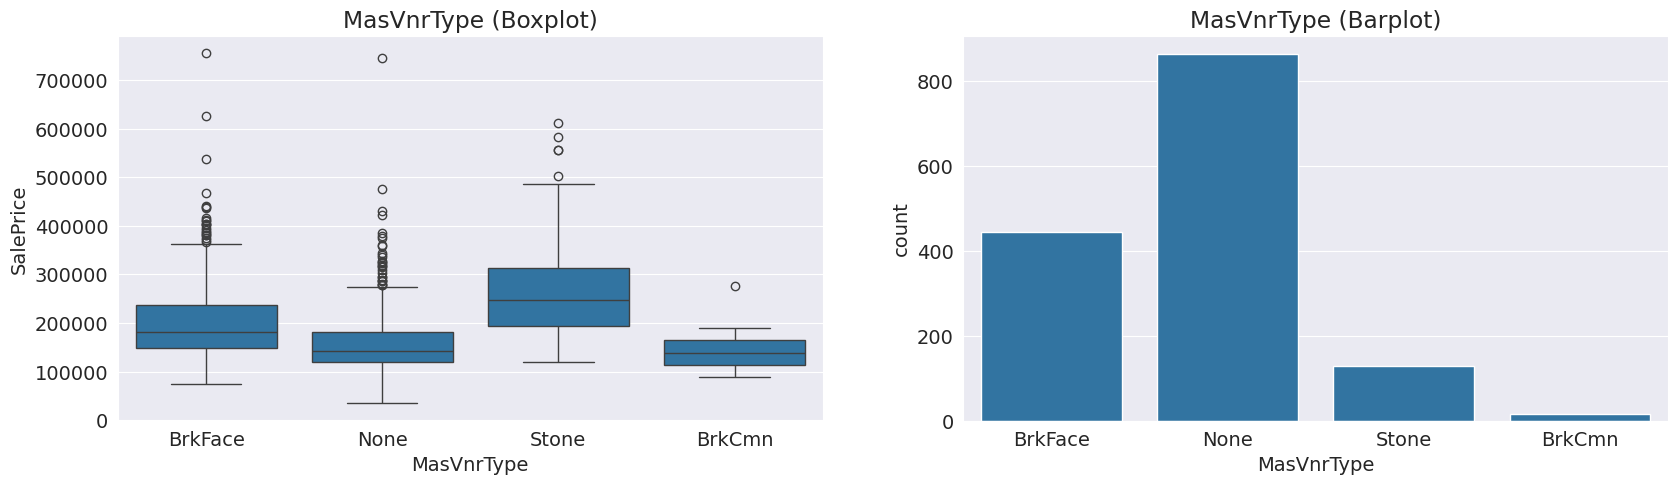

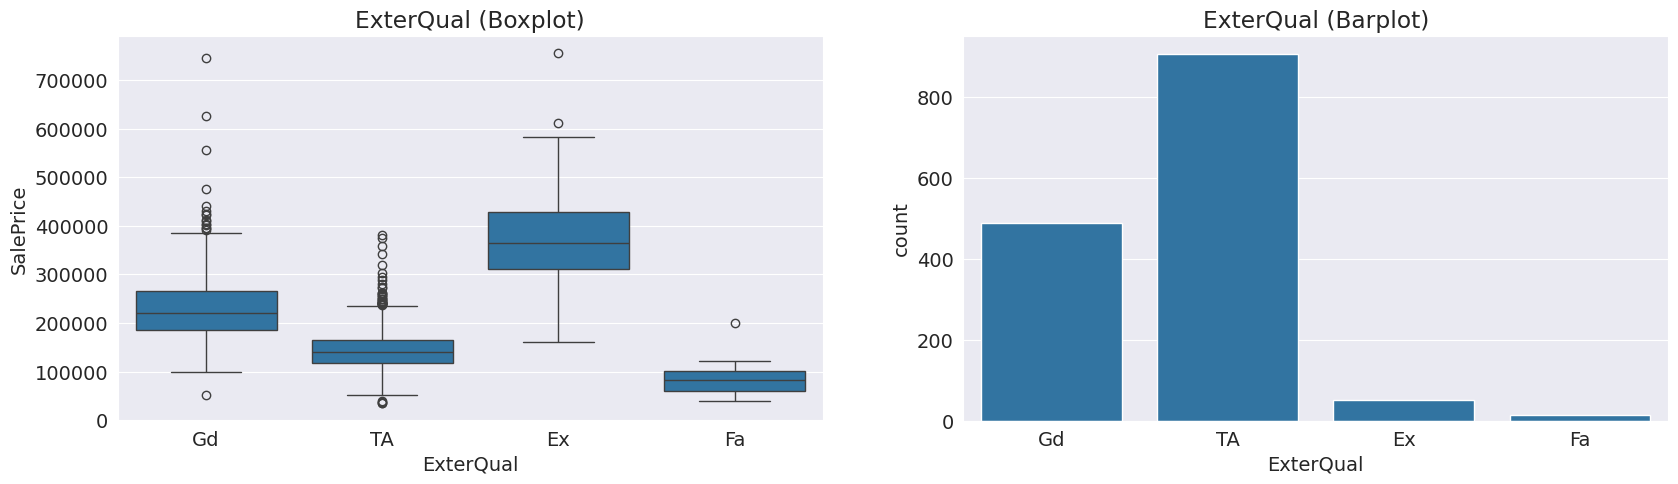

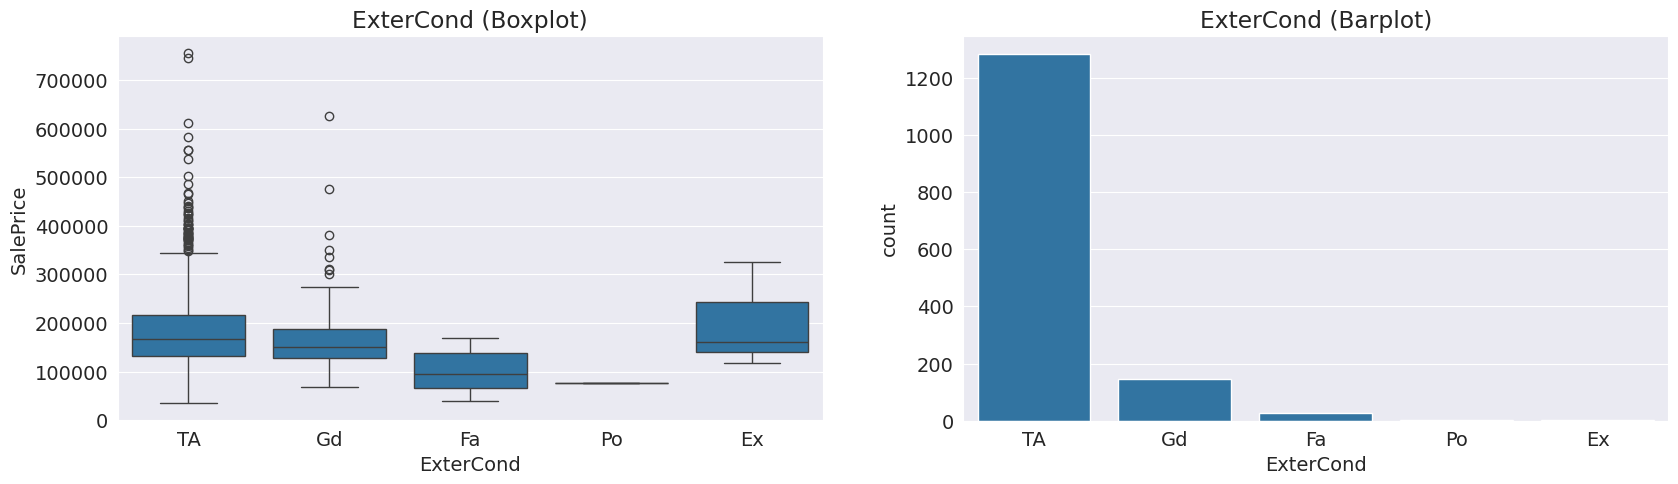

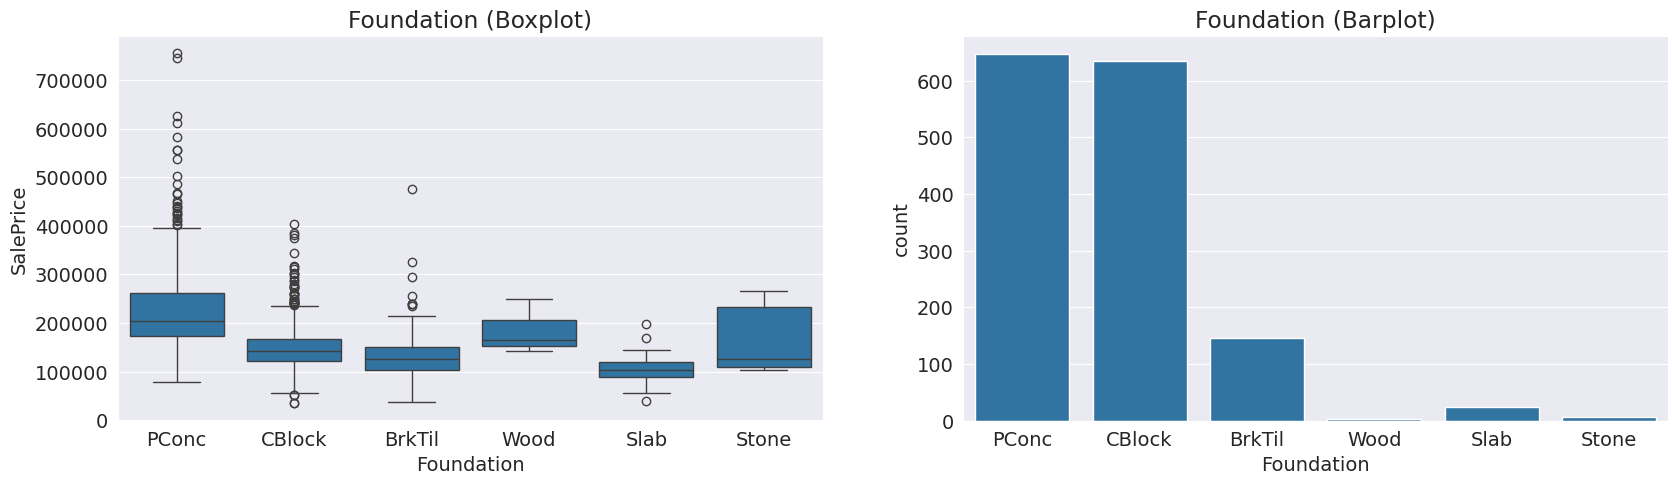

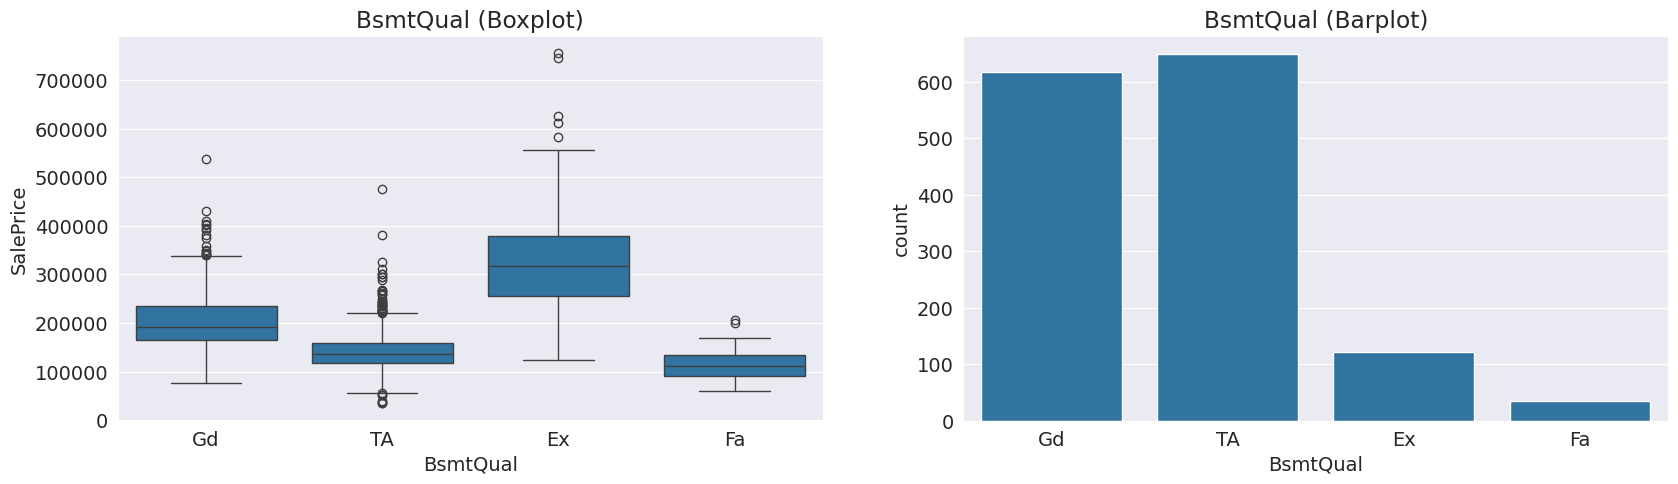

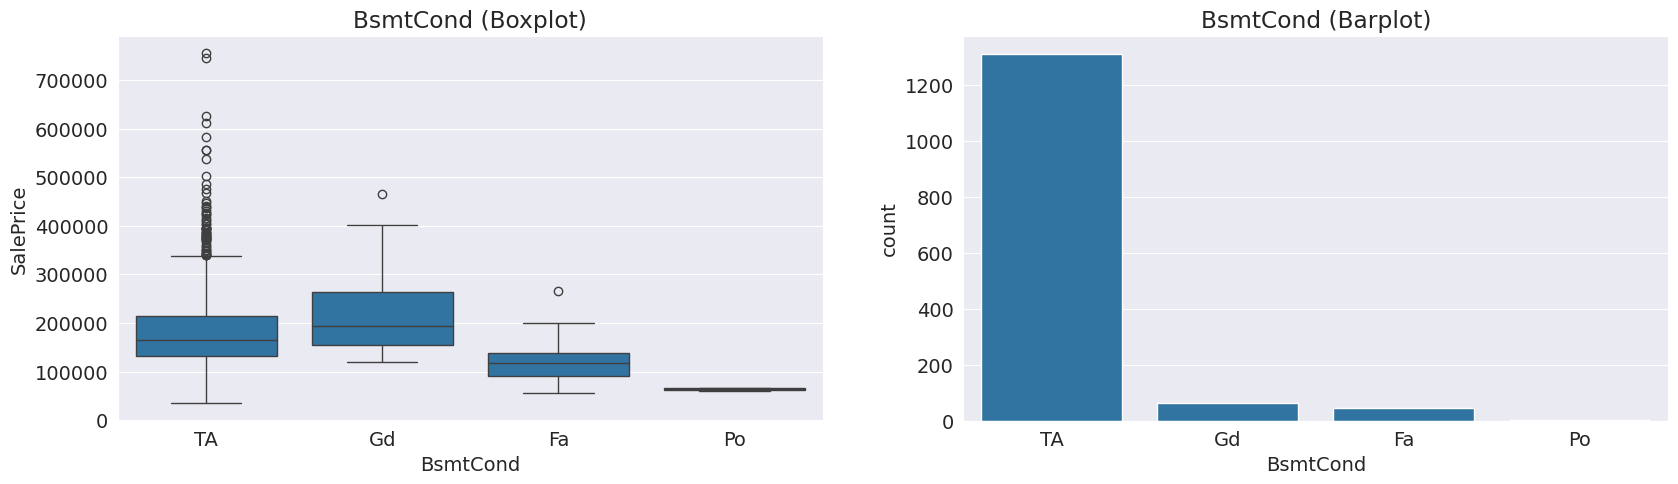

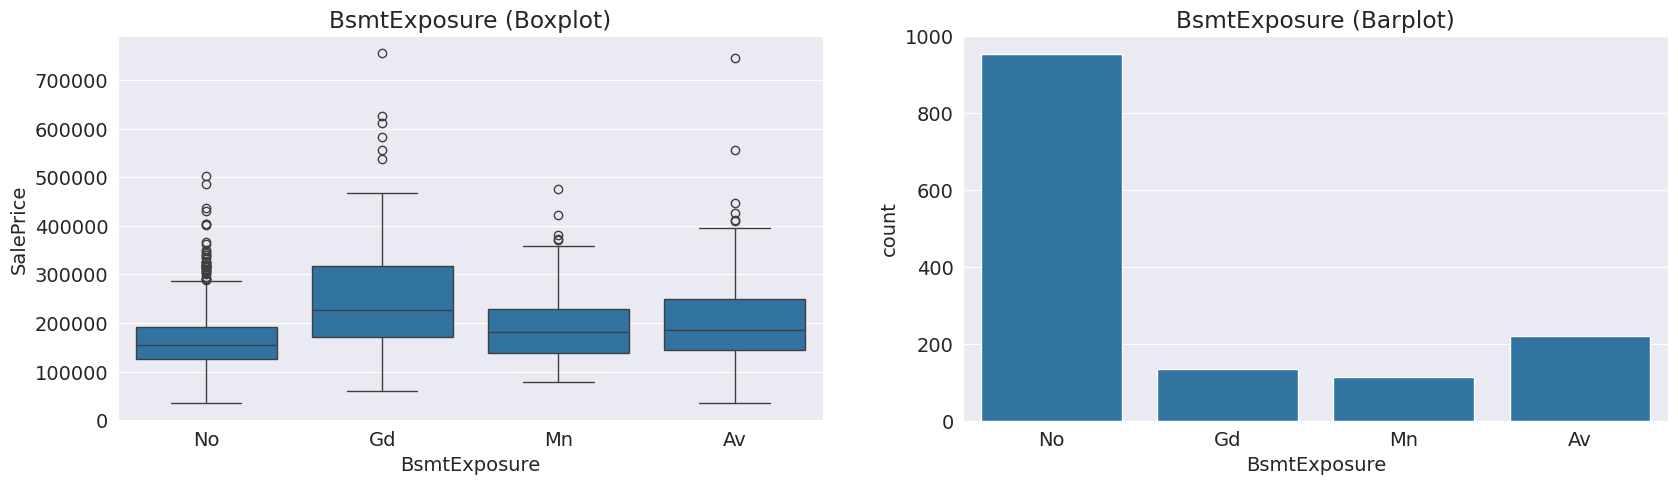

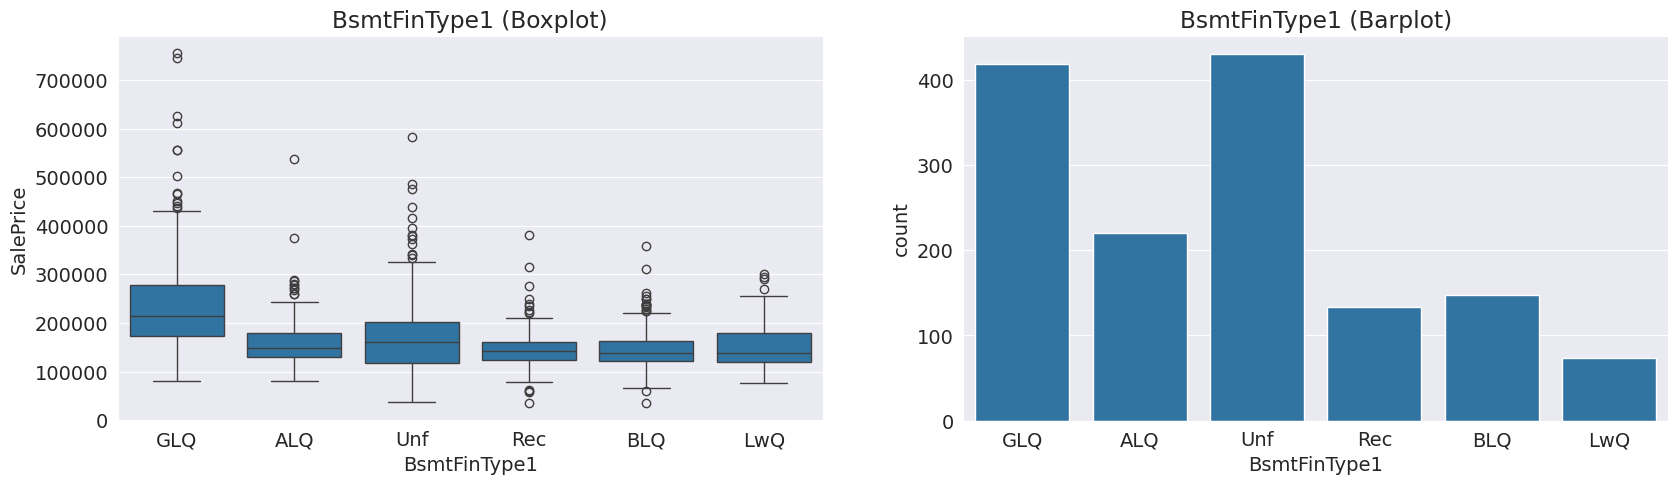

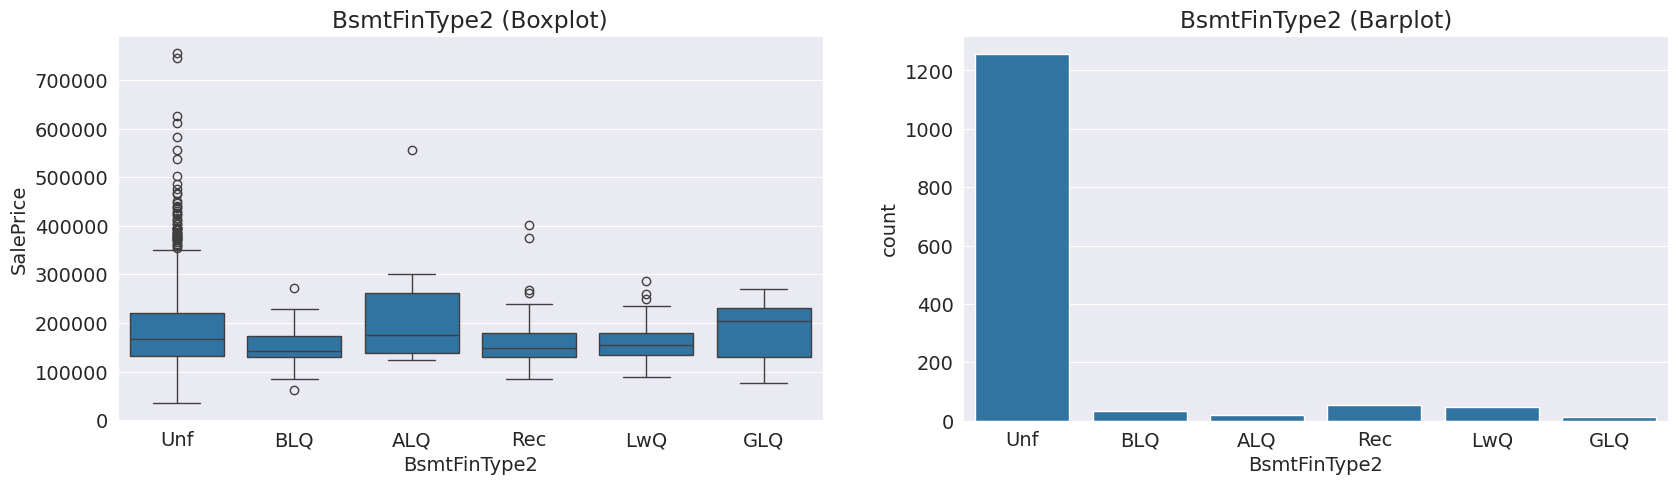

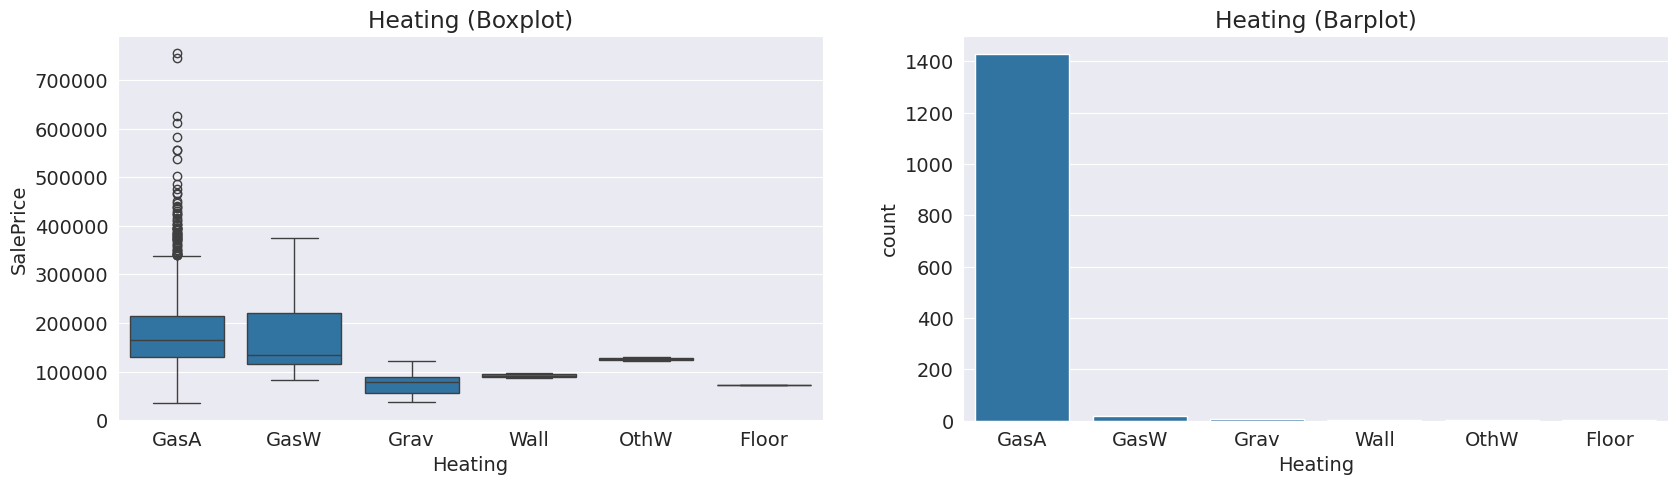

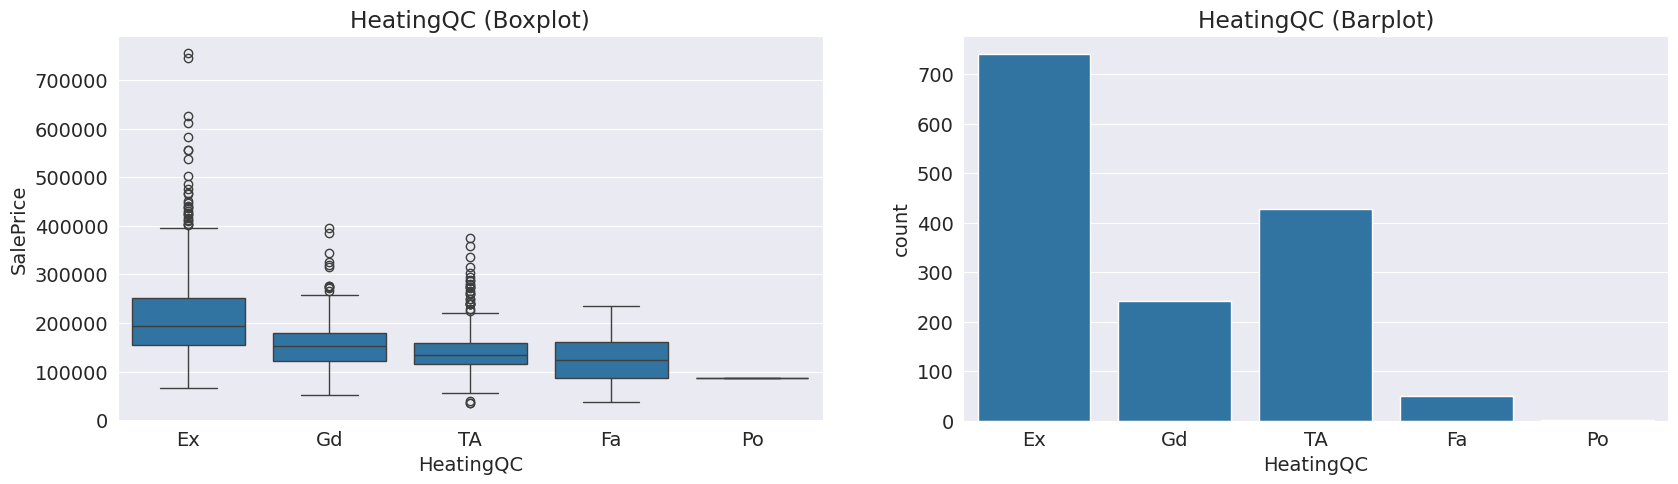

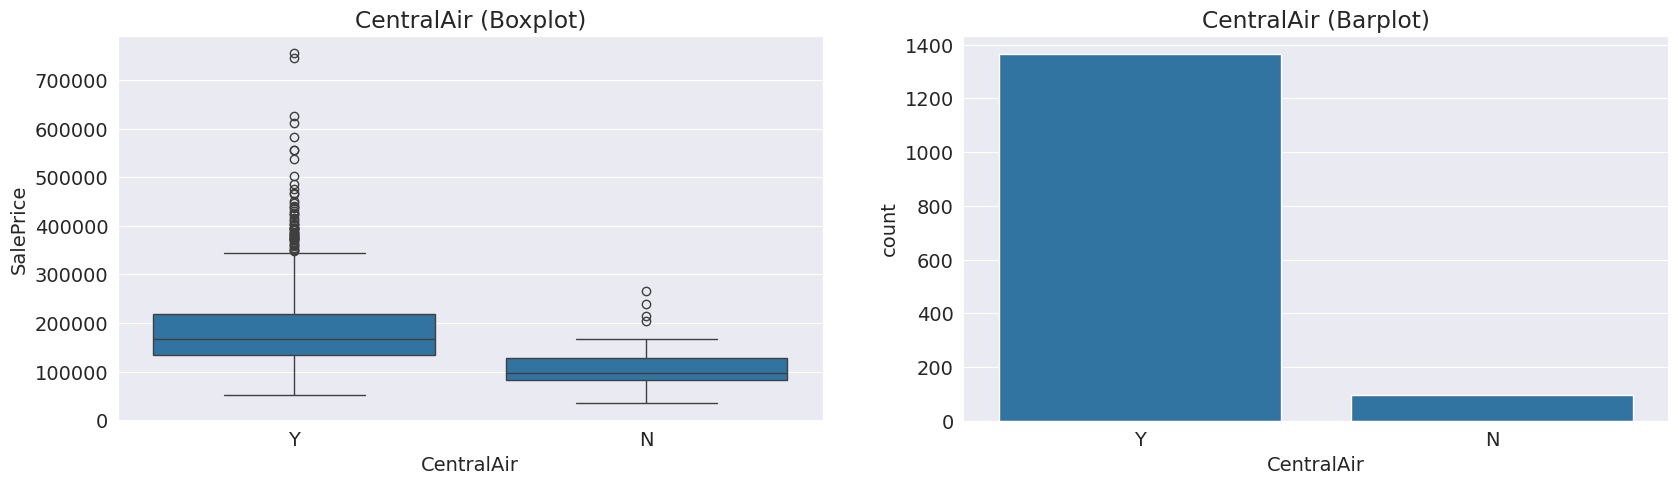

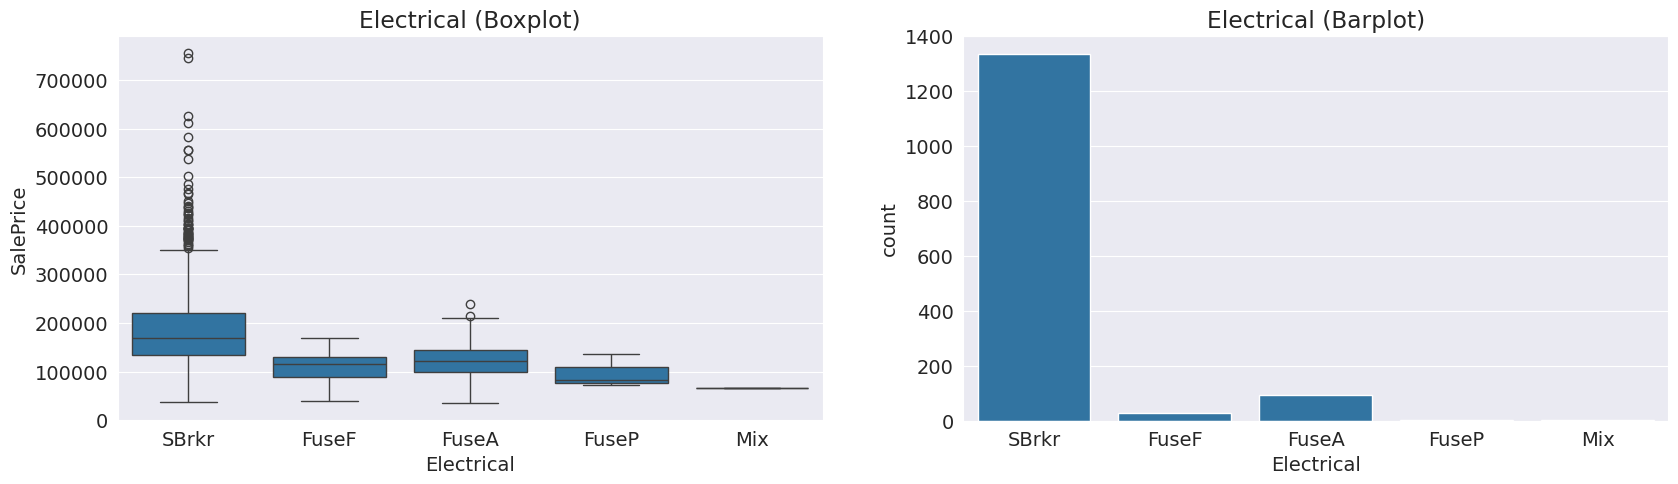

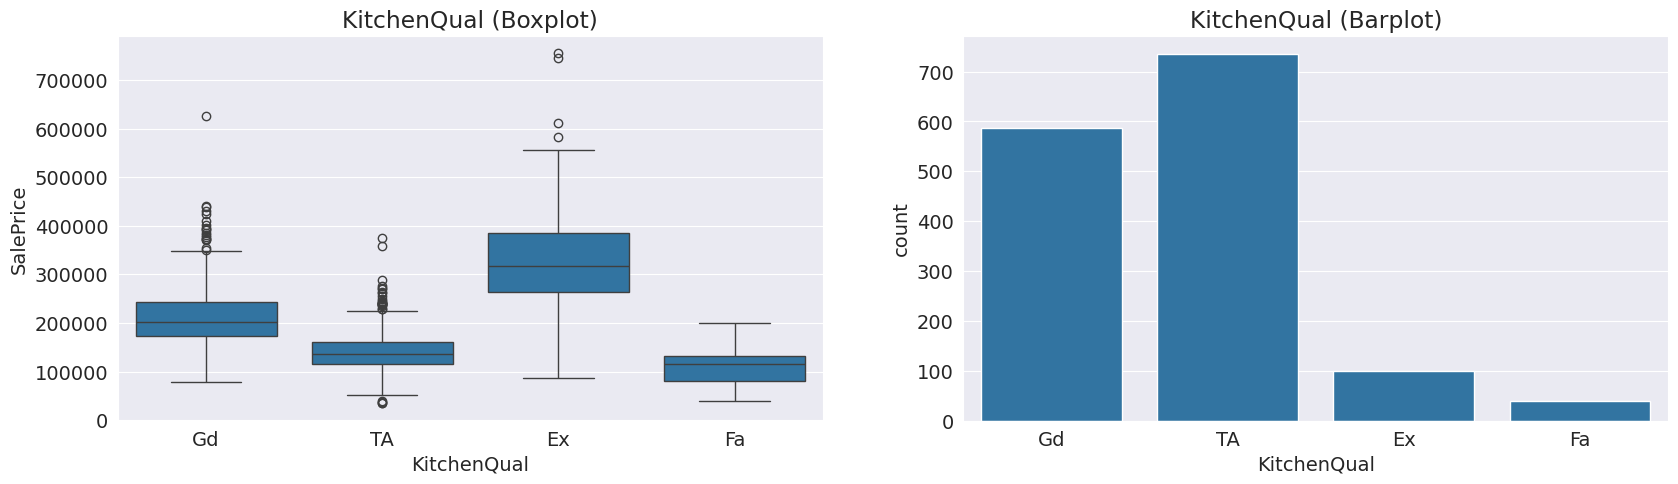

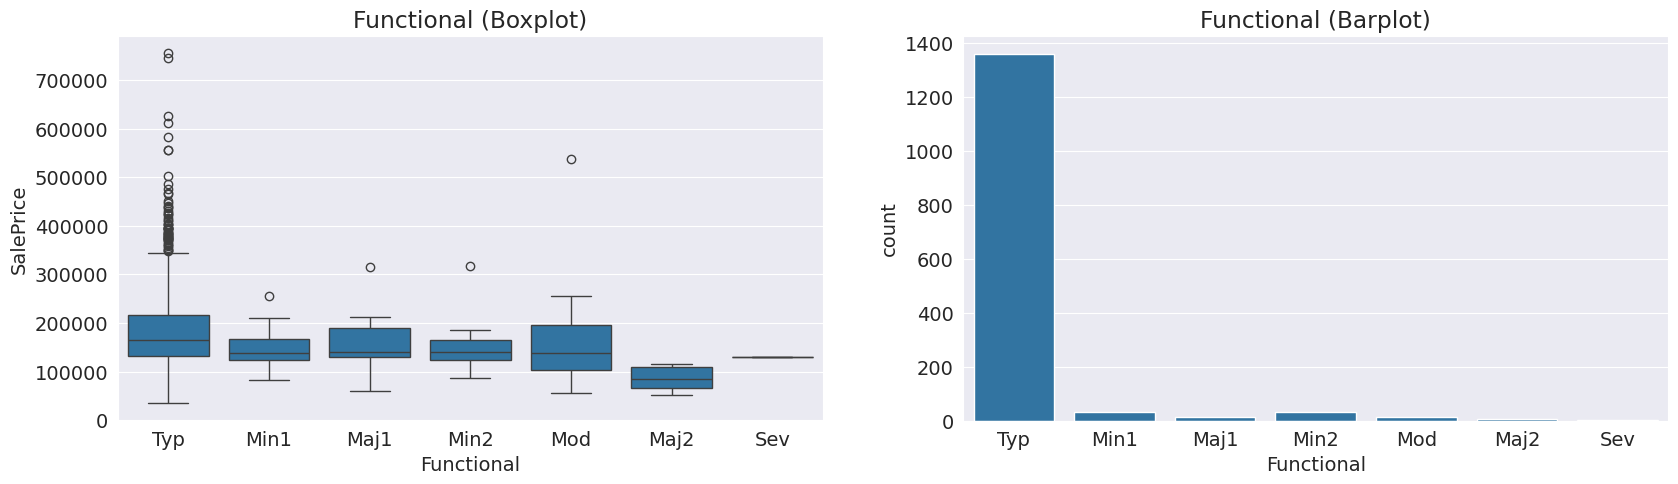

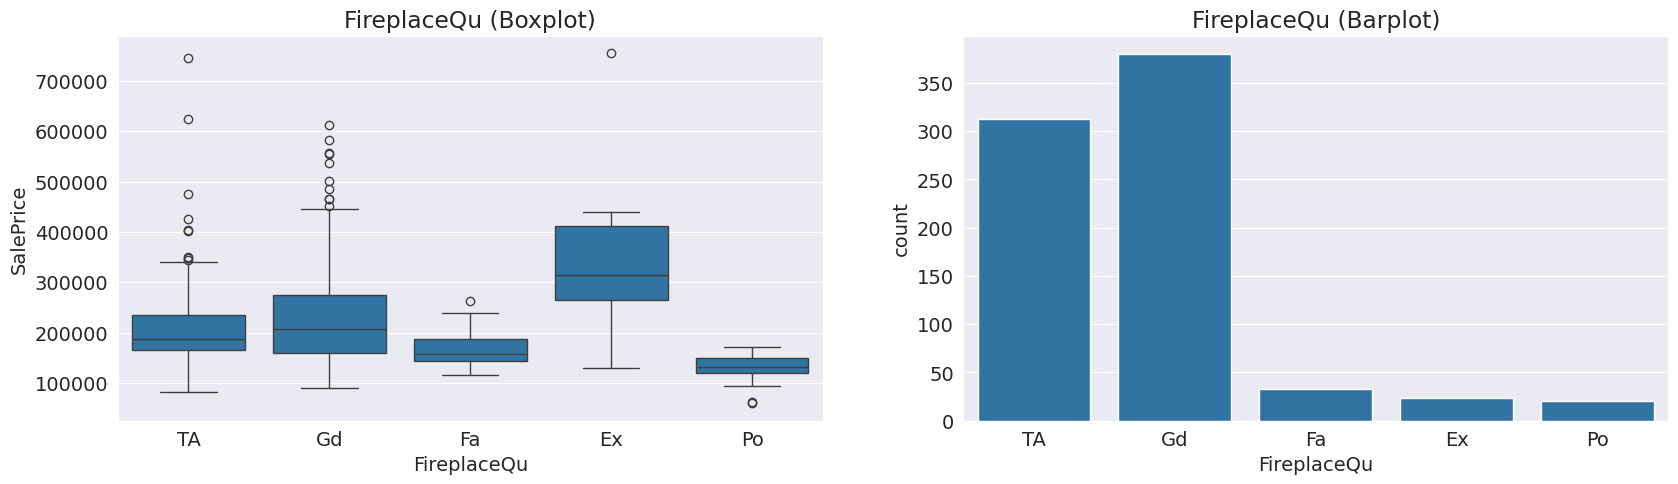

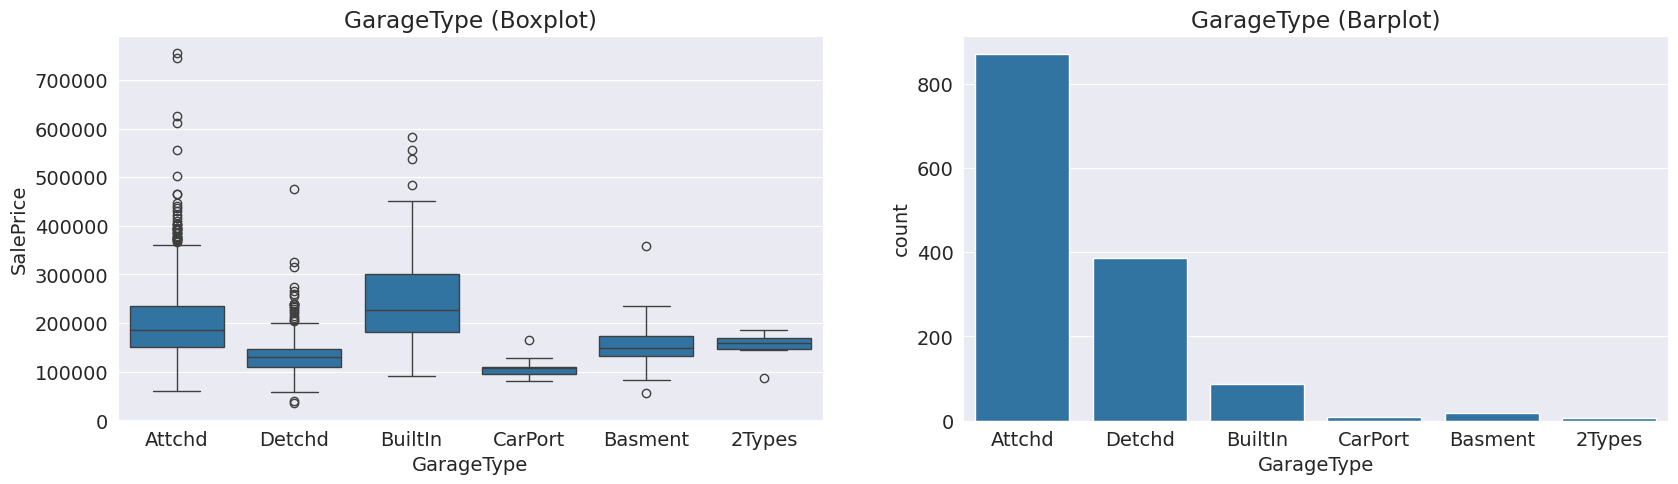

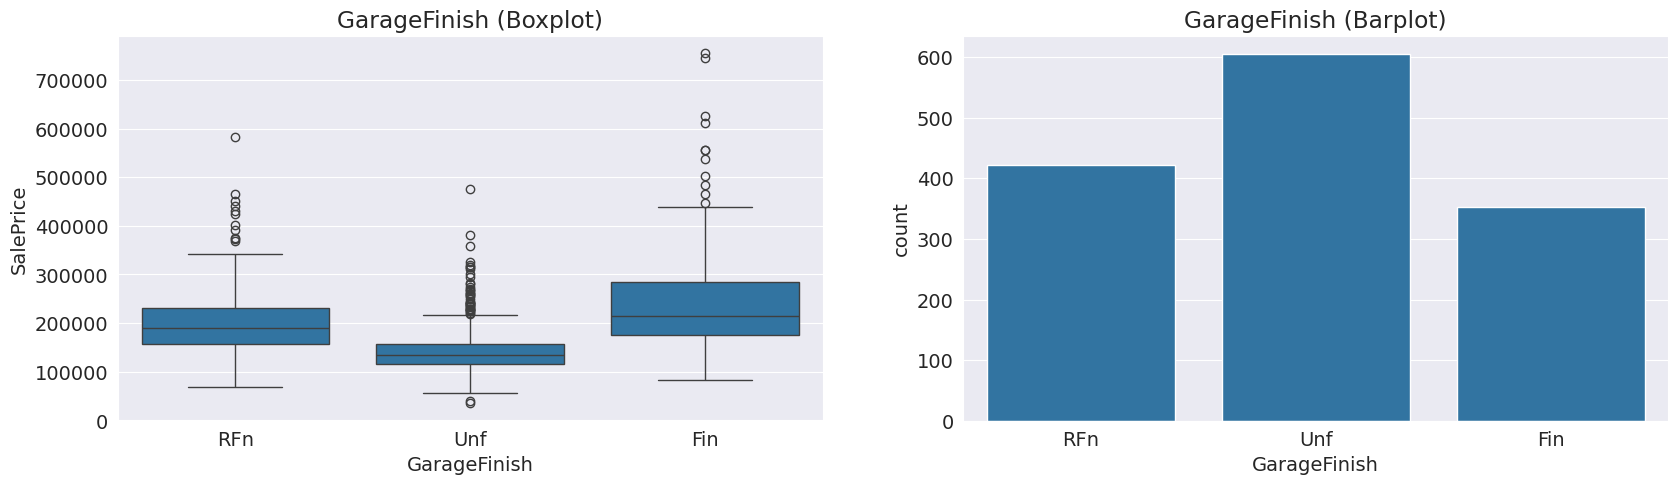

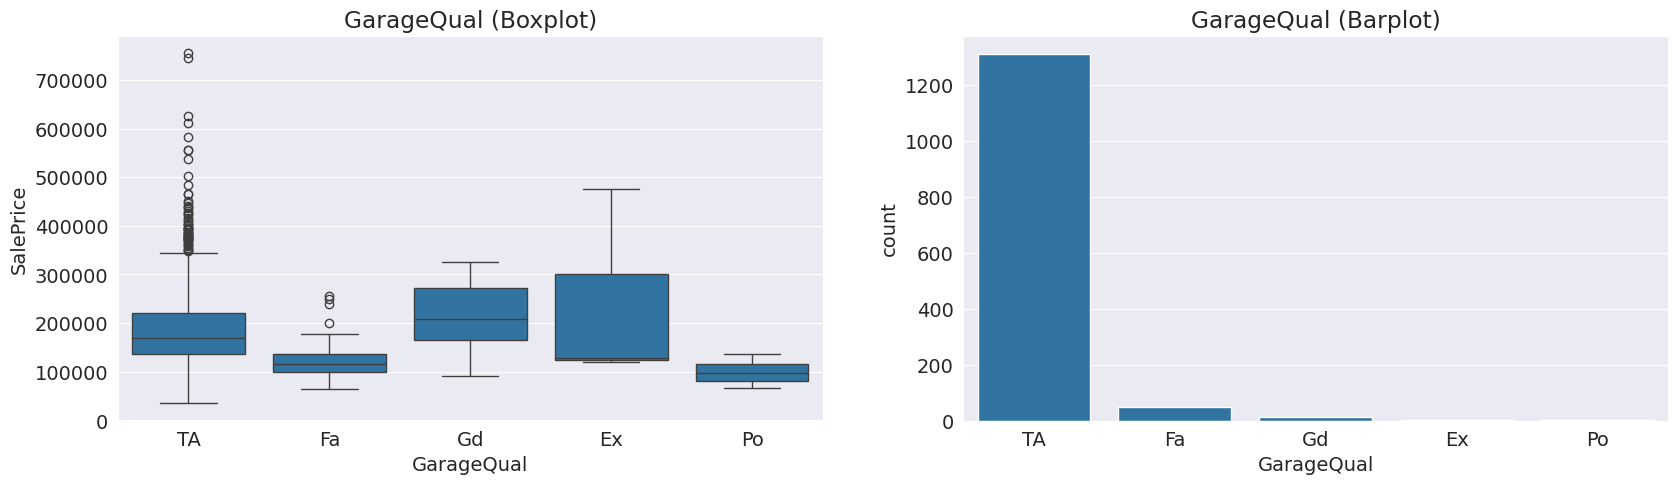

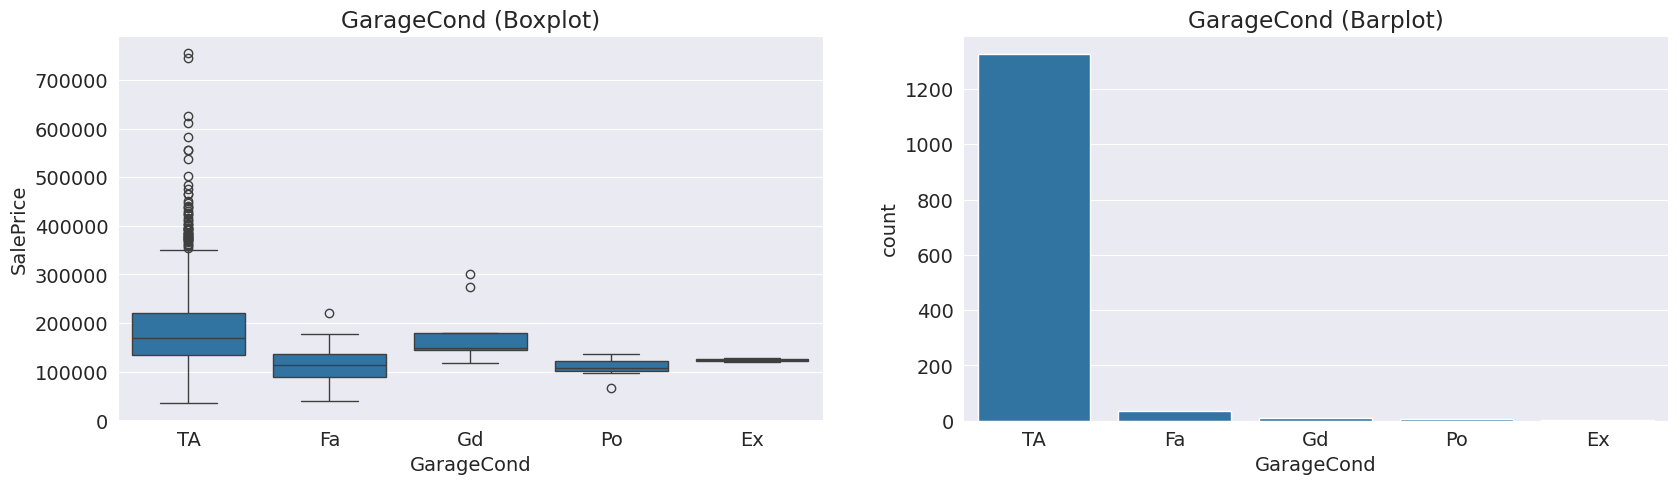

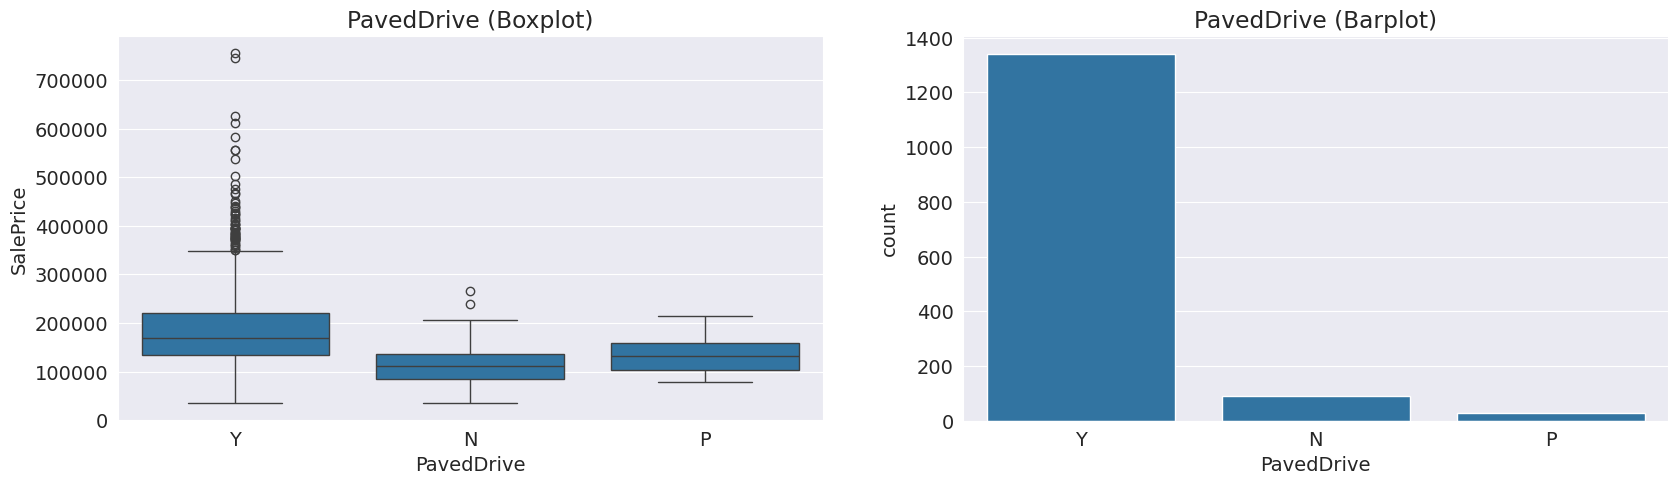

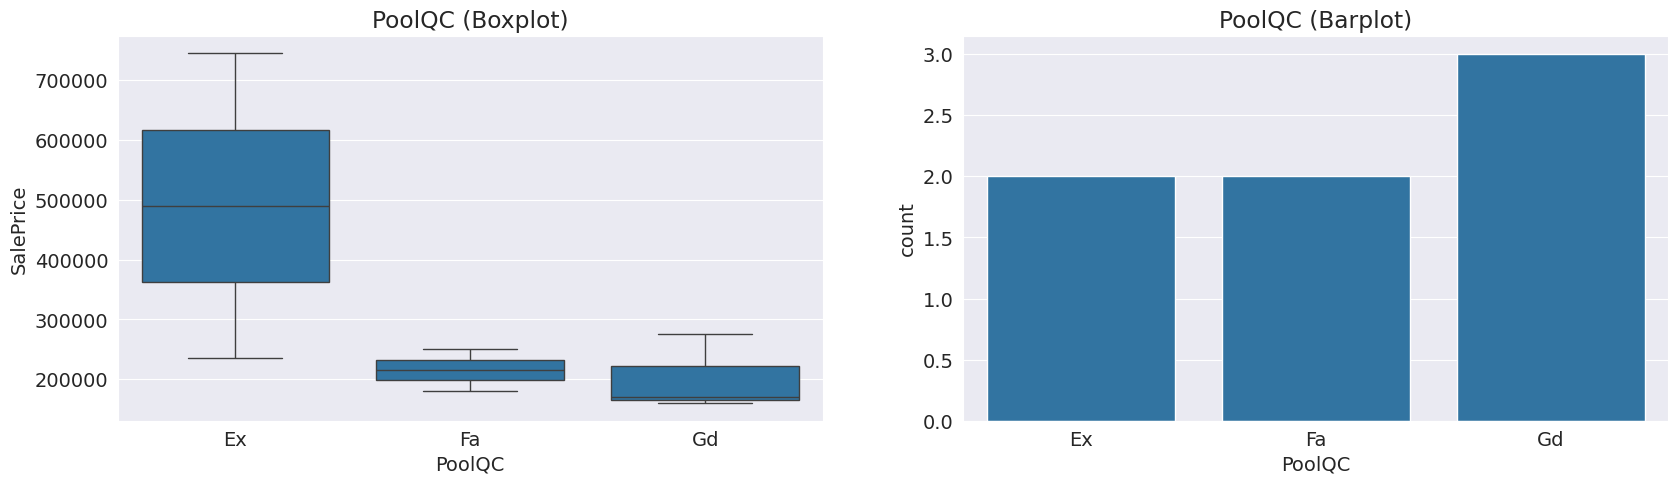

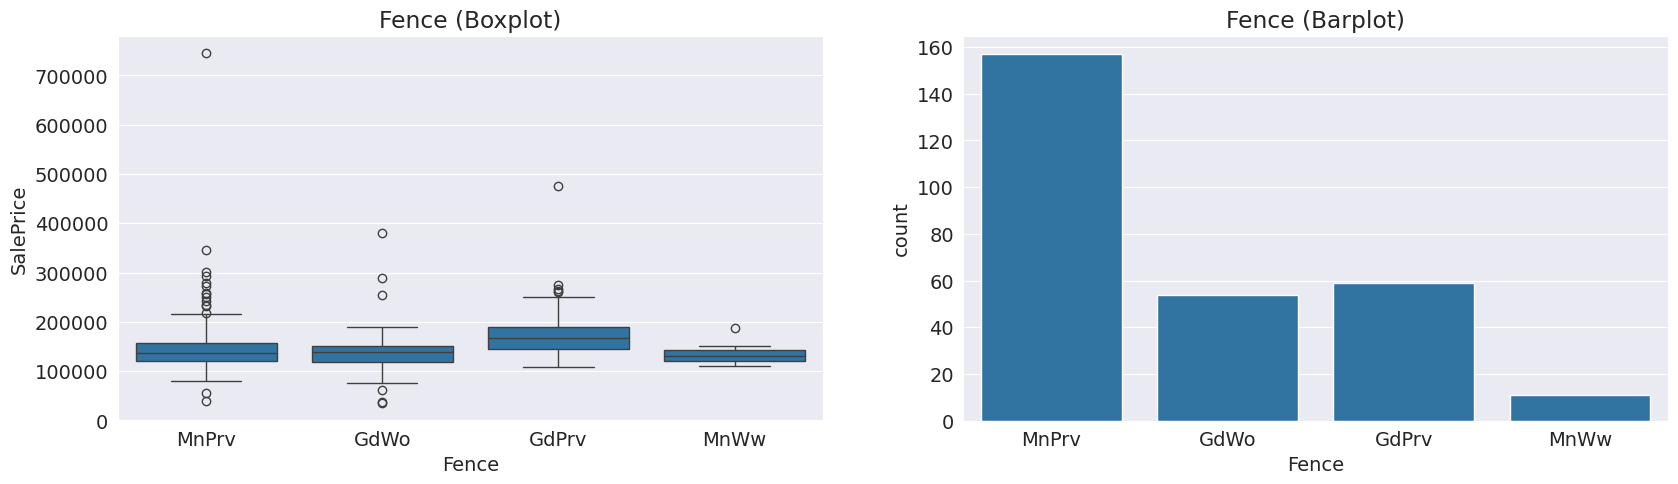

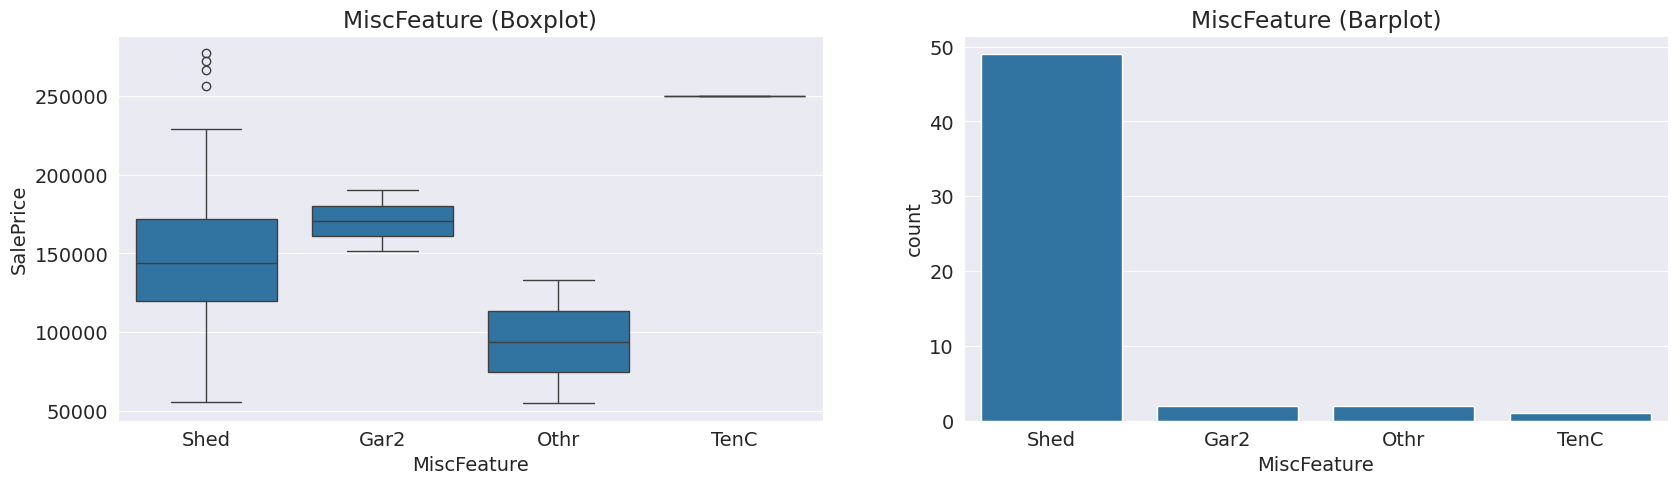

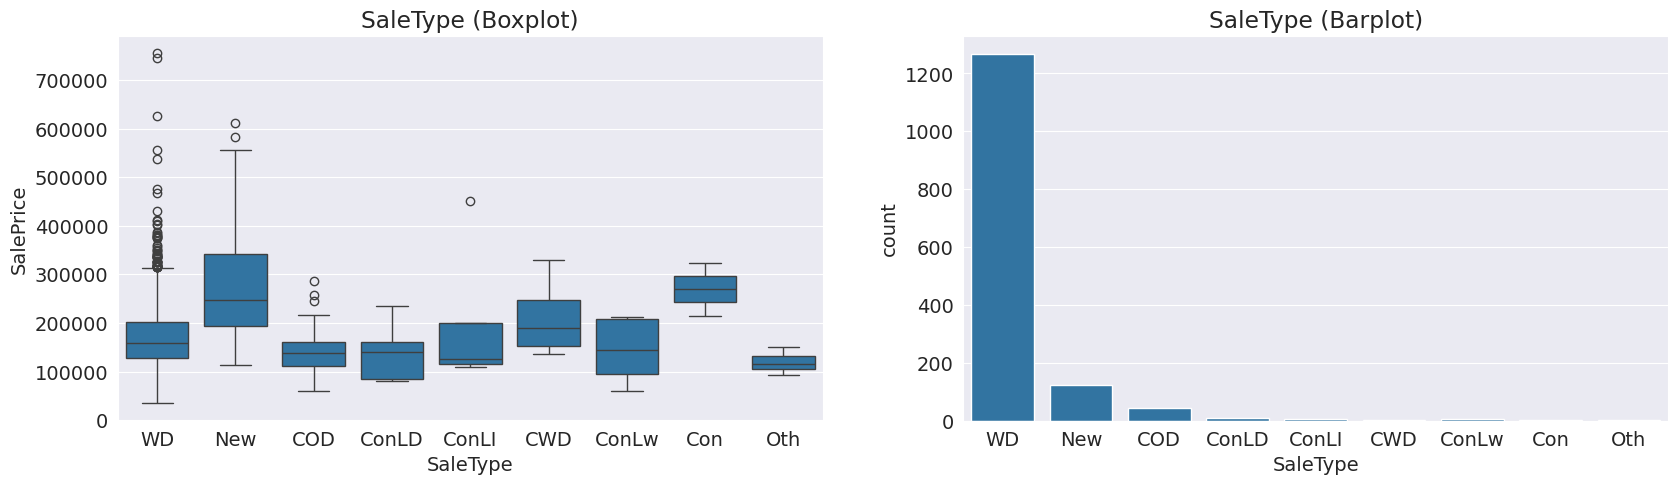

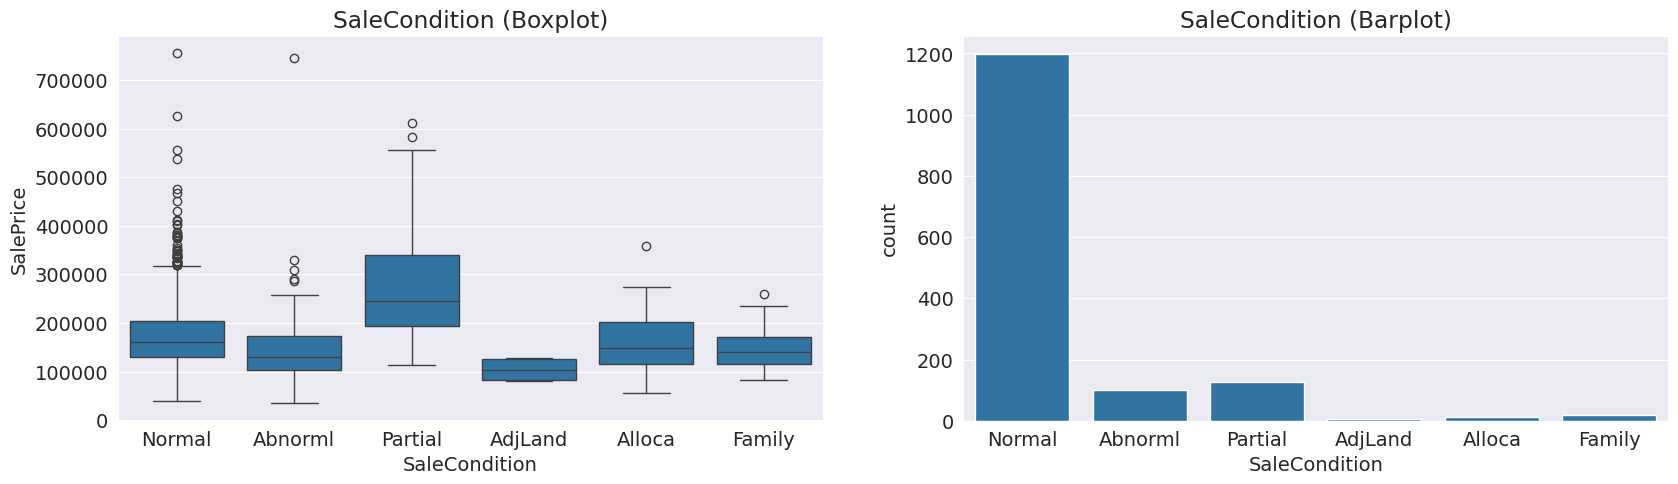

In [33]:
for i in discrete+categorical:
    fig, axes = plt.subplots(1,2, figsize=(20, 5))
    axes[0].set_title(i+' (Boxplot)')
    sns.boxplot(y=prices_df['SalePrice'], x=prices_df[i], ax=axes[0])
    axes[1].set_title(i+' (Barplot)')
    sns.countplot(x=prices_df[i], ax=axes[1])

<div class="alert alert-block alert-info" style='color:black;'>
    Here the countplot shows number of houses sold corresponding to the value of the attribute and the boxplot shows distribution of
    `SalePrice` corresponding to the value of the attribute. Observe that the number of houses sold corresponding to a value of the
    attribute can be less in number and still can cause wide distribution of corresponding `SalePrice`.
</div>

##### Now will find the distribution of numeric values while comparing the same attribute with SalePrice using scatterplot

In [34]:
Numeric_Attributes=['LotFrontage','LotArea','YearBuilt',
 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
 'LowQualFinSF', 'GrLivArea',   'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

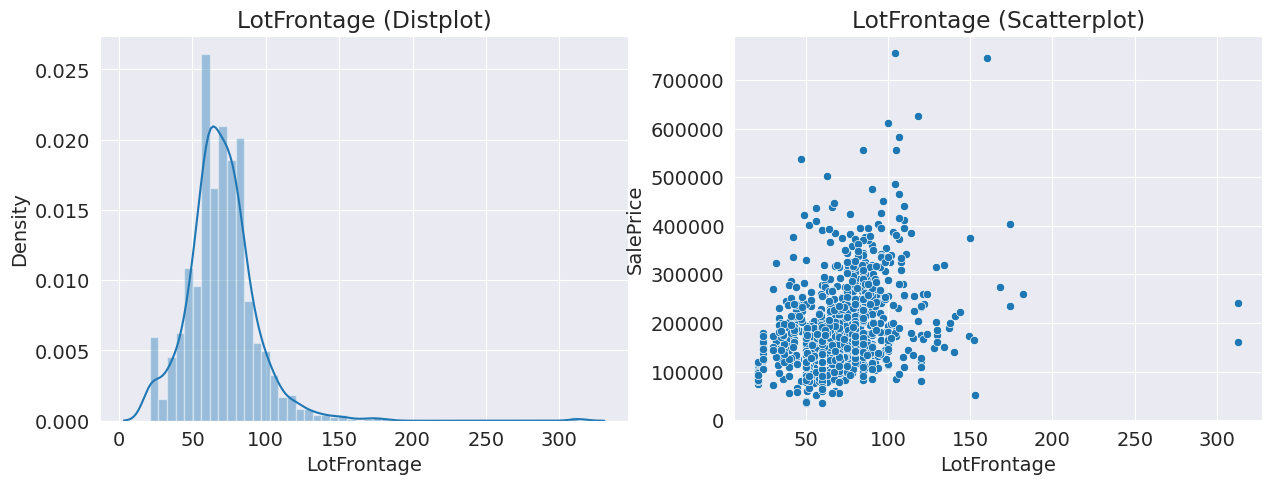

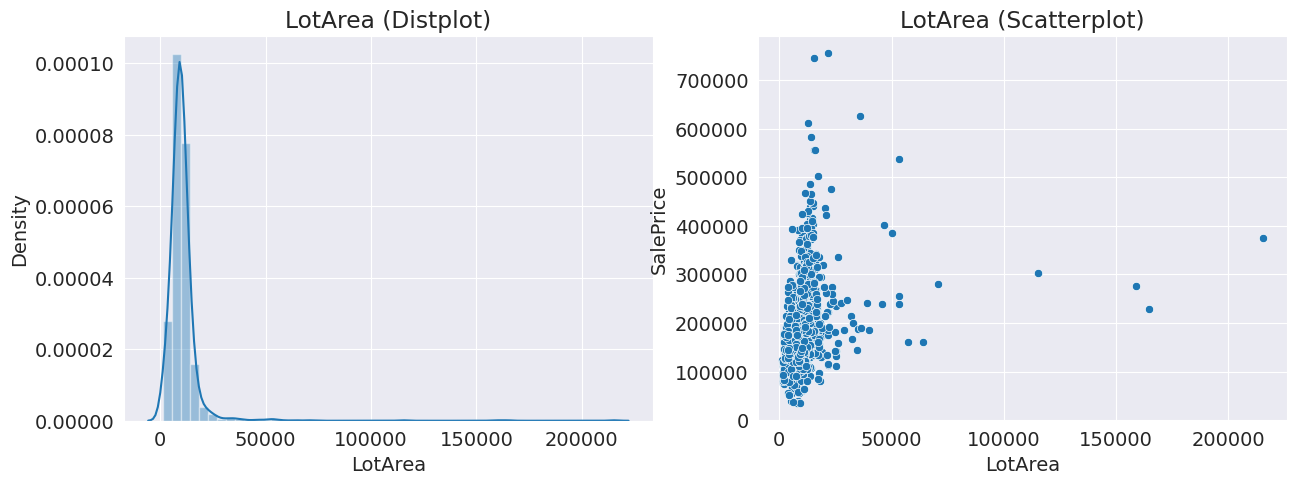

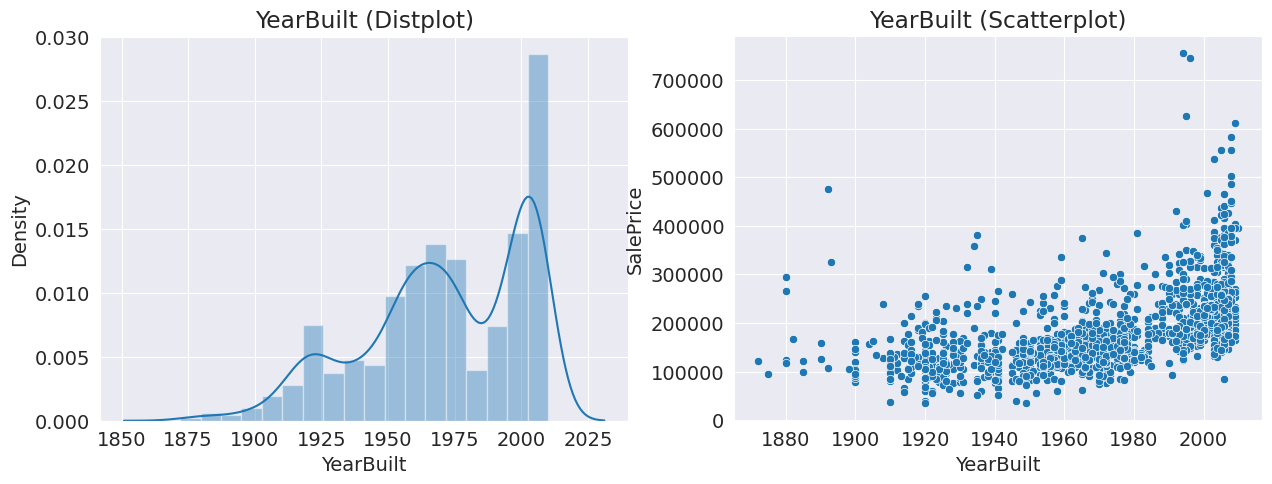

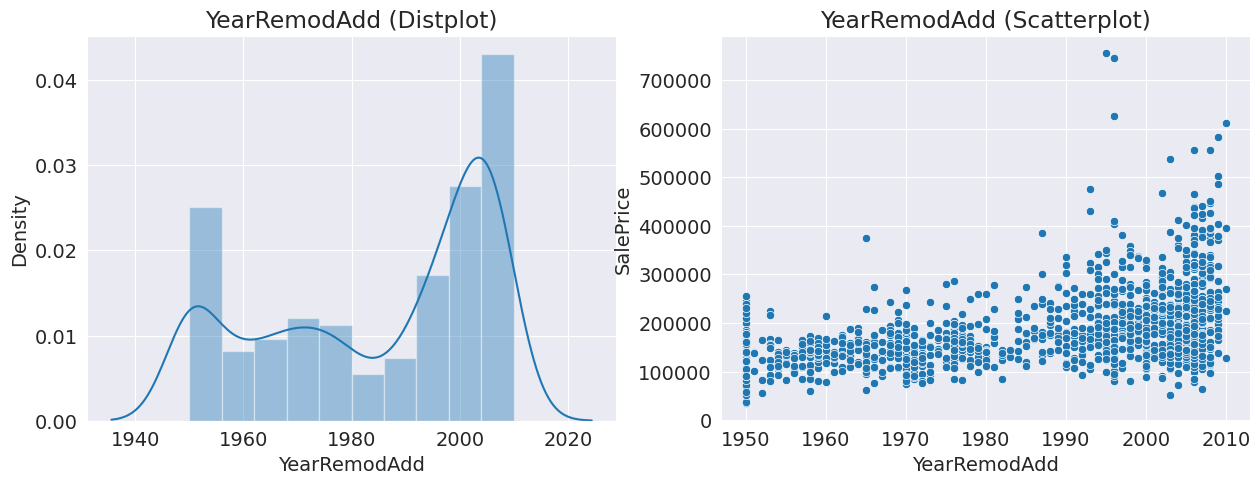

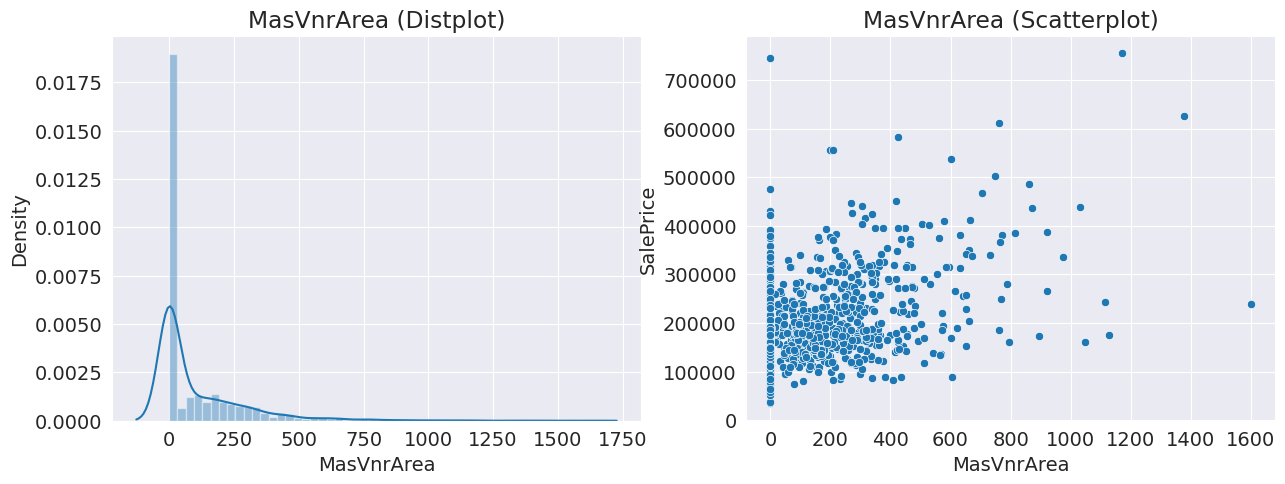

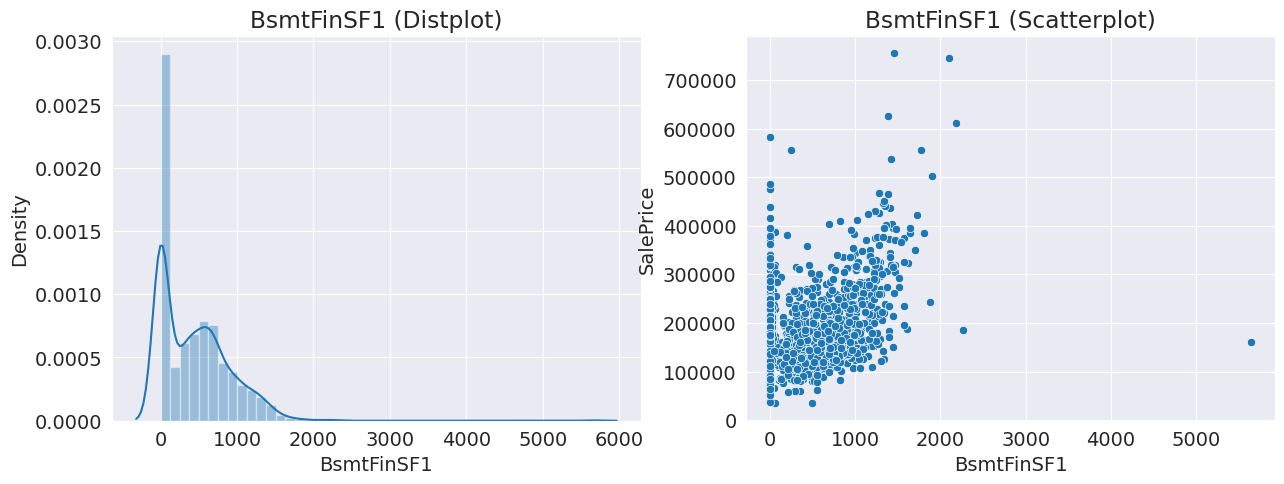

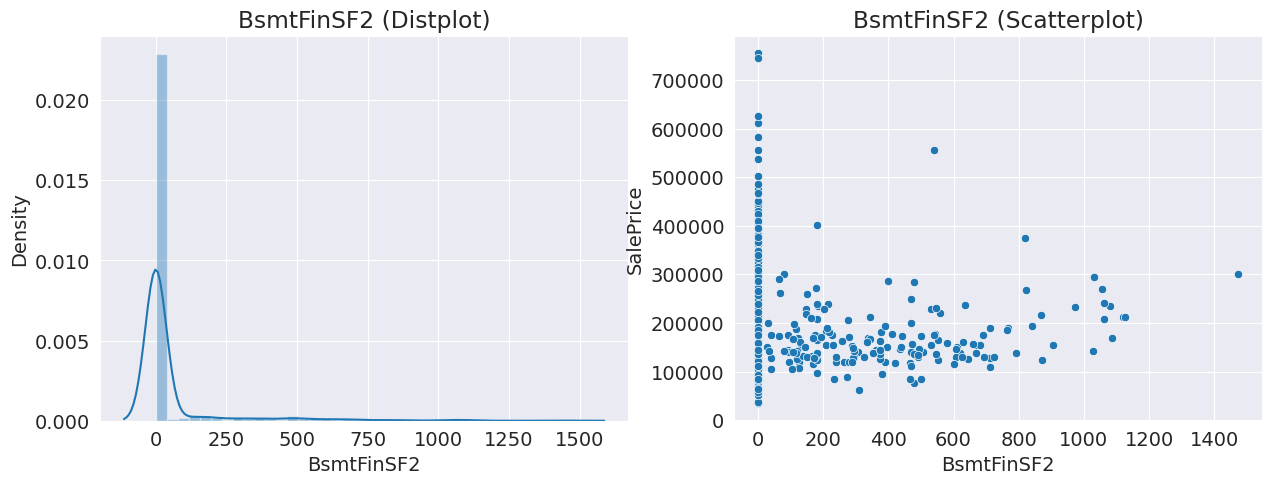

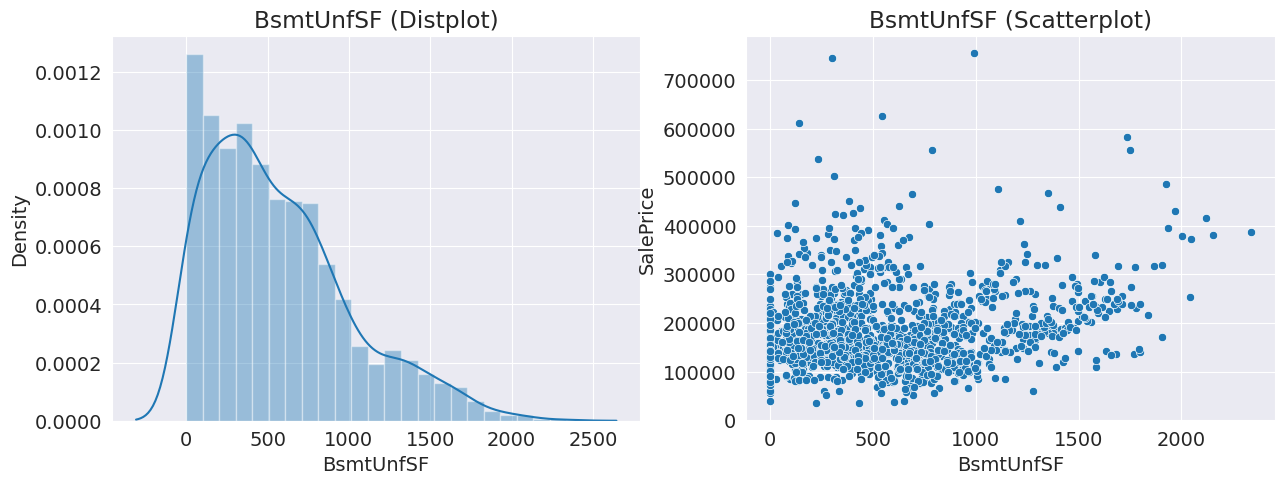

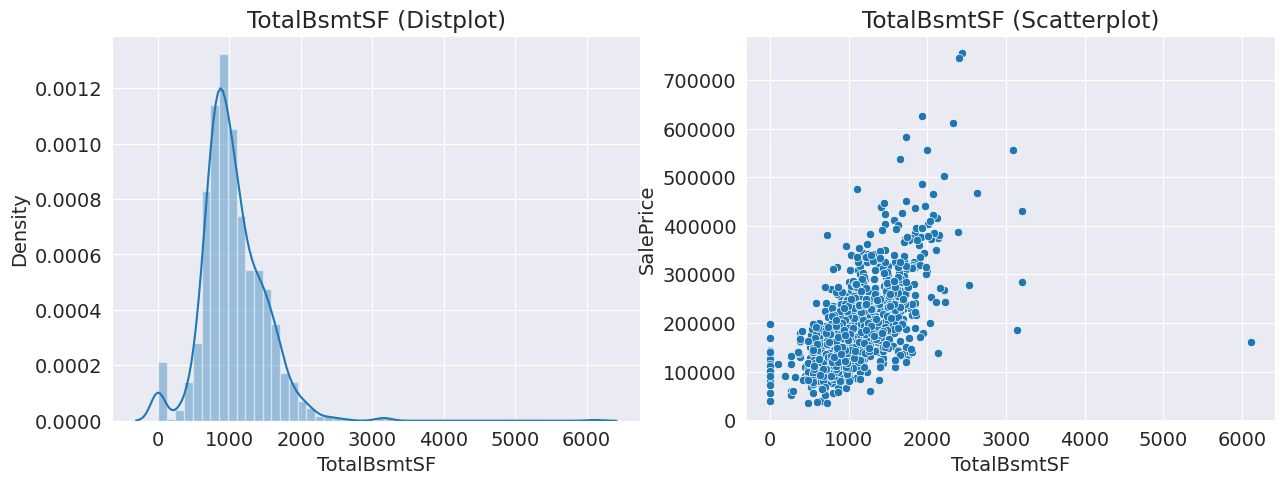

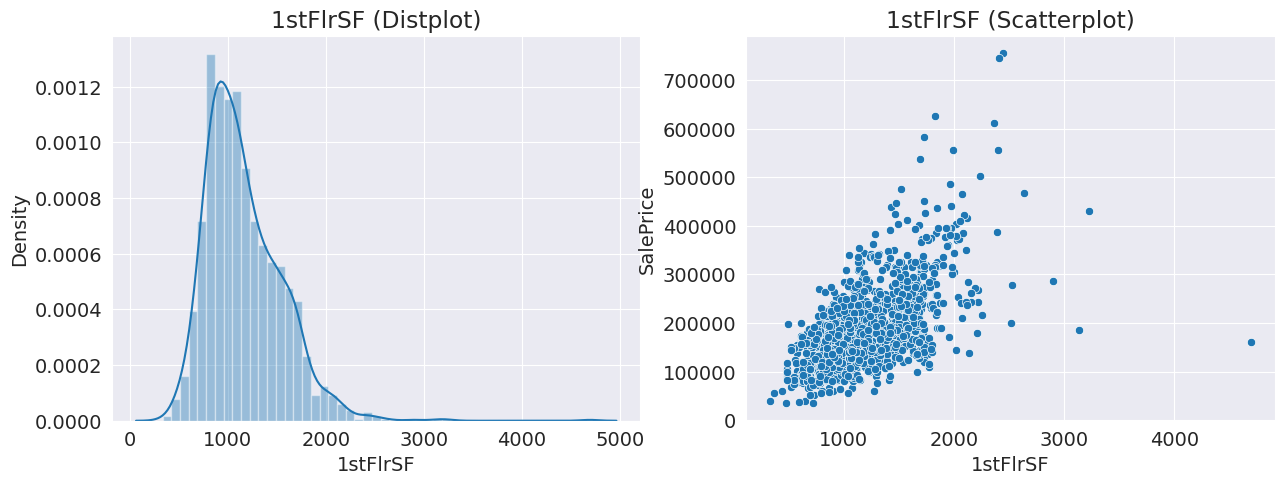

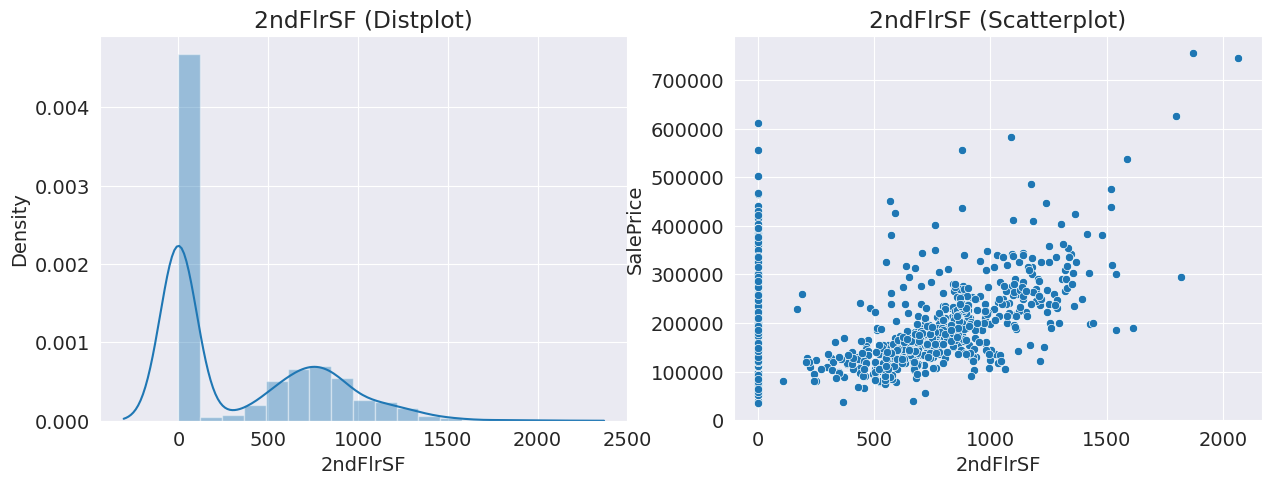

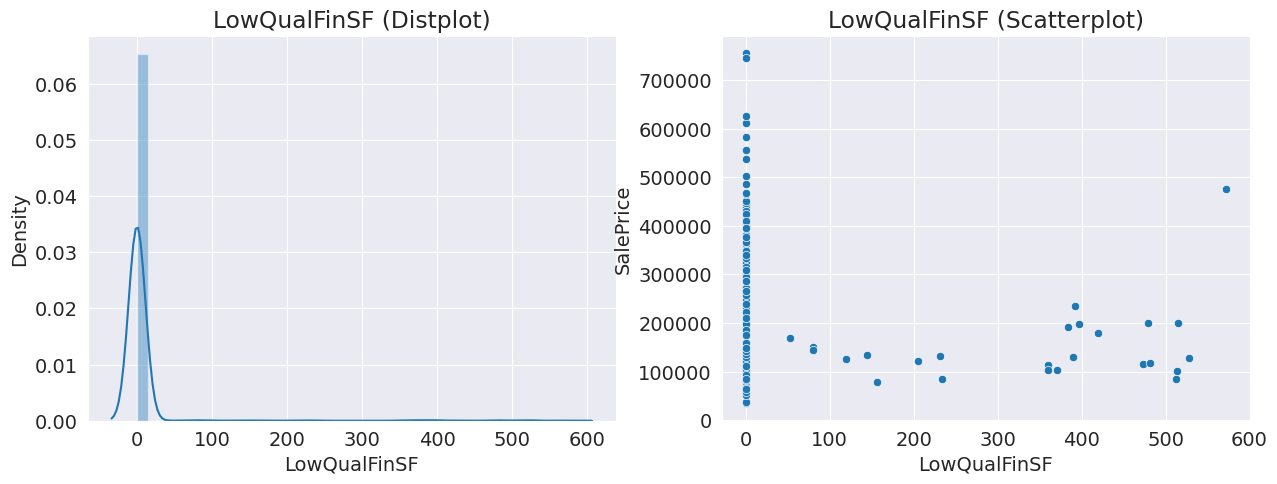

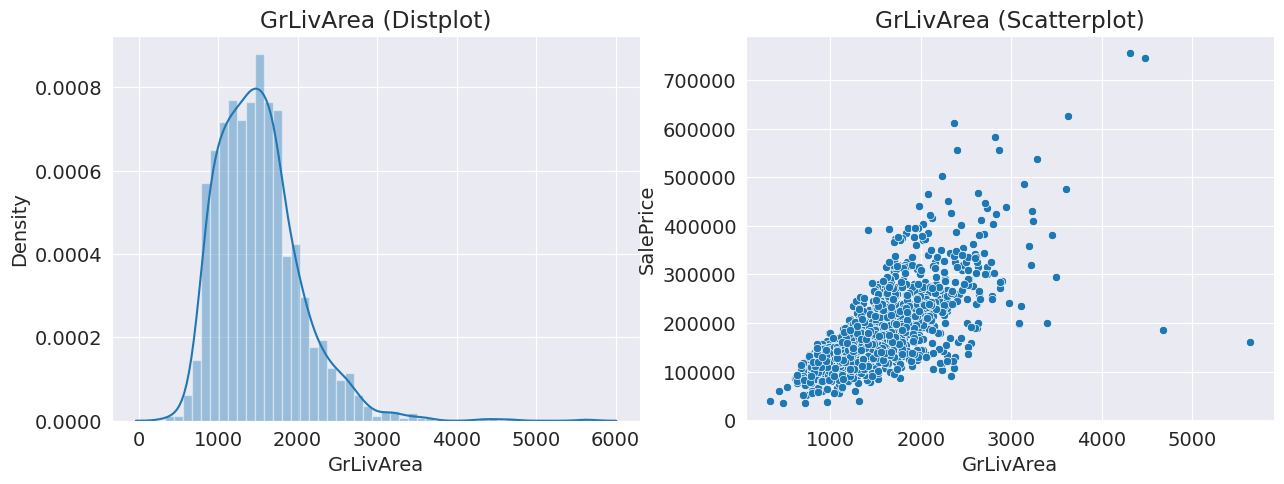

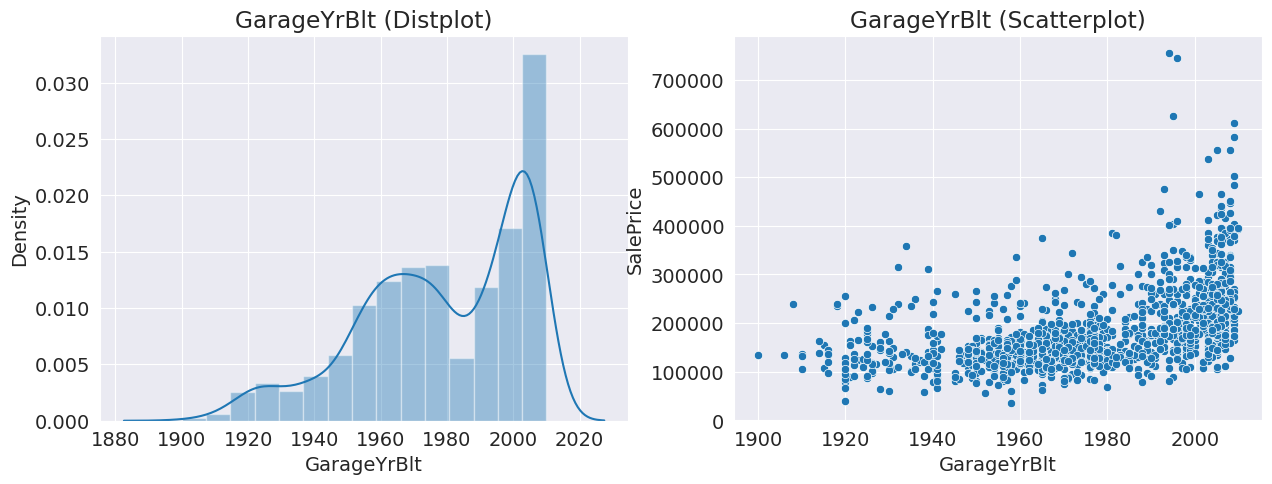

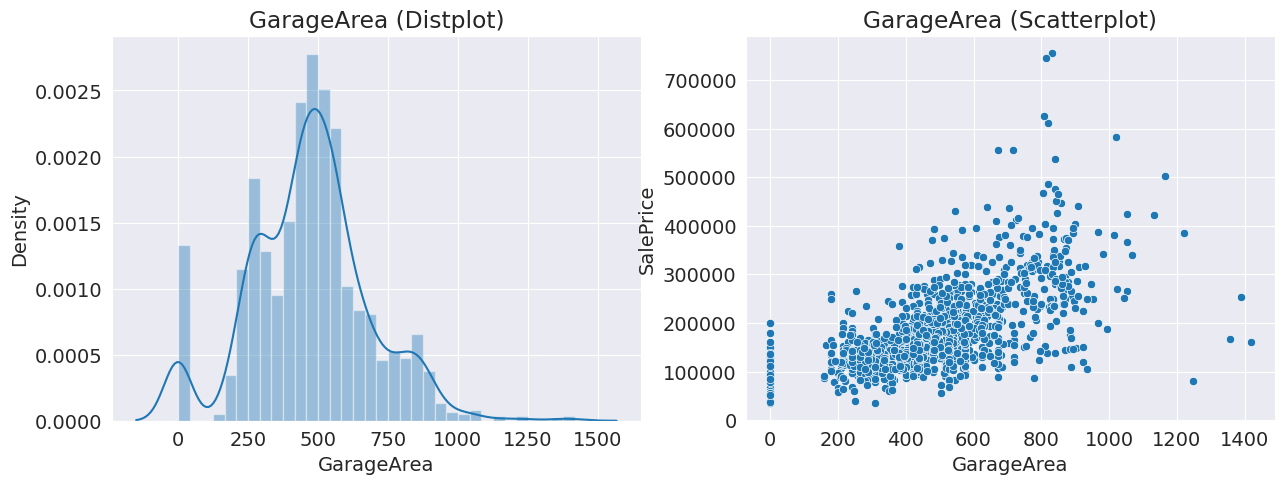

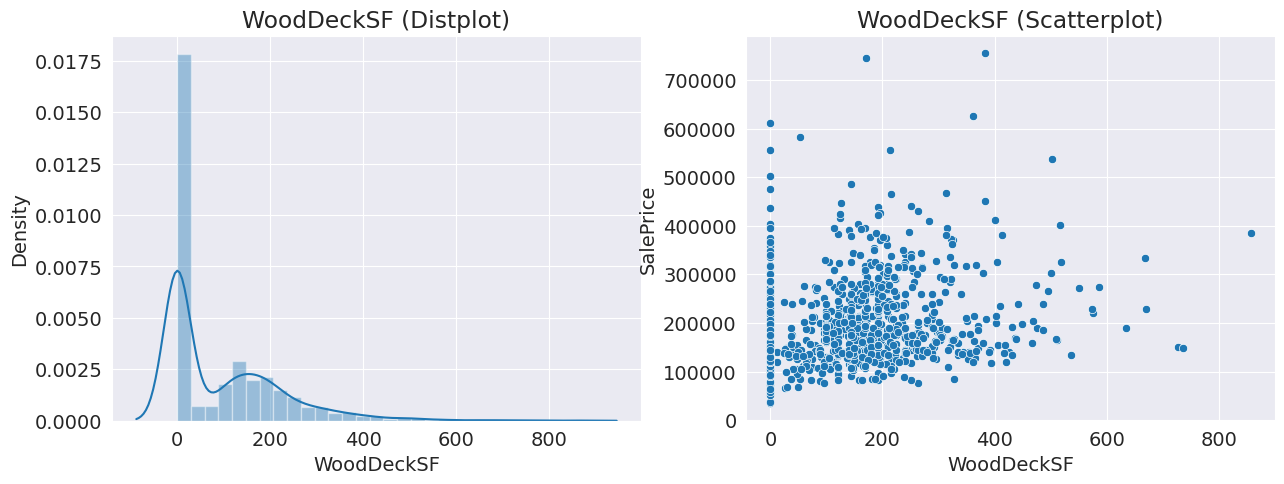

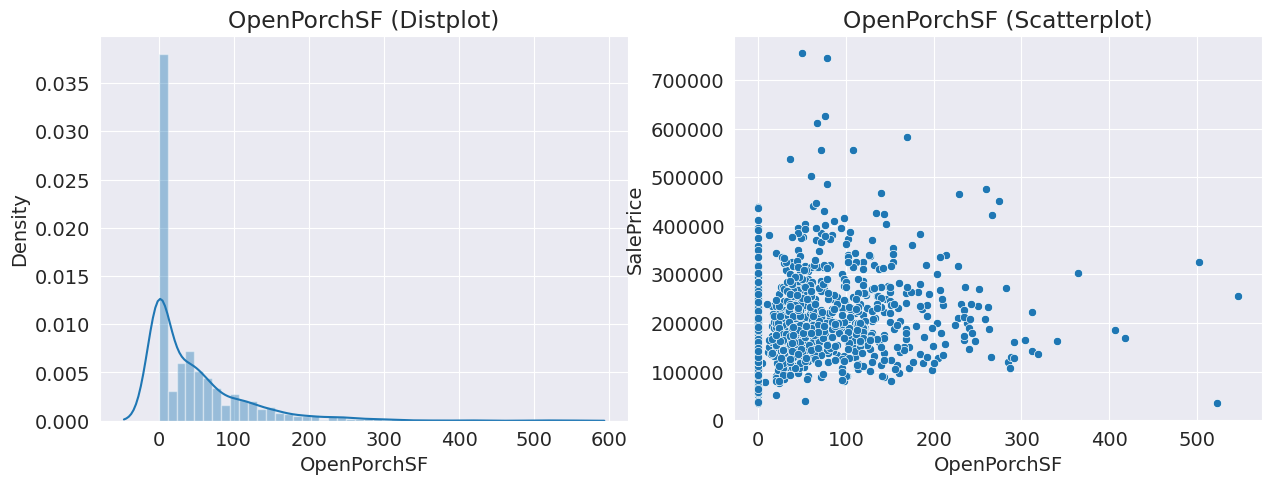

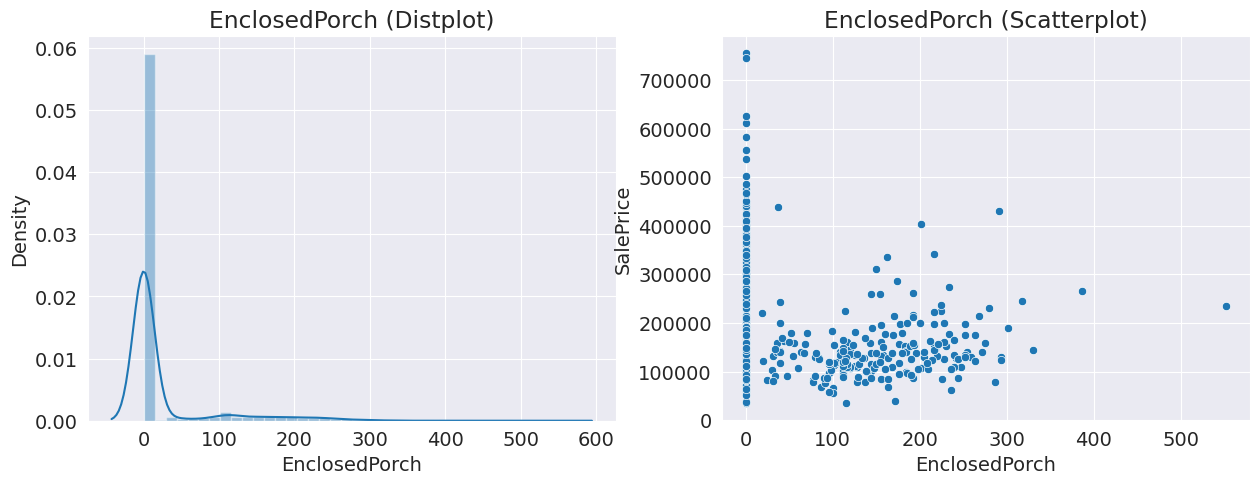

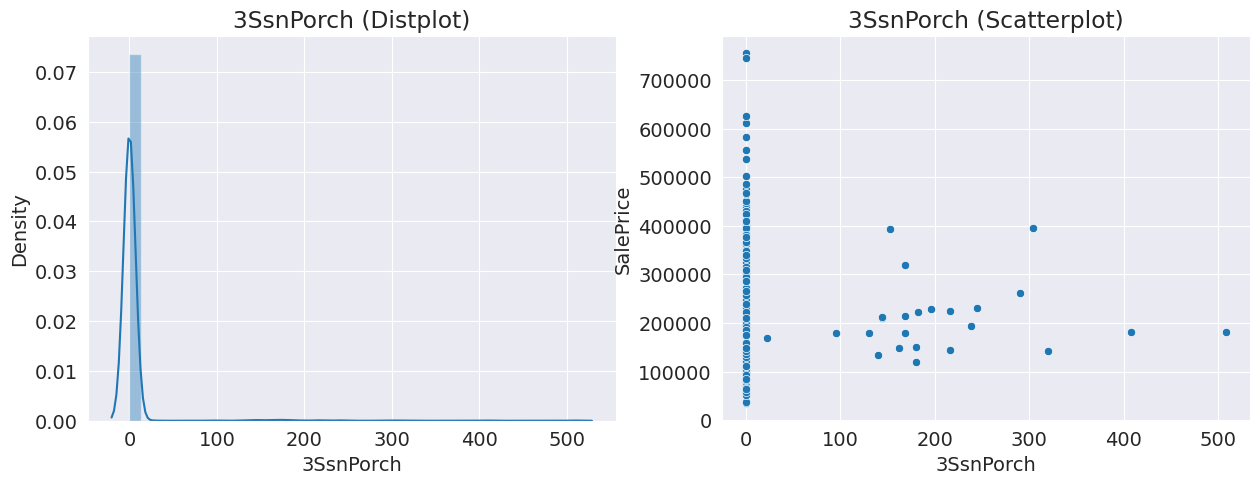

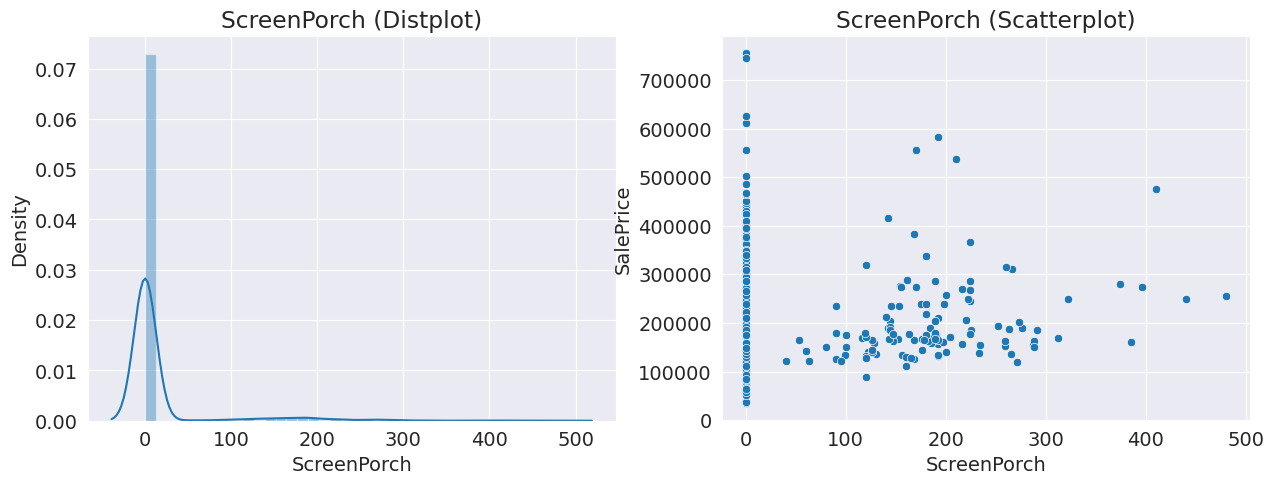

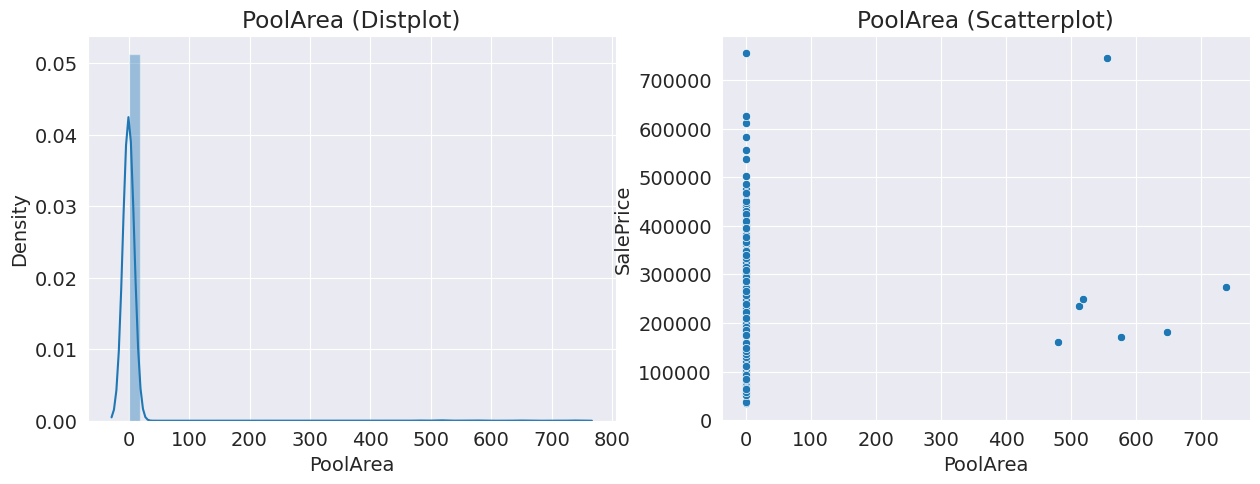

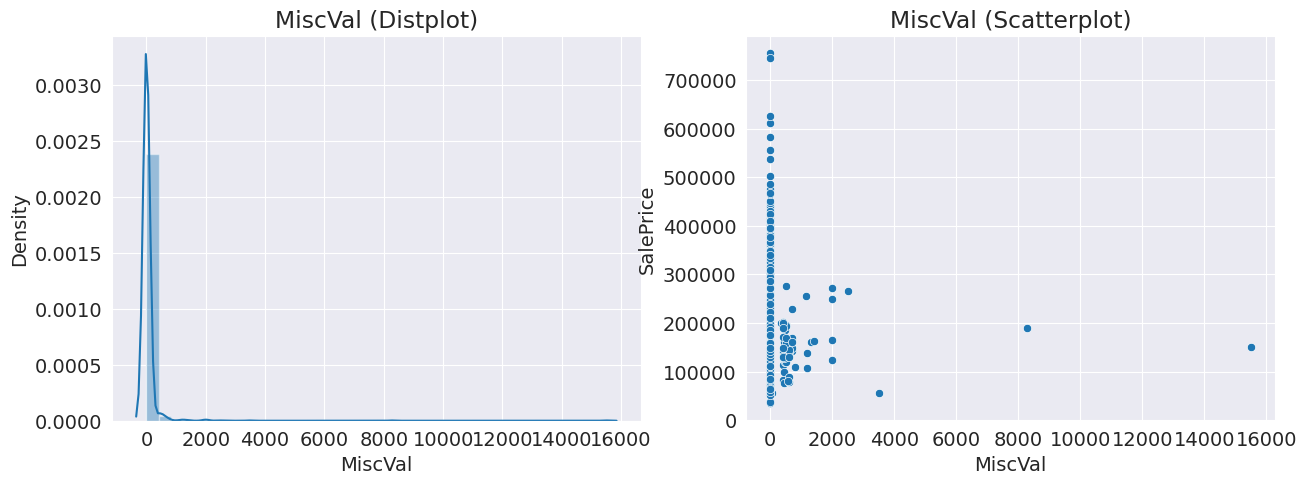

In [35]:
for i in Numeric_Attributes:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title(i+' (Distplot)')
    sns.distplot(prices_df[i], ax=axes[0])
    axes[1].set_title(i+' (Scatterplot)')
    sns.scatterplot(y=prices_df['SalePrice'], x=prices_df[i], ax=axes[1])

<div class="alert alert-block alert-info" style='color:black;'>
    From the displot one can conclude that the numeric attributes aren't normally distributed also they have wide range. We need to
    deal with the outliers that cause this wide distribution of the data.
</div>

#### Correlation between the Attributes
Lighter, more positively correlated <br>
Darker, more negatively correlated

In [99]:
prices_df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.020059 -0.017483    -0.028365   
MSSubClass     0.011156    1.000000    -0.514577 -0.462639     0.032628   
LotFrontage   -0.020059   -0.514577     1.000000  0.744489     0.222789   
LotArea       -0.017483   -0.462639     0.744489  1.000000     0.178220   
OverallQual   -0.028365    0.032628     0.222789  0.178220     1.000000   
OverallCond    0.012609   -0.059316    -0.037254 -0.006308    -0.091932   
YearBuilt     -0.012853    0.026678     0.089323  0.022222     0.569133   
YearRemodAdd  -0.022086    0.040985     0.065482  0.027749     0.550355   
MasVnrArea    -0.030674    0.026469     0.127287  0.070814     0.415412   
BsmtFinSF1    -0.012806   -0.042270     0.067368  0.096966     0.054199   
BsmtFinSF2    -0.005280   -0.059993     0.037418  0.084312    -0.101469   
BsmtUnfSF     -0.008539   -0.122785     0.118688  0.047510     0.268446   
TotalBsmtSF   -0.002902   -0.101453     0.127674  0.125525     0.344369   
1stFlrSF       0.009417   -0.288573     0.459564  0.467442     0.456066   
2ndFlrSF       0.012489    0.362362    -0.062428 -0.012775     0.198064   
LowQualFinSF  -0.033418    0.065861    -0.004643 -0.010681    -0.029924   
GrLivArea      0.004185    0.081715     0.351505  0.385457     0.614207   
BsmtFullBath   0.002289    0.003491     0.069996  0.138279     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.004697  0.045220    -0.040150   
FullBath       0.005587    0.131608     0.180767  0.179193     0.550600   
HalfBath       0.006784    0.177354     0.015628  0.038728     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.296938  0.279173     0.101676   
KitchenAbvGr   0.002951    0.281721     0.016748  0.001673    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.353359  0.360131     0.427452   
Fireplaces    -0.019772   -0.045569     0.246383  0.327765     0.396765   
GarageYrBlt    0.000255    0.084614     0.045949 -0.020092     0.545516   
GarageCars     0.016570   -0.040110     0.289194  0.272010     0.600671   
GarageArea     0.013736   -0.092424     0.190684  0.206555     0.376588   
WoodDeckSF    -0.048039    0.019169     0.063341  0.122915     0.283256   
OpenPorchSF    0.006396   -0.000298     0.147026  0.137754     0.445101   
EnclosedPorch -0.005415   -0.025960    -0.020764 -0.015186    -0.158648   
3SsnPorch     -0.039543   -0.036444     0.063754  0.055375     0.027546   
ScreenPorch    0.004489   -0.029716     0.049505  0.087518     0.049983   
PoolArea       0.055796    0.008558     0.130543  0.097257     0.072651   
MiscVal       -0.038611   -0.033193     0.030660  0.080298    -0.085131   
MoSold         0.021172   -0.013585     0.022843  0.010518     0.070815   
YrSold         0.000712   -0.021407     0.003704 -0.027164    -0.027347   
SalePrice     -0.021917   -0.084284     0.349480  0.388528     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012853     -0.022086   -0.030674   -0.012806   
MSSubClass       -0.059316   0.026678      0.040985    0.026469   -0.042270   
LotFrontage      -0.037254   0.089323      0.065482    0.127287    0.067368   
LotArea          -0.006308   0.022222      0.027749    0.070814    0.096966   
OverallQual      -0.091932   0.569133      0.550355    0.415412    0.054199   
OverallCond       1.000000  -0.375271      0.073944   -0.157774    0.045200   
YearBuilt        -0.375271   1.000000      0.589814    0.413692    0.153594   
YearRemodAdd      0.073944   0.589814      1.000000    0.225315    0.013034   
MasVnrArea       -0.157774   0.413692      0.225315    1.000000    0.187634   
BsmtFinSF1        0.045200   0.153594      0.013034    0.187634    1.000000   
BsmtFinSF2        0.077992  -0.066773     -0.101696   -0.063060    0.185051   
BsmtUnfSF        -0.030805   0.088512      0.166512    0.093735   -0.265488   
TotalBsmtSF       0.008810   0.198049      0.205405    0.186830    0

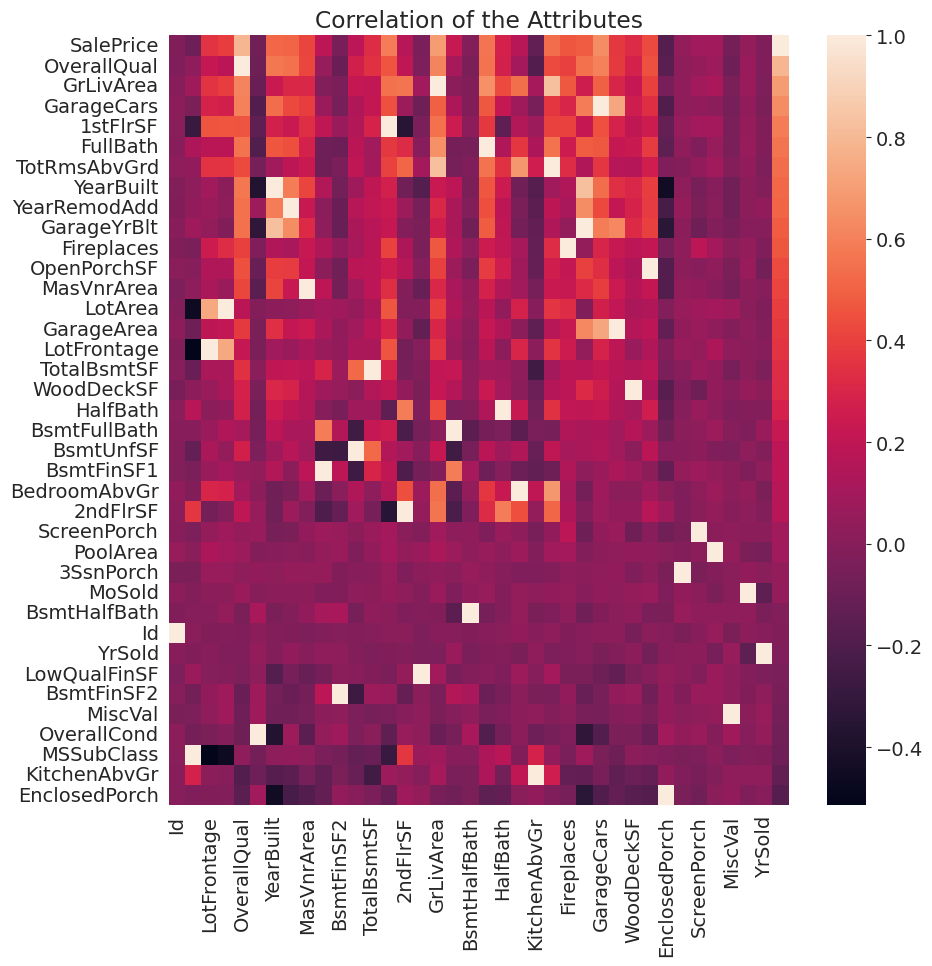

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(prices_df.corr().sort_values(by='SalePrice',ascending=False))
plt.title('Correlation of the Attributes');

<div class="alert alert-block alert-info" style='color:black;'>
   The column names on the left side of the heatmap are arranged in descending order based on their correlation with the SalePrice, which is displayed at the extreme right of the heatmap. This visualization highlights the factors that have the strongest influence on the SalePrice, as indicated by their high correlation values. It is evident from this heatmap that the overall condition of the house plays a more significant role in determining its sale price compared to other factors.
</div>

# 2. Preparing the Dataset for Training

Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the columns that show wide distribution of the ranges (Use previous distribution plots)
2. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
4. Deal with outliers by taking the logs of the widely spread attributes.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a (0,1) range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data.
6. Split the dataset into training and validation sets.


### Identify and Substitute the widely distributed columns
Here we will take all the numeric columns we have used for plotting above

In [37]:
import numpy as np
log_numeric_cols=Numeric_Attributes.copy()
prices_df[log_numeric_cols]=np.log(prices_df[log_numeric_cols]+1)

In [38]:
prices_df[log_numeric_cols].head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0     4.189655  9.042040   7.602900      7.602900    5.283204    6.561031   
1     4.394449  9.169623   7.589336      7.589336    0.000000    6.886532   
2     4.234107  9.328212   7.601902      7.602401    5.093750    6.188264   
3     4.110874  9.164401   7.557995      7.586296    0.000000    5.379897   
4     4.442651  9.565284   7.601402      7.601402    5.860786    6.486161   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0   5.017280     6.753438  6.753438  6.751101           0.0   
1         0.0   5.652489     7.141245  7.141245  0.000000           0.0   
2         0.0   6.075346     6.825460  6.825460  6.765039           0.0   
3         0.0   6.293419     6.629363  6.869014  6.629363           0.0   
4         0.0   6.196444     7.044033  7.044033  6.960348           0.0   

   GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0   7.444833     7.602900    6.308098    0.000000     4.127134       0.000000   
1   7.141245     7.589336    6.133398    5.700444     0.000000       0.000000   
2   7.488294     7.601902    6.411818    0.000000     3.761200       0.000000   
3   7.448916     7.600402    6.466145    0.000000     3.583519       5.609472   
4   7.695758     7.601402    6.729824    5.262690     4.442651       0.000000   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  
0        0.0          0.0       0.0      0.0  
1        0.0          0.0       0.0      0.0  
2        0.0          0.0       0.0      0.0  
3        0.0          0.0       0.0      0.0  
4        0.0          0.0       0.0      0.0

### Identify Inputs and Targets

While the dataset contains 81 columns, not all of them are useful for modeling. Note the following:

- The first column `Id` is a unique ID for each house and isn't useful for training the model.
- The last column `SalePrice` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.


In [39]:
# Identify the input columns (a list of column names)
input_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [40]:
# Identify the name of the target column (a single string, not a list)
target_col = 'SalePrice'

Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [41]:
inputs_df = prices_df[input_cols].copy()

In [42]:
targets = prices_df[target_col]

### Identify Numeric and Categorical Data

The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

In [43]:
#getting the list of numeric columns
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#getting the list of categorical columns
categorical_cols = inputs_df.select_dtypes('object').columns.tolist()

In [44]:
prices_df[numeric_cols].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.189655  9.042040            7            5   7.602900   
1          20     4.394449  9.169623            6            8   7.589336   
2          60     4.234107  9.328212            7            5   7.601902   
3          70     4.110874  9.164401            7            5   7.557995   
4          60     4.442651  9.565284            8            5   7.601402   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      7.602900    5.283204    6.561031         0.0   5.017280     6.753438   
1      7.589336    0.000000    6.886532         0.0   5.652489     7.141245   
2      7.602401    5.093750    6.188264         0.0   6.075346     6.825460   
3      7.586296    0.000000    5.379897         0.0   6.293419     6.629363   
4      7.601402    5.860786    6.486161         0.0   6.196444     7.044033   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.753438  6.751101           0.0   7.444833             1             0   
1  7.141245  0.000000           0.0   7.141245             0             1   
2  6.825460  6.765039           0.0   7.488294             1             0   
3  6.869014  6.629363           0.0   7.448916             1             0   
4  7.044033  6.960348           0.0   7.695758             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     7.602900           2    6.308098    0.000000     4.127134   
1     7.589336           2    6.133398    5.700444     0.000000   
2     7.601902           2    6.411818    0.000000     3.761200   
3     7.600402           3    6.466145    0.000000     3.583519   
4     7.601402           3    6.729824    5.262690     4.442651   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0       0.000000        0.0          0.0       0.0      0.0       2    2008  
1       0.000000        0.0          0.0       0.0      0.0       5    2007  
2       0.000000        0.0          0.0       0.0      0.0       9    2008  
3       5.609472        0.0          0.0       0.0      0.0       2    2006  
4       0.000000        0.0          0.0       0.0      0.0      12    2008

### Impute Numerical Data

Some of the numeric columns in our dataset contain missing values (`nan`).

In [45]:
#We will fill the missing values only from the numeric columns
#Categorical columns can be dealt with using encoder
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
# 1. Create the imputer
imputer = SimpleImputer(strategy = 'median')

In [48]:
# 2. Fit the imputer to the numeric colums
imputer.fit(prices_df[numeric_cols])

SimpleImputer(strategy='median')

In [49]:
# 3. Transform and replace the numeric columns
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

After imputation, none of the numeric columns should contain any missing values.

In [50]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Series([], dtype: int64)

### Scaling Numerical Data
A good practice is to scale numeric features to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

In [51]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
min        20.0     3.091042   7.170888          1.0          1.0   7.535297   
max       190.0     5.749393  12.279537         10.0          9.0   7.606387   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
min      7.576097    0.000000    0.000000    0.000000   0.000000     0.000000   
max      7.606387    7.378384    8.638525    7.296413   7.756623     8.717846   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
min  5.814131   0.00000      0.000000   5.814131           0.0           0.0   
max  8.453827   7.63337      6.350886   8.638171           3.0           2.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
min       0.0       0.0           0.0           0.0           2.0         0.0   
max       3.0       2.0           8.0           3.0          14.0         3.0   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
min     7.550135         0.0    0.000000    0.000000     0.000000   
max     7.606387         4.0    7.257708    6.754604     6.306275   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
min       0.000000   0.000000     0.000000  0.000000  0.00000     1.0  2006.0  
max       6.315358   6.232448     6.175867  6.605298  9.64866    12.0  2010.0

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler.fit(prices_df[numeric_cols])

MinMaxScaler()

In [53]:
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [54]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
min         0.0          0.0      0.0          0.0          0.0        0.0   
max         1.0          1.0      1.0          1.0          1.0        1.0   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
min           0.0         0.0         0.0         0.0        0.0          0.0   
max           1.0         1.0         1.0         1.0        1.0          1.0   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
min       0.0       0.0           0.0        0.0           0.0           0.0   
max       1.0       1.0           1.0        1.0           1.0           1.0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
min       0.0       0.0           0.0           0.0           0.0         0.0   
max       1.0       1.0           1.0           1.0           1.0         1.0   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
min          0.0         0.0         0.0         0.0          0.0   
max          1.0         1.0         1.0         1.0          1.0   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
min            0.0        0.0          0.0       0.0      0.0     0.0     0.0  
max            1.0        1.0          1.0       1.0      1.0     1.0     1.0

All ranges have been scaled to 0 to 1

### Encode Categorical Columns

Our dataset contains several categorical columns, each with a different number of categories.

In [55]:
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.
One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [56]:
from sklearn.preprocessing import OneHotEncoder

# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# 2. Fit the encoder to the categorical colums
encoder.fit(prices_df[categorical_cols])

# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(len(encoded_cols))

# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

268


The new one-hot category columns should now be added to `inputs_df`.

In [57]:
inputs_df.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0    0.235294       RL     0.413268  0.366271   Pave   NaN      Reg   
1    0.000000       RL     0.490307  0.391245   Pave   NaN      Reg   
2    0.235294       RL     0.429990  0.422289   Pave   NaN      IR1   
3    0.294118       RL     0.383633  0.390223   Pave   NaN      IR1   
4    0.235294       RL     0.508439  0.468694   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     0.666667        0.500   0.950951   
1       Norm     1Fam     1Story     0.555556        0.875   0.760143   
2       Norm     1Fam     2Story     0.666667        0.500   0.936906   
3       Norm     1Fam     2Story     0.666667        0.500   0.319286   
4       Norm     1Fam     2Story     0.777778        0.500   0.929878   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      0.884882     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      0.437057     Gable  CompShg     MetalSd     MetalSd       None   
2      0.868404     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      0.336710     Gable  CompShg     Wd Sdng     Wd Shng       None   
4      0.835423     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    0.716038        Gd        TA      PConc       Gd       TA           No   
1    0.000000        TA        TA     CBlock       Gd       TA           Gd   
2    0.690361        Gd        TA      PConc       Gd       TA           Mn   
3    0.000000        TA        TA     BrkTil       TA       Gd           No   
4    0.794318        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ    0.759508          Unf         0.0   0.646838     0.774668   
1          ALQ    0.797188          Unf         0.0   0.728731     0.819153   
2          GLQ    0.716357          Unf         0.0   0.783246     0.782930   
3          ALQ    0.622780          Unf         0.0   0.811361     0.760436   
4          GLQ    0.750841          Unf         0.0   0.798858     0.808002   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  0.355839  0.884420           0.0   
1    GasA        Ex          Y      SBrkr  0.502753  0.000000           0.0   
2    GasA        Ex          Y      SBrkr  0.383123  0.886245           0.0   
3    GasA        Gd          Y      SBrkr  0.399623  0.868471           0.0   
4    GasA        Ex          Y      SBrkr  0.465926  0.911832           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.577436      0.333333           0.0  0.666667       0.5         0.375   
1   0.469935      0.000000           0.5  0.666667       0.0         0.375   
2   0.592825      0.333333           0.0  0.666667       0.5         0.375   
3   0.578882      0.333333           0.0  0.333333       0.0         0.375   
4   0.666289      0.333333           0.0  0.666667       0.5         0.500   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0      0.333333          Gd      0.500000        Typ    0.000000         NaN   
1      0.333333          TA      0.333333        Typ    0.333333          TA   
2      0.333333          Gd      0.333333        Typ    0.333333          TA   
3      0.333333          Gd      0.416667        Typ    0

But we only need imputed and sclaed numeric columns along with encoded categorical columns

In [58]:
inputs_df[numeric_cols + encoded_cols].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.413268  0.366271     0.666667        0.500   0.950951   
1    0.000000     0.490307  0.391245     0.555556        0.875   0.760143   
2    0.235294     0.429990  0.422289     0.666667        0.500   0.936906   
3    0.294118     0.383633  0.390223     0.666667        0.500   0.319286   
4    0.235294     0.508439  0.468694     0.777778        0.500   0.929878   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.884882    0.716038    0.759508         0.0   0.646838     0.774668   
1      0.437057    0.000000    0.797188         0.0   0.728731     0.819153   
2      0.868404    0.690361    0.716357         0.0   0.783246     0.782930   
3      0.336710    0.000000    0.622780         0.0   0.811361     0.760436   
4      0.835423    0.794318    0.750841         0.0   0.798858     0.808002   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.355839  0.884420           0.0   0.577436      0.333333           0.0   
1  0.502753  0.000000           0.0   0.469935      0.000000           0.5   
2  0.383123  0.886245           0.0   0.592825      0.333333           0.0   
3  0.399623  0.868471           0.0   0.578882      0.333333           0.0   
4  0.465926  0.911832           0.0   0.666289      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.666667       0.5         0.375      0.333333      0.500000    0.000000   
1  0.666667       0.0         0.375      0.333333      0.333333    0.333333   
2  0.666667       0.5         0.375      0.333333      0.333333    0.333333   
3  0.333333       0.0         0.375      0.333333      0.416667    0.333333   
4  0.666667       0.5         0.500      0.333333      0.583333    0.333333   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.938012        0.50    0.869159    0.000000     0.654449   
1     0.696872        0.50    0.845088    0.843935     0.000000   
2     0.920262        0.50    0.883450    0.000000     0.596422   
3     0.893603        0.75    0.890935    0.000000     0.568247   
4     0.911380        0.75    0.927266    0.779126     0.704481   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0       0.000000        0.0          0.0       0.0      0.0  0.090909    0.50   
1       0.000000        0.0          0.0       0.0      0.0  0.363636    0.25   
2       0.000000        0.0          0.0       0.0      0.0  0.727273    0.50   
3       0.888227        0.0          0.0       0.0      0.0  0.090909    0.00   
4       0.000000        0.0          0.0       0.0      0.0  1.000000    0.50   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0.0          0.0          0.0          1.0          0.0   
1               0.0          0.0          0.0          1.0          0.0   
2               0.0          0.0          0.0          1.0          0.0   
3               0.0          0.0          0.0          1.0          0.0   
4               0.0          0.0          0.0          1.0          0.0   

   Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  Alley_nan  LotShape_IR1  \
0          0.0          1.0         0.0         0.0        1.0           0.0   
1          0.0          1.0         0.0         0.0        1.0           0.0   
2          0.0          1.0         0.0         0.0        1.0           1.0   
3          0.0          1.0         0.0         0.0        1.0           1.0   
4          0.0          1.0         0.0         0.0        1.0           1.0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0           0.0           0.0           1.0              0.0              0.0   
1           0.0           0.0           1.0              0.0              0.0   
2           0.0           0.0           0.0             

##### We will also take log of the target column to scale it down

In [59]:
log_targets = np.log(targets)

# 3. K-Fold Cross Validation
We will use K-Fold Cross Validation for choosing the best model for predictions and tune that model only.

In [60]:
#Importing Important Functions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
#Importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [62]:
#Creating the list of models for cross validation
models=[
    ('Rg',Ridge()),
    ('Ls',Lasso()),
    ('EN',ElasticNet()),
    ('SGD',SGDRegressor()),
    ('DT',DecisionTreeRegressor()),
    ('RF',RandomForestRegressor()),
    ('GB',GradientBoostingRegressor()),
    ('SVR',SVR()),
    ('XGB',XGBRegressor())
]

#Evaluae the created models
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=20)
    cv_results=cross_val_score(model, inputs_df[numeric_cols + encoded_cols], log_targets, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

Rg: 0.885042 (0.076886)
Ls: -0.016767 (0.018420)
EN: -0.016767 (0.018420)
SGD: 0.748316 (0.073792)
DT: 0.742266 (0.070906)
RF: 0.873649 (0.029865)
GB: 0.893896 (0.028268)
SVR: 0.877684 (0.030223)
XGB: 0.876408 (0.026771)


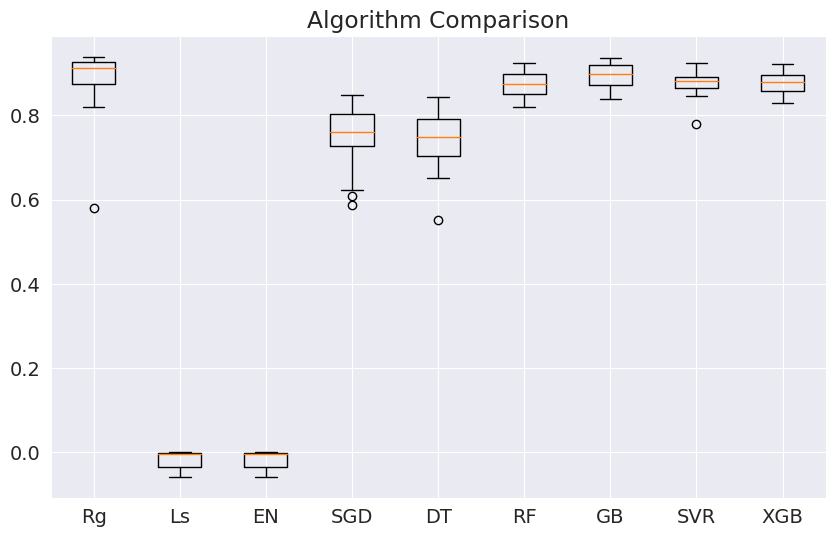

In [63]:
#Compare our models
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()

From the above plot one can conclude that the `GradientBoostingRegressor()` and `Ridge()` are the best performing models.

# 4. Training, Evaluating and Tuning
Now we will train and tune the best model we have found out here.

#### Training and Validation Set

Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols],
                                                                        log_targets,
                                                                        test_size=0.25,
                                                                        random_state=42)

##### We will train both the models simultaneously and compare their accuracies
Note: 1 refers to `Ridge()` and 2 refers to `GradientBoostingRegressor()`.

In [66]:
# Create the model
model1 = Ridge()
model2 = GradientBoostingRegressor()

In [67]:
# Fit the model using inputs and targets
model1.fit(train_inputs, train_targets)
model2.fit(train_inputs, train_targets)

GradientBoostingRegressor()

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function. This is the same function used over the logs of the values predicted while checking the accuracy of the submissions.

In [68]:
# Defininf the RMSE function
from sklearn.metrics import mean_squared_error
def rmse(preds, targets):
    return mean_squared_error(preds, targets, squared = False)

In [69]:
#Predictions over train data and checking the RMSE
train_preds1 = model1.predict(train_inputs)
train_preds2 = model2.predict(train_inputs)
train_rmse1 = rmse(train_targets, train_preds1)
train_rmse2 = rmse(train_targets, train_preds2)
print('The RMSE loss for the training set 1 is {}.'.format(train_rmse1))
print('The RMSE loss for the training set 2 is {}.'.format(train_rmse2))

The RMSE loss for the training set 1 is 0.094950027315946.
The RMSE loss for the training set 2 is 0.0764536390095983.


In [70]:
#Predictions over validation data and checking the RMSE
val_preds1 = model1.predict(val_inputs)
val_preds2 = model2.predict(val_inputs)
val_rmse1 = rmse(val_targets, val_preds1)
val_rmse2 = rmse(val_targets, val_preds2)
print('The RMSE loss for the validation set 1 is {}.'.format(val_rmse1))
print('The RMSE loss for the validation set 2 is {}.'.format(val_rmse2))

The RMSE loss for the validation set 1 is 0.12625978855804817.
The RMSE loss for the validation set 2 is 0.13200750367403172.


The `Ridge()` has higher training error but lower validation error than `GradientBoostingRegressor()` which indicates that the `Ridge()` is well generalized. But Gradient Boosting Algorithm had given better accuracy during the process of KFold Cross Validation so we won't rule it out yet, we will keep going with both models and see what the end results are.

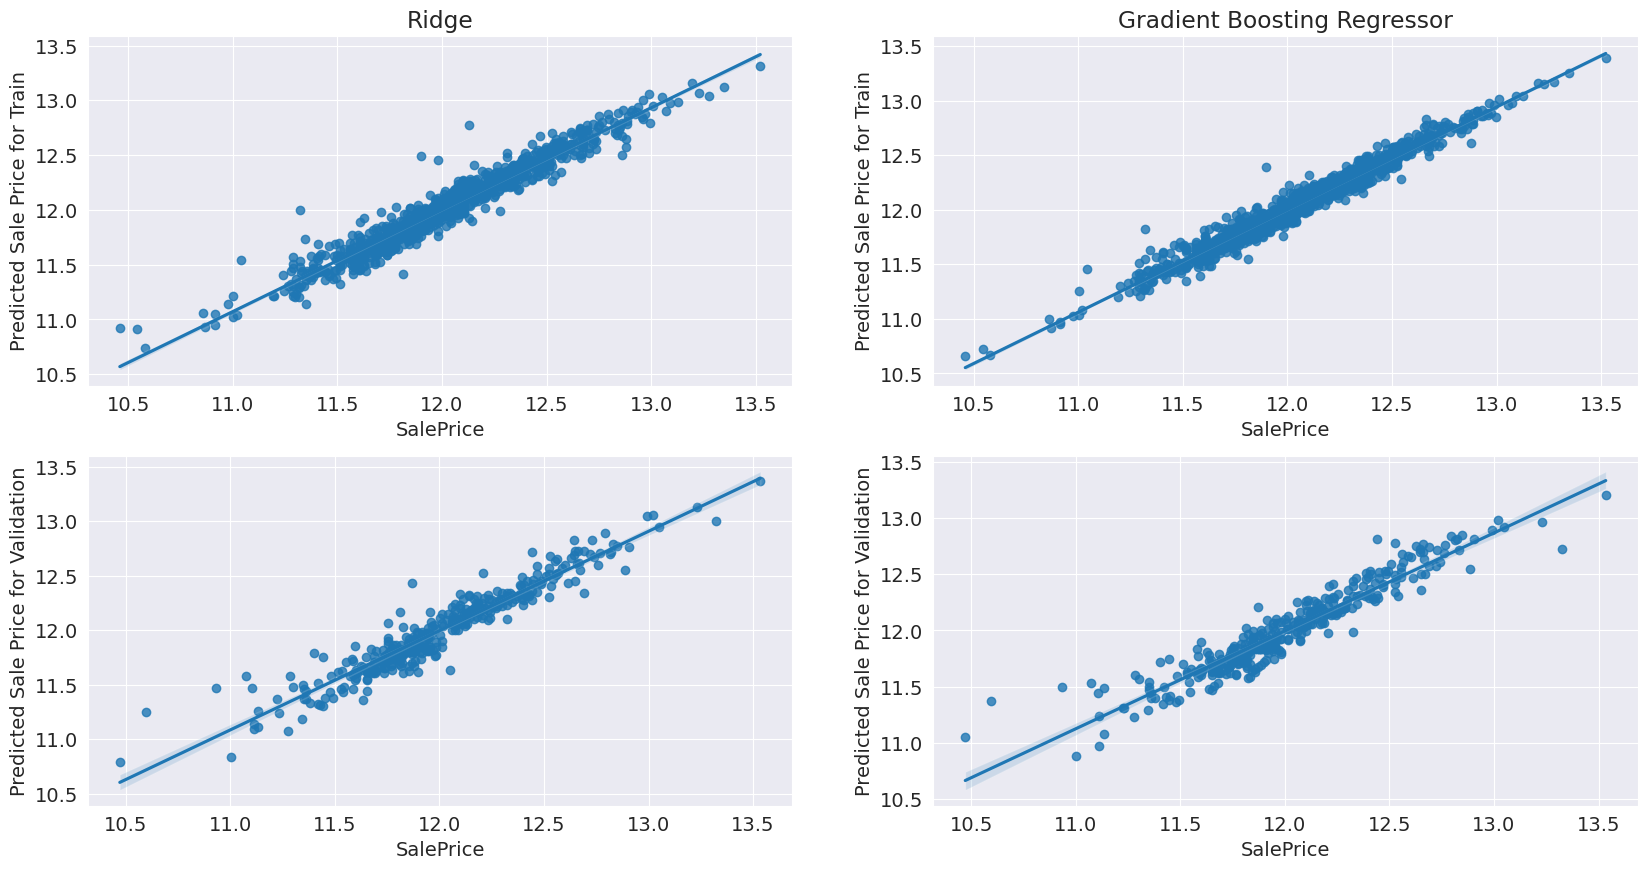

In [71]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))

axes[0,0].set_title('Ridge')
sns.regplot(x=train_targets, y=train_preds1, ax=axes[0,0])
axes[0,0].set_ylabel('Predicted Sale Price for Train')

axes[0,1].set_title('Gradient Boosting Regressor')
sns.regplot(x=train_targets, y=train_preds2, ax=axes[0,1])
axes[0,1].set_ylabel('Predicted Sale Price for Train')

sns.regplot(x=val_targets, y=val_preds1, ax=axes[1,0])
axes[1,0].set_ylabel('Predicted Sale Price for Validation')

sns.regplot(x=val_targets, y=val_preds2, ax=axes[1,1])
axes[1,1].set_ylabel('Predicted Sale Price for Validation');

The predictions given by `Ridge()` seem to be less deviated from the the actual values, but `GradientBoostingRegressor()` hasn't done a complete wrong job, there are few data points which causing a bit higher RMSE.

#### Hyperparamter Tuning
This process involves finding the proper values of the different parameters so that the model is well generlized i.e. makes predictions on the validation data with better accuracy, even if it comes at the cost of increment in RMSE of training data.

##### Ridge
We will manually choose different values of parameters and see which one gives the less RMSE for validation data. We will loop through list of parameter values and keep varying the list till we get the most accurate value (till 4rth decimal).

In [72]:
#parameter_values=[i/10 for i in range(1,11)] gives 0.2
#parameter_values=[i/100 for i in range(10,20)] gives 0.15
#parameter_values=[i/1000 for i in range(140,160)] gives 0.147
parameter_values=[i/10000 for i in range(1460,1480)]
train_errors=[]
val_errors=[]
for i in parameter_values:
    model = Ridge(alpha=i)
    model.fit(train_inputs, train_targets)
    train_error = rmse(model.predict(train_inputs), train_targets)
    val_error = rmse(model.predict(val_inputs), val_targets)
    train_errors.append(train_error)
    val_errors.append(val_error)
print('Minimum Error is ',min(val_errors),' is given by alpha =',parameter_values[val_errors.index(min(val_errors))])
#We will stop here with alpha=0.1471
#All the other default parameters are good to go with

Minimum Error is  0.12438908041804472  is given by alpha = 0.1471


In [73]:
#training with best parameters
model1 =  Ridge(alpha=0.1471, random_state=42)
model1.fit(train_inputs, train_targets)
tuned_train_preds1 = model1.predict(train_inputs)
tuned_val_preds1 = model1.predict(val_inputs)
rmse(tuned_train_preds1, train_targets), rmse(tuned_val_preds1, val_targets)

(0.08968721698008655, 0.12438908041804472)

##### GradientBoosting Regressor
We will use `Grid Search Cross Validation` for `GradientBoostingRegressor` which checks all the possible combinations of the parameters given in the form of lists and gives us the best combination of parameters to make predictions on our dataset.

In [74]:
model=GradientBoostingRegressor(random_state=42)
parameters = {
    'learning_rate':[0.01, 0.1, 0.2],
    'n_estimators':[200,240,260],
    'max_depth':[2,3,4],
    'max_features':[152,163,174]
}

#The lists of the parameters has been adjusted multiple times
#The bigger the list the longer it takes
#Initial parameters took me 16 hours, but thanks to kaggle it did all the work in background

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,parameters, cv=5)

In [75]:
#finding the best parameters
#seat back and relax cuz it's gonna take a while
cv.fit(inputs_df[numeric_cols + encoded_cols],log_targets.values.ravel())
cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 163,
 'n_estimators': 260}

In [76]:
#training with best parameters
model2 =  GradientBoostingRegressor(random_state=42,
                                   learning_rate=cv.best_params_['learning_rate'],
                                   max_depth=cv.best_params_['max_depth'],
                                   n_estimators=cv.best_params_['n_estimators'],
                                   max_features=cv.best_params_['max_features'])
model2.fit(train_inputs, train_targets)
tuned_train_preds2 = model2.predict(train_inputs)
tuned_val_preds2 = model2.predict(val_inputs)
rmse(tuned_train_preds2, train_targets), rmse(tuned_val_preds2, val_targets)

(0.052685177860555744, 0.12128362907771159)

##### Let's compare the accuracy of the tuned models with that of untuned model

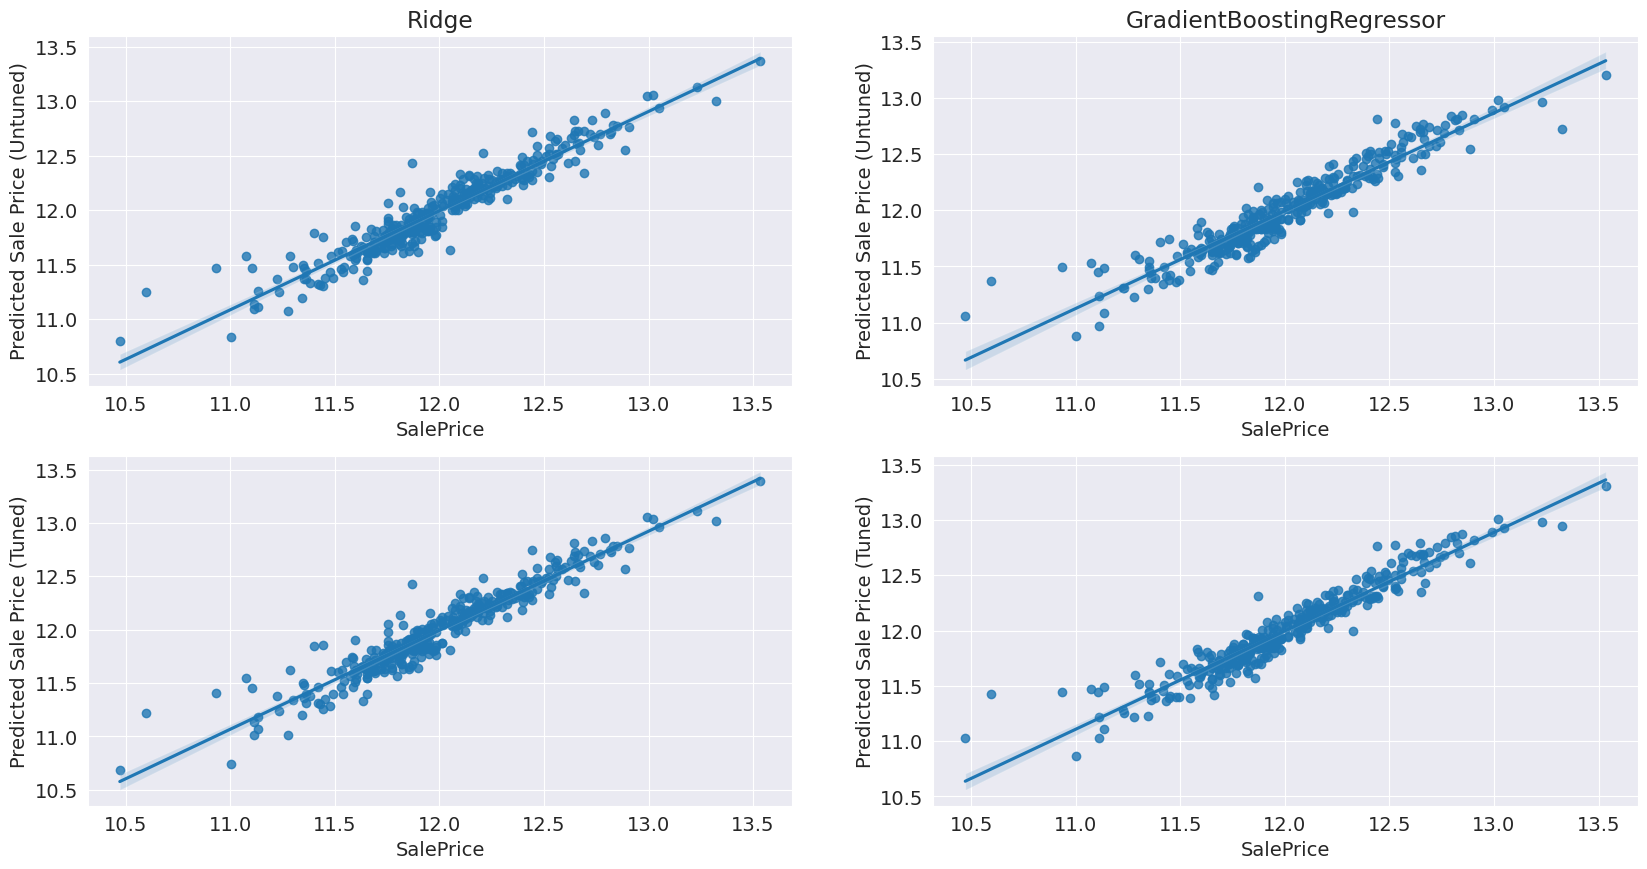

In [77]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))

axes[0,0].set_title('Ridge')
sns.regplot(x=val_targets, y=val_preds1, ax=axes[0,0])
axes[0,0].set_ylabel('Predicted Sale Price (Untuned)')

axes[0,1].set_title('GradientBoostingRegressor')
sns.regplot(x=val_targets, y=val_preds2, ax=axes[0,1])
axes[0,1].set_ylabel('Predicted Sale Price (Untuned)')

sns.regplot(x=val_targets, y=tuned_val_preds1, ax=axes[1,0])
axes[1,0].set_ylabel('Predicted Sale Price (Tuned)')

sns.regplot(x=val_targets, y=tuned_val_preds2, ax=axes[1,1])
axes[1,1].set_ylabel('Predicted Sale Price (Tuned)');

The scenario seem to be improved here and we also got lesser RMSE for `GradientBoostingRegressor` than that of `Ridge()`. So rather than choosing one of these two models we will use both them for making the final predictions.

# 5. Weighted Average Ensemble
It's a machine learning approach that combines the predictions from multiple models, where the contribution of each model is weighted proportionally to its capability.

For assigning proper weight we will create a list of suitable weights and then loop through them again and again till we get the least RMSE possible with the combination of both models. (Just like we did while tuning the hyper-parameter for `Ridge()`.

In [78]:
errors=[]
#weights=[i/10 for i in range(1,11)] Model1 weight:0.5, Model2 weight:0.5, RMSE:0.11474363067344863
#weights=[i/100 for i in range(40,61)] Model1 weight:0.45, Model2 weight:0.55, RMSE:0.11466126351179683
weights=[i/1000 for i in range(440,460)] # The Same "Model1 weight:0.45, Model2 weight:0.55, RMSE:0.11466126351179683" As Before
for i in weights:
    val_preds = i*tuned_val_preds1 + (1-i)*tuned_val_preds2
    errors.append(rmse(val_preds, val_targets))
j=weights[errors.index(min(errors))]
val_preds = j*tuned_val_preds1 + (1-j)*tuned_val_preds2
print('Model1 weight:{}, Model2 weight:{}, RMSE:{}'.format(j,1-j,rmse(val_preds, val_targets)))

Model1 weight:0.45, Model2 weight:0.55, RMSE:0.11466126351179681


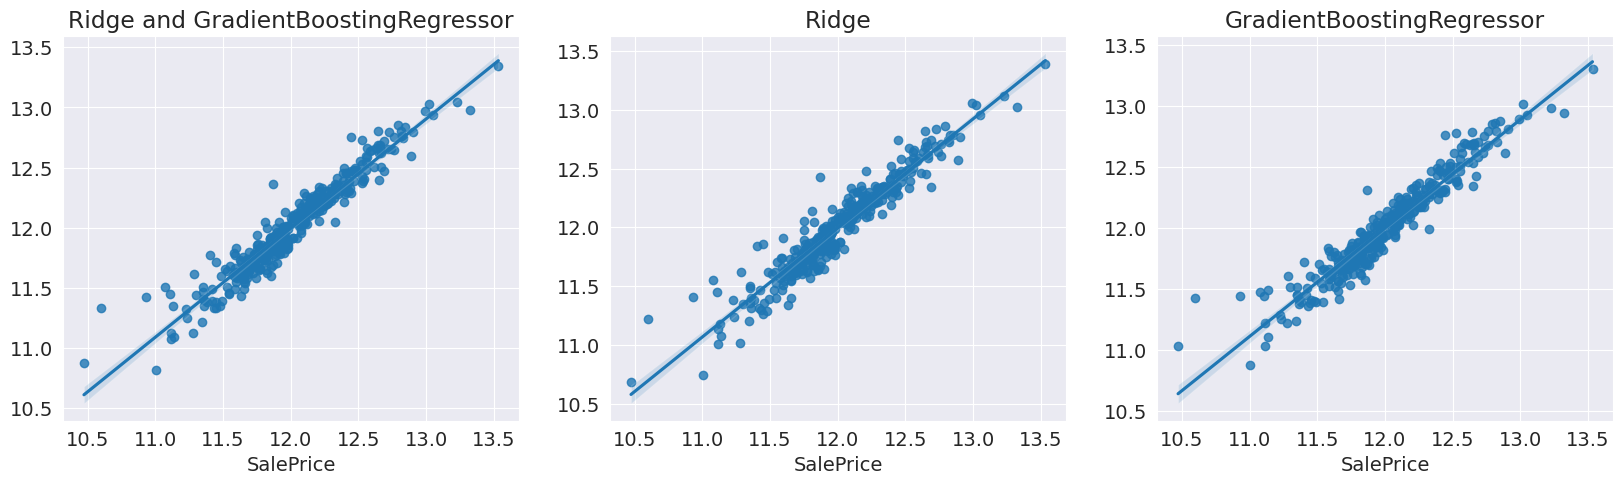

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

val_preds = 0.45 * tuned_val_preds1 + 0.55 * tuned_val_preds2
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title('Ridge and GradientBoostingRegressor')
axes[1].set_title('Ridge')
axes[2].set_title('GradientBoostingRegressor')

sns.regplot(x=val_targets, y=val_preds, ax=axes[0])
sns.regplot(x=val_targets, y=tuned_val_preds1, ax=axes[1])
sns.regplot(x=val_targets, y=tuned_val_preds2, ax=axes[2])

plt.show()


The data points are much closer to the regression line than they used to be for individually tuned models.

#### Feature Importance

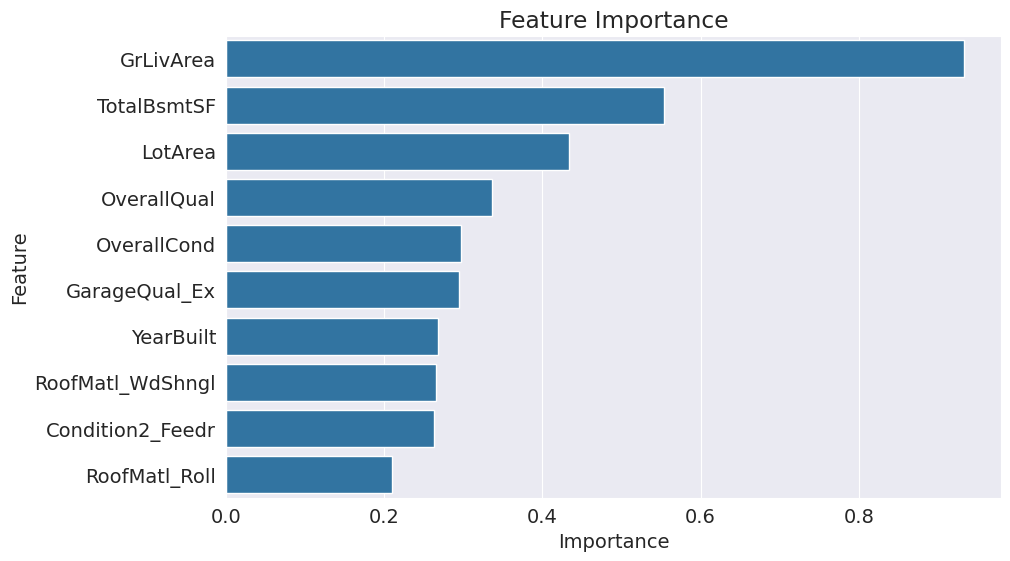

In [82]:
#Feature Importance Given by Ridge()
#We are using weights assigned to each attribute/feature by Ridge() as the importance given to the feature
weights=model1.coef_
weights_df = pd.DataFrame({
    'Feature': train_inputs.columns,
    'Importance': weights
}).sort_values('Importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=weights_df.head(10), x='Importance', y='Feature');

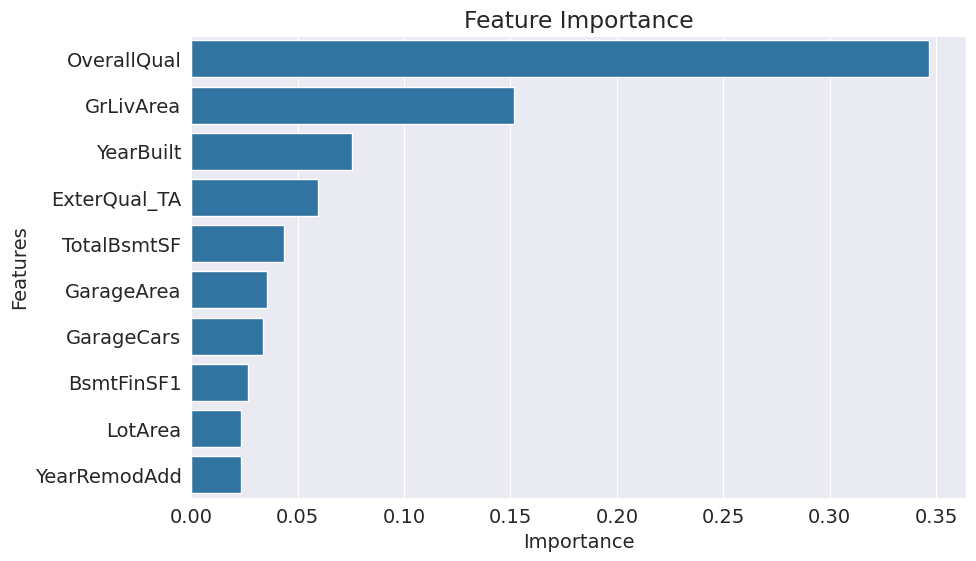

In [83]:
#Feature Importance given by GradientBoostingRegressor()
#GradientBoostingRegressor() directly gives the feature importance
model2.feature_importances_
importance_df = pd.DataFrame({
    'Features': train_inputs.columns,
    'Importance': model2.feature_importances_
}).sort_values('Importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='Importance', y='Features');

You can clearly see that the feature importance assigned by `Ridge()` and `GradientBoostingRegressor()` is totally different than each other. In addition to that there are only 5 common features in the top 10. But the `Ridge()`'s plot is less skewed.

# 6. Making Predictions on Test Data

The combined models can be used to make predictions on new inputs using the following helper function:

In [84]:
#fitting the model on the entire data
model1.fit(inputs_df[numeric_cols + encoded_cols], log_targets)
model2.fit(inputs_df[numeric_cols + encoded_cols], log_targets)

GradientBoostingRegressor(max_features=163, n_estimators=260, random_state=42)

In [85]:
#this function does all the needful and makes the predictions on the inputs
def predict_input(input_df):
    input_df[log_numeric_cols]=np.log(input_df[log_numeric_cols]+1)
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    prediction = 0.45*model1.predict(X_input) + 0.55*model2.predict(X_input)
    return np.exp(prediction)

In [87]:
#loading the test data
test=pd.read_csv('/content/test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [88]:
#loading the sample data
sample=pd.read_csv('/content/sample_submission.csv')

#making predictions on the test data and saving it for the submission
sample['SalePrice']=predict_input(test)
sample.head()

Id      SalePrice
0  1461  119964.067819
1  1462  155382.476554
2  1463  187679.582602
3  1464  196600.775264
4  1465  187814.342662

In [89]:
sample.to_csv('submission.csv',index=False)

# 7. Saving the model and objects

Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [90]:
import joblib
house_price_predictor = {
    'model1': model1,
    'model2':model2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
    'log_numeric_cols':log_numeric_cols
}
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']

# 8. Summary and References

<div class="alert alert-block alert-info" style='color:black;'>
    <h4>
        Summary📌
    </h4>
    <b>
        I did this project for Machine Learning Internship of Progody Infotech where,
    </b>
    <br>
    1. Performed exploratory data analysis to make sense of the data and to observe its distribution and generate few insights.<br>
    2. Prepared the data for feeding it to the machine (program). The preparation included normalizing the data, filling the missing
    values, scaling the features and encoding the labels i.e. categorical attributes.<br>
    3. Trained, evaluated and tuned two models namely Ridge() and GradientBoostingRegressor().<br>
    4. Made predictions on the test data using Weighted Average Ensemble.<br>
    5. Submitted the project.
</div>

**About**\
This project is created by Irfan Ullah Khan. It is intended for educational and personal use.